In [389]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn import datasets
import torchvision
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import math
import torch.nn.functional as F
import torchvision.transforms as transforms
import itertools
import random
from torch.nn.utils.rnn import pad_sequence
import wandb
import pandas as pd
import gc
from opacus import PrivacyEngine
from opacus.layers import DPLSTM
import time
from sklearn import metrics
import xgboost
from scipy import stats
from pathlib import Path
import datetime
import pymannkendall as mk
import matplotlib
from clean_data import load_all_houses_with_device

ModuleNotFoundError: No module named 'clean_data'

In [34]:
house1_kettle = r"C:\Users\aar245.CORNELL\Desktop\Fall2021_new\ukdale\house_1\channel_10.dat"

In [35]:
house1_fridge = r"C:\Users\aar245.CORNELL\Desktop\Fall2021_new\ukdale\house_1\channel_12.dat"

In [36]:
house1_wash = r"C:\Users\aar245.CORNELL\Desktop\Fall2021_new\ukdale\house_1\channel_5.dat"

In [37]:
house1_micro = r"C:\Users\aar245.CORNELL\Desktop\Fall2021_new\ukdale\house_1\channel_13.dat"

In [38]:
house1_dish = r"C:\Users\aar245.CORNELL\Desktop\Fall2021_new\ukdale\house_1\channel_6.dat"

In [39]:
house2_kettle = r"C:\Users\aar245.CORNELL\Desktop\Fall2021_new\ukdale\house_2\channel_8.dat"

In [40]:
house2_fridge = r"C:\Users\aar245.CORNELL\Desktop\Fall2021_new\ukdale\house_2\channel_14.dat"

In [41]:
house2_wash = r"C:\Users\aar245.CORNELL\Desktop\Fall2021_new\ukdale\house_2\channel_12.dat"

In [42]:
house2_micro = r"C:\Users\aar245.CORNELL\Desktop\Fall2021_new\ukdale\house_2\channel_15.dat"

In [43]:
house2_dish = r"C:\Users\aar245.CORNELL\Desktop\Fall2021_new\ukdale\house_2\channel_13.dat"

In [44]:
house3_kettle = r"C:\Users\aar245.CORNELL\Desktop\Fall2021_new\ukdale\house_3\channel_2.dat"

In [45]:
house5_kettle = r"C:\Users\aar245.CORNELL\Desktop\Fall2021_new\ukdale\house_5\channel_18.dat"

In [46]:
house5_fridge = r"C:\Users\aar245.CORNELL\Desktop\Fall2021_new\ukdale\house_5\channel_19.dat"

In [47]:
house5_wash = r"C:\Users\aar245.CORNELL\Desktop\Fall2021_new\ukdale\house_5\channel_24.dat"

In [48]:
house5_micro = r"C:\Users\aar245.CORNELL\Desktop\Fall2021_new\ukdale\house_5\channel_23.dat"

In [49]:
house5_dish = r"C:\Users\aar245.CORNELL\Desktop\Fall2021_new\ukdale\house_5\channel_22.dat"

In [50]:
house1_kettle = np.loadtxt(house1_kettle)

In [59]:
house1_fridge = np.loadtxt(house1_fridge)

In [60]:
house1_wash = np.loadtxt(house1_wash)

In [61]:
house1_micro = np.loadtxt(house1_micro)

In [62]:
house1_dish = np.loadtxt(house1_dish)

In [63]:
house2_kettle = np.loadtxt(house2_kettle)

In [64]:
house2_fridge = np.loadtxt(house2_fridge)

In [65]:
house2_wash = np.loadtxt(house2_wash)

In [66]:
house2_micro = np.loadtxt(house2_micro)

In [67]:
house2_dish = np.loadtxt(house2_dish)

In [68]:
house3_kettle = np.loadtxt(house3_kettle)

In [69]:
house5_kettle = np.loadtxt(house5_kettle)

In [70]:
house5_fridge = np.loadtxt(house5_fridge)

In [71]:
house5_wash = np.loadtxt(house5_wash)

In [72]:
house5_micro = np.loadtxt(house5_micro)

In [73]:
house5_dish = np.loadtxt(house5_dish)

In [52]:
house1_kettle = pd.DataFrame(house1_kettle)

In [74]:
house1_fridge = pd.DataFrame(house1_fridge)

In [75]:
house1_wash = pd.DataFrame(house1_wash)

In [76]:
house1_micro = pd.DataFrame(house1_micro)

In [77]:
house1_dish = pd.DataFrame(house1_dish)

In [78]:
house2_kettle = pd.DataFrame(house2_kettle)

In [79]:
house2_fridge = pd.DataFrame(house2_fridge)

In [80]:
house2_wash = pd.DataFrame(house2_wash)

In [81]:
house2_micro = pd.DataFrame(house2_micro)

In [82]:
house2_dish = pd.DataFrame(house2_dish)

In [83]:
house3_kettle = pd.DataFrame(house3_kettle)

In [84]:
house5_kettle = pd.DataFrame(house5_kettle)

In [85]:
house5_fridge = pd.DataFrame(house5_fridge)

In [86]:
house5_wash = pd.DataFrame(house5_wash)

In [87]:
house5_micro = pd.DataFrame(house5_micro)

In [88]:
house5_dish = pd.DataFrame(house5_dish)

In [58]:
house1_kettle = house1_kettle[1]

In [89]:
house1_fridge = house1_fridge[1]

In [90]:
house1_wash = house1_wash[1]

In [91]:
house1_micro = house1_micro[1]

In [92]:
house1_dish = house1_dish[1]

In [93]:
house2_kettle = house2_kettle[1]

In [94]:
house2_fridge = house2_fridge[1]

In [95]:
house2_wash = house2_wash[1]

In [96]:
house2_micro = house2_micro[1]

In [97]:
house2_dish = house2_dish[1]

In [98]:
house3_kettle = house3_kettle[1]

In [99]:
house5_kettle = house5_kettle[1]

In [100]:
house5_fridge = house5_fridge[1]

In [101]:
house5_wash = house5_wash[1]

In [102]:
house5_micro = house5_micro[1]

In [103]:
house5_dish = house5_dish[1]

In [26]:
for i in range(len(data[0])):
    data[0][i] = datetime.datetime.fromtimestamp(data[0][i]).strftime('%Y-%m-%d %H:%M:%S')

In [711]:
appliance_dict = {"air1":"compressor",
                  "air2": "compressor",
                  "air3": "compressor",
                  "airwindowunit1":"air conditioner",
                  "aquarium1":"water pump",
                  "bathroom1":"sockets",
                  "bathroom2":"sockets",
                  "bedroom1":"sockets",
                  "bedroom2":"sockets",
                  "bedroom3":"sockets",
                  "bedroom4":"sockets",
                  "bedroom5":"sockets",
                  "battery1":"unknown",
                  "car1":"electric vehicle",
                  "car2":"electric vehicle",
                  "circpump1":"water pump",
                  "clotheswasher1":"washing machine",
                  "clotheswasher_dryg1":"washer dryer",
                  "diningroom1":"sockets",
                  "diningroom2":"sockets",
                  "dishwasher1":"dish washer",
                  "disposal1":"waste disposal unit",
                  "drye1":"tumble dryer",
                  "dryg1":"tumble dryer",
                  "freezer1":"freezer",
                  "furnace1":"electric furnace",
                  "furnace2":"electric furnace",
                  "garage1":"sockets",
                  "garage2":"sockets",
                  "heater1":"heating appliance",
                  "heater2":"heating appliance",
                  "heater3":"heating appliance",
                  "housefan1":"fan",
                  "icemaker1":"cold appliance",
                  "jacuzzi1":"jacuzzi pump",
                  "kitchen1":"sockets",
                  "kitchen2":"sockets",
                  "kitchenapp1":"sockets",
                  "kitchenapp2":"sockets",
                  "lights_plugs1":"light",
                  "lights_plugs2":"light",
                  "lights_plugs3":"light",
                  "lights_plugs4":"light",
                  "lights_plugs5":"light",
                  "lights_plugs6":"light",
                  "livingroom1":"sockets",
                  "livingroom2":"sockets",
                  "microwave1":"microwave",
                  "office1":"sockets",
                  "outsidelights_plugs1":"lighting component",
                  "outsidelights_plugs2":"lighting component",
                  "oven1":"oven",
                  "oven2":"oven",
                  "pool1":"electric swimming pool heater",
                  "pool2":"electric swimming pool heater",
                  "poollight1":"lighting component",
                  "poolpump1":"swimming pool pump",
                  "pump1":"water pump",
                  "range1":"stove",
                  "refrigerator1":"fridge",
                  "refrigerator2":"fridge",
                  "security1":"security alarm",
                  "sewerpump1":"water pump",
                  "shed1":"sockets",
                  "sprinkler1":"garden sprinkler",
                  "sumppump1":"water pump",
                  "utilityroom1":"subpanel",
                  "venthood1":"fan",
                  "waterheater1":"electric water heater",
                  "waterheater2":"electric water heater",
                  "wellpump1":"water pump",
                  "winecooler1":"cold appliance"
                 }

In [167]:
kettle = [house1_kettle, house2_kettle, house3_kettle, house5_kettle]

In [168]:
kettle_names = [1,2,3,5]

In [169]:
fridge = [house1_fridge, house2_fridge, house5_fridge]

In [170]:
fridge_names = [1,2,5]

In [171]:
wash = [house1_wash, house2_wash, house5_wash]

In [172]:
wash_names = [1,2,5]

In [173]:
micro = [house1_micro, house2_micro, house5_micro]

In [174]:
micro_names = [1,2,5]

In [175]:
dish = [house1_dish, house2_dish, house5_dish]

In [176]:
dish_names = [1,2,5]

In [177]:
appliances = [kettle, fridge, wash, micro, dish]

In [164]:
appliance_names = ['kettle', 'fridge', 'washing_machine', 'microwave', 'dish_washer']

In [185]:
ks_results = []
for j in range(len(appliances[4])):
    for k in range(len(appliances[4])):
        ks_stat = stats.ks_2samp(appliances[4][j], appliances[4][k])
        if ks_stat.pvalue < 1:
            ks_results.append([appliance_names[4], dish_names[j], dish_names[k], ks_stat.statistic, ks_stat.pvalue, len(dish_names)])
                
results = pd.DataFrame(ks_results,
        columns=["Appliance", 'House1', "House2", "KS_Statistic", "KS_Pvalue", "Num_homes"])
    
results.to_csv(Path(r"C:\Users\aar245.CORNELL\Desktop\Fall2021_new\ks_test_UKDALE_dishwasher_log_min_max_norm.csv"), index = False, header = True)

In [179]:
for i in range(len(appliances)):
    for j in range(len(appliances[i])):
        appliances[i][j] = np.log(appliances[i][j] + 1)
        appliances[i][j] = (appliances[i][j] - np.min(appliances[i][j]))/(np.max(appliances[i][j]) - np.min(appliances[i][j]))

In [186]:
UKDALE_no_norm = r"C:\Users\aar245.CORNELL\Desktop\Fall2021_new\ks_test_UKDALE_all_devices_no_norm.csv"

In [187]:
UKDALE_min_max = r"C:\Users\aar245.CORNELL\Desktop\Fall2021_new\ks_test_UKDALE_all_devices_min_max_norm.csv"

In [188]:
UKDALE_log_min_max = r"C:\Users\aar245.CORNELL\Desktop\Fall2021_new\ks_test_UKDALE_all_devices_log_min_max_norm.csv"

In [314]:
Pecan_no_norm = r"C:\Users\aar245.CORNELL\Desktop\Fall2021_new\ks_test_no_norm_NEW.csv"

In [315]:
Pecan_min_max = r"C:\Users\aar245.CORNELL\Desktop\Fall2021_new\ks_test_min_max_norm_NEW.csv"

In [316]:
Pecan_log_min_max = r"C:\Users\aar245.CORNELL\Desktop\Fall2021_new\ks_test_log_min_max_norm_NEW.csv"

In [192]:
UKDALE_no_norm = pd.read_csv(UKDALE_no_norm)

In [193]:
UKDALE_min_max = pd.read_csv(UKDALE_min_max)

In [194]:
UKDALE_log_min_max = pd.read_csv(UKDALE_log_min_max)

In [317]:
Pecan_no_norm = pd.read_csv(Pecan_no_norm)

In [318]:
Pecan_min_max = pd.read_csv(Pecan_min_max)

In [319]:
Pecan_log_min_max = pd.read_csv(Pecan_log_min_max)

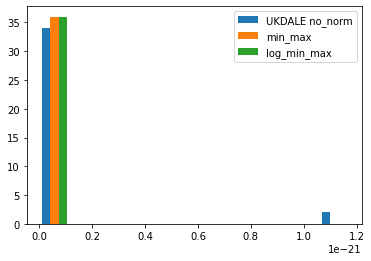

In [244]:
plt.hist(
    [
        UKDALE_no_norm['KS_Pvalue'],
        UKDALE_min_max['KS_Pvalue'],
        UKDALE_log_min_max['KS_Pvalue']
    ],
    label = [
        'UKDALE no_norm',
        'min_max',
        'log_min_max'
    ]
)
plt.legend(loc='upper right')

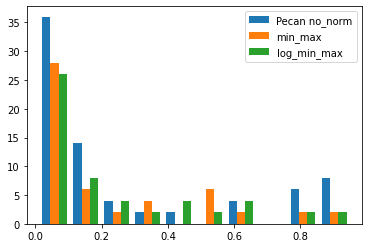

In [320]:
plt.hist(
    [
        Pecan_no_norm.loc[Pecan_no_norm['KS_Pvalue'] > 0.01]['KS_Pvalue'],
        Pecan_min_max.loc[Pecan_min_max['KS_Pvalue'] > 0.01]['KS_Pvalue'],
        Pecan_log_min_max.loc[Pecan_log_min_max['KS_Pvalue'] > 0.01]['KS_Pvalue']
    ],
    label = [
        'Pecan no_norm',
        'min_max',
        'log_min_max'
    ]
)
plt.legend(loc='upper right')

In [358]:
Pecan_log_min_max.Appliance.unique()

array(['air1', 'clotheswasher1', 'clotheswasher_dryg1', 'dishwasher1',
       'drye1', 'freezer1', 'heater1', 'oven1', 'range1', 'refrigerator1',
       'waterheater1', 'wellpump1'], dtype=object)

In [384]:
for i in Pecan_log_min_max.loc[Pecan_log_min_max['Appliance'] == 'drye1'].values:
    print(i)

['drye1' 690 1222 0.0508284374244569 1.848855136170576e-108 46]
['drye1' 690 1240 0.0295308620924512 6.988151484728629e-37 46]
['drye1' 690 1417 0.0163364176480067 1.3920358934878669e-11 46]
['drye1' 690 2318 0.0189404284321964 2.012692820432591e-15 46]
['drye1' 690 2448 0.0287156447011468 6.753535402724337e-35 46]
['drye1' 690 3996 0.0237035973838602 6.49989242179632e-24 46]
['drye1' 690 5982 0.0657173723586314 4.3739550807828773e-181 46]
['drye1' 690 5997 0.0245865636978969 1.0726555866985035e-25 46]
['drye1' 690 6069 0.0132116168939132 3.549807612534604e-07 46]
['drye1' 690 6594 0.0743053756911589 1.900329550077385e-231 46]
['drye1' 690 6672 0.0224385571230139 1.7906613362624544e-21 46]
['drye1' 690 6703 0.0344372930360342 5.271594070751593e-50 46]
['drye1' 690 7159 0.0339315263436589 1.4715335642582733e-48 46]
['drye1' 690 8327 0.0358014505703859 5.1937312691479387e-54 46]
['drye1' 690 9002 0.0403405692516478 2.634101935459373e-62 46]
['drye1' 690 984 0.0880081652572521 1.164047460

In [276]:
np.unique(Pecan_log_min_max['Appliance'])

array(['air1', 'clotheswasher1', 'clotheswasher_dryg1', 'dishwasher1',
       'drye1', 'dryg1', 'freezer1', 'furnace1', 'heater1', 'heater2',
       'housefan1', 'kitchenapp2', 'lights_plugs1', 'oven1', 'pump1',
       'range1', 'refrigerator1', 'sumppump1', 'waterheater1',
       'waterheater2', 'wellpump1'], dtype=object)

In [332]:
path = r"C:\Users\aar245.CORNELL\Desktop\Fall2021_new\ithaca_Real_2019\1min_real_may_june_july2019.csv"

In [333]:
df = pd.read_csv(path)

In [344]:
new_list = list(df['dataid'].unique())

In [346]:
new_list.sort()

In [348]:
len(new_list)

96

In [363]:
Pecan_log_min_max.loc[Pecan_log_min_max['KS_Pvalue']]

,Appliance,House1,House2,KS_Statistic,KS_Pvalue,Num_homes
0,air1,792,1417,0.017405,4.365399e-14,29
1,air1,792,3488,0.017581,2.299686e-14,29
2,air1,792,3517,0.060712,9.854306e-167,29
3,air1,792,4414,0.041327,1.869916e-77,29
4,air1,792,9004,0.078969,6.039386e-282,29
...,...,...,...,...,...,...
1333,wellpump1,10182,6868,0.015079,4.369049e-05,35
1334,wellpump1,10182,8849,0.021766,2.728157e-09,35
1335,wellpump1,10182,183,0.012377,5.855538e-03,35
1336,wellpump1,10182,2602,0.037313,9.557469e-23,35


In [364]:
df = pd.read_csv(Path(r"C:\Users\aar245.CORNELL\Desktop\Fall2021_new\drye1_all_homes_results_one_by_one.csv"))

In [372]:
df

,MSE,R2,F1,NEP,NDE,MAE
0,0.137165,-2.359990,0.397671,0.889514,0.443137,27.533397
1,0.092314,-0.357851,0.530761,0.553571,0.255208,20.023730
2,0.121372,0.126348,0.603153,0.745747,0.360058,25.138490
3,0.186165,-5.661634,0.405872,0.949809,0.532375,33.213717
4,0.143581,-0.740623,0.497347,0.756466,0.407494,26.654280
5,0.114142,-2.317240,0.614481,0.569343,0.310371,20.938232
6,0.150732,-0.510922,0.710581,0.639233,0.354437,27.184799
7,0.190253,-2.090762,0.588305,0.794299,0.474019,31.880099
8,0.180366,-2.034114,0.512823,0.694259,0.413931,30.251569
9,0.180032,-0.022327,0.648651,0.800574,0.482124,29.894606


In [383]:
mk.original_test(df.R2.values)

Mann_Kendall_Test(trend='increasing', h=True, p=0.009004601885469699, z=2.6118793761577286, Tau=0.27070707070707073, s=268.0, var_s=10450.0, slope=0.02025958816617309, intercept=-0.6915870271736281)

In [291]:
test_inputs = []
predictions = []
true_vals = []

In [292]:
model_4.cpu()

LSTM(
  (conv1): Conv1d(1, 16, kernel_size=(7,), stride=(1,), padding=(3,))
  (lstm1): LSTM(16, 32, num_layers=2, batch_first=True, bidirectional=True)
  (lstm2): LSTM(64, 100, num_layers=2, batch_first=True, bidirectional=True)
  (linear1): Linear(in_features=200, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [295]:
total_r2_count = 0.0
for i, (inputs, outputs) in enumerate(test_loader):
    inputs, outputs = inputs.cpu(), outputs.cpu()
    prediction = model_4(inputs)
    
    predictions.append(prediction.detach().numpy())
    true_vals.append(outputs.detach().numpy())
    test_inputs.append(inputs)

In [296]:
len(predictions)

29

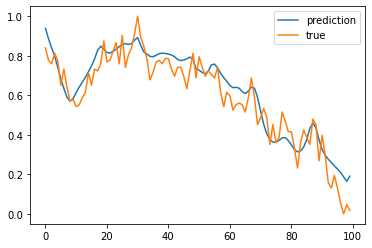

In [307]:
plt.plot(predictions[2][1])
plt.plot(true_vals[2][1])
plt.legend(['prediction', 'true'])
#plt.plot(test_inputs[0][3])

In [308]:
flat_list = [i for subitems in predictions for i in subitems]

In [309]:
flat_list = [i for subitems in flat_list for i in subitems]

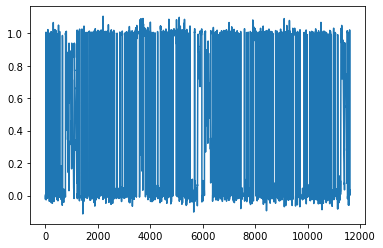

In [310]:
plt.plot(flat_list)

In [311]:
flat_list_2 = [i for subitems in true_vals for i in subitems]

In [312]:
flat_list_2 = [i for subitems in flat_list_2 for i in subitems]

Text(0.5, 1.0, 'Train:792,950,1417, Test:5192, window=15')

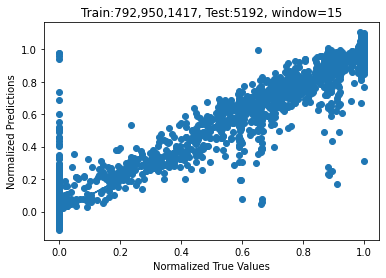

In [313]:
plt.scatter(flat_list_2, flat_list)
plt.plot(flat_list_2, flat_list_2)
plt.xlabel("Normalized True Values")
plt.ylabel("Normalized Predictions")
plt.title("Train:792,950,1417, Test:5192, window=15")

In [314]:
flat_list_3 = [i for subitems in test_inputs for i in subitems]

In [315]:
flat_list_3 = [i for subitems in flat_list_3 for i in subitems]

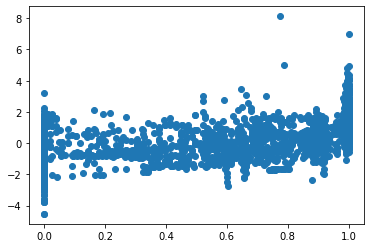

In [316]:
plt.scatter(flat_list_2, flat_list_3)

In [293]:
test_dataset = PecanStreetDataset_test(r"C:\Users\aar245.CORNELL\Desktop\Fall2021_new\ithaca_Real_2019\1min_real_may_june_july2019.csv", 'air1', 100, [1417])

In [294]:
test_loader = DataLoader(dataset=test_dataset, batch_size=config['batch_size'], shuffle = False, num_workers=0)

In [ ]:
test_dataset.x[0][10]

In [ ]:
predictions

In [ ]:
{'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706]_trial_0': [0.03193608671426773, 0.2595536567188434, 0.4086054764360455, 1.0044293087475198, 0.279898168656318, 19.36813235282898], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706]_trial_1': [0.06583097577095032, 0.48848635539129603, 0.569299225699302, 0.7753662752267126, 0.2839906884240258, 30.375244617462158], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706]_trial_2': [0.04302159324288368, 0.14938560640906393, 0.43691916751559123, 1.099462150353449, 0.33129890278102836, 24.128673553466797], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706]_trial_3': [0.04514206200838089, 0.6241489999656173, 0.6062675937591424, 0.6507345717901272, 0.19794773778810898, 25.079646110534668], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706]_trial_4': [0.0425332672894001, 0.6101822366127657, 0.5779160999574394, 0.7283962516891831, 0.2205177259742932, 23.743220806121826], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706]_trial_5': [0.03382345288991928, 0.2590561300199904, 0.38214580604231063, 1.2227456260405245, 0.3246608783811767, 21.528354167938232], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706]_trial_6': [0.0770326629281044, 0.45103783211522785, 0.6579835302484431, 0.626881928022327, 0.2433251615981517, 33.53979253768921], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706]_trial_7': [0.0831630751490593, 0.007606506277532232, 0.5329210647447901, 0.7292251198639534, 0.32033331909404006, 31.994603157043457], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706]_trial_8': [0.040041618049144745, 0.6115022956150934, 0.6223573313303569, 0.7388217987223621, 0.2110484569806986, 23.689496994018555], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706]_trial_9': [0.08811680227518082, -0.004765266331237611, 0.46012112608136496, 0.8602903229586472, 0.39111123475261855, 32.75594997406006], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327]_trial_0': [0.0488840714097023, 0.1766593475340955, 0.46214995705185447, 0.8550852903487044, 0.28148045282685963, 25.096622943878174], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327]_trial_1': [0.06388471275568008, 0.14774133739286993, 0.5051736861653627, 0.7434603062856072, 0.27600729601671437, 29.081774711608887], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327]_trial_2': [0.03695874288678169, 0.6390057674637608, 0.6069143356820715, 0.6135668282338637, 0.17671769623819997, 21.686313152313232], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327]_trial_3': [0.2021319568157196, -0.3843941830425172, 0.2579993869470009, 0.954140688672032, 0.5863364076009868, 55.58879089355469], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327]_trial_4': [0.06854008883237839, 0.08588531242197717, 0.5880032214363754, 0.6276120153980017, 0.23550945705916743, 30.86841058731079], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327]_trial_5': [0.13736803829669952, -0.19657544797794735, 0.2890969347037133, 1.6952577340108932, 0.6767620078487813, 58.153005599975586], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327]_trial_6': [0.057966165244579315, 0.46665166741537534, 0.523634383283841, 1.038480692657972, 0.36713231209180697, 27.71003246307373], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327]_trial_7': [0.04700946435332298, 0.32148524191522554, 0.520685693574687, 0.8566697417405773, 0.27684805517849803, 24.583512783050537], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327]_trial_8': [0.036231834441423416, 0.17877187514129778, 0.4001273629715605, 1.2161332244254912, 0.34777817272000333, 21.411932468414307], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327]_trial_9': [0.05540778860449791, 0.17565436391132846, 0.5114793673706494, 0.9150757044075849, 0.34379919247060636, 24.92354106903076], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735]_trial_0': [0.051521241664886475, 0.5546534038098245, 0.5866259386205991, 0.7617234696295413, 0.25696266170801535, 25.810731887817383], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735]_trial_1': [0.057563066482543945, 0.13198854279895553, 0.4091116343568397, 1.2246796983654353, 0.4349805860391071, 27.38944935798645], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735]_trial_2': [0.08026566356420517, 0.3380800916946797, 0.599863231454719, 0.7167112699840857, 0.29769829238504825, 32.65760898590088], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735]_trial_3': [0.11237426847219467, 0.22308051822002617, 0.6192382236446077, 0.7221711671974523, 0.3247660027712251, 42.230201721191406], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735]_trial_4': [0.0881059318780899, -0.2700354278386036, 0.46970223559393004, 0.8775604368069925, 0.3528526685319176, 37.03185749053955], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735]_trial_5': [0.05942711606621742, 0.545627910006644, 0.6519910452724466, 0.6960173399916948, 0.25778713767841, 27.11628532409668], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735]_trial_6': [0.038449134677648544, 0.7179759910255223, 0.7299577232577782, 0.5409808175317673, 0.14654771052441853, 23.987009048461914], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735]_trial_7': [0.0729028582572937, 0.43802311968112195, 0.6802433885432922, 0.6437382901556284, 0.2590609860345433, 30.615306854248047], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735]_trial_8': [0.0897815003991127, 0.31604133615448904, 0.6113582705758377, 0.7367595334226736, 0.3183556466042589, 35.11452627182007], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735]_trial_9': [0.05360854044556618, 0.26189673127711277, 0.4664577086490639, 1.0574818271648645, 0.3956735119273104, 24.213445901870728], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735 5192 6126 6868 8849 2602]_trial_0': [0.044681012630462646, 0.586668082026319, 0.6092662317737026, 0.679089366897461, 0.19867201168803297, 25.810712337493896], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735 5192 6126 6868 8849 2602]_trial_1': [0.03383703529834747, 0.10395124255438731, 0.45100949594755885, 1.0721795979287065, 0.2965586617710489, 20.67454242706299], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735 5192 6126 6868 8849 2602]_trial_2': [0.05424134060740471, 0.2452266329190373, 0.5483779607097683, 0.7365359967294103, 0.25241243201473845, 26.74855947494507], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735 5192 6126 6868 8849 2602]_trial_3': [0.07959739118814468, 0.31323694044502315, 0.5846278046542988, 0.7675598457220836, 0.3245914423561212, 31.809783458709717], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735 5192 6126 6868 8849 2602]_trial_4': [0.07690922915935516, 0.47292025687186967, 0.7477523221935877, 0.5517679099114491, 0.21917778529337298, 32.72088694572449], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735 5192 6126 6868 8849 2602]_trial_5': [0.05078048259019852, 0.14742118778985988, 0.4825805660287802, 1.097978293790742, 0.37480024416922303, 25.14070439338684], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735 5192 6126 6868 8849 2602]_trial_6': [0.06039544567465782, 0.10259021704711452, 0.5228415630779646, 0.7365898395479779, 0.27261374676810707, 27.57838535308838], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735 5192 6126 6868 8849 2602]_trial_7': [0.05528561770915985, 0.09959987722853336, 0.45460364259259994, 1.13423471320614, 0.41377198303234586, 25.611838340759277], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735 5192 6126 6868 8849 2602]_trial_8': [0.037459779530763626, 0.38208342448006083, 0.5789940204513392, 0.7866381213914339, 0.20060094628398212, 24.825268507003784], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735 5192 6126 6868 8849 2602]_trial_9': [0.03828563541173935, 0.6923948414934518, 0.6628044500660714, 0.5938814523115308, 0.16088532798346208, 23.88393497467041], 'Homes_[  145   518   558   690   914   950  1222  1240  1417  2318  2358  2448\n  3488  3996  4283  4414  5587  5982  5997  6069  6178  6594  6672  6703\n  6706  6907  7069  7159  8162  8327  9002  9290   984  3403  4735  5192\n  6126  6868  8849  2602  6564  7935 10089 10182 10983]_trial_0': [0.03838595747947693, 0.5905030753159495, 0.6413166246651278, 0.8234888118056449, 0.23398841024139502, 22.8308687210083], 'Homes_[  145   518   558   690   914   950  1222  1240  1417  2318  2358  2448\n  3488  3996  4283  4414  5587  5982  5997  6069  6178  6594  6672  6703\n  6706  6907  7069  7159  8162  8327  9002  9290   984  3403  4735  5192\n  6126  6868  8849  2602  6564  7935 10089 10182 10983]_trial_1': [0.1275900900363922, 0.11328128743403215, 0.5695980013514758, 0.8257386376494308, 0.4022542847345681, 44.26348304748535], 'Homes_[  145   518   558   690   914   950  1222  1240  1417  2318  2358  2448\n  3488  3996  4283  4414  5587  5982  5997  6069  6178  6594  6672  6703\n  6706  6907  7069  7159  8162  8327  9002  9290   984  3403  4735  5192\n  6126  6868  8849  2602  6564  7935 10089 10182 10983]_trial_2': [0.032094407826662064, 0.27387256177830877, 0.4426485031666124, 1.2075556730796009, 0.30806427614220483, 21.260911226272583], 'Homes_[  145   518   558   690   914   950  1222  1240  1417  2318  2358  2448\n  3488  3996  4283  4414  5587  5982  5997  6069  6178  6594  6672  6703\n  6706  6907  7069  7159  8162  8327  9002  9290   984  3403  4735  5192\n  6126  6868  8849  2602  6564  7935 10089 10182 10983]_trial_3': [0.03914131224155426, 0.15857156605209685, 0.5059665111558729, 1.0269629349090785, 0.30141781189580896, 22.53761386871338], 'Homes_[  145   518   558   690   914   950  1222  1240  1417  2318  2358  2448\n  3488  3996  4283  4414  5587  5982  5997  6069  6178  6594  6672  6703\n  6706  6907  7069  7159  8162  8327  9002  9290   984  3403  4735  5192\n  6126  6868  8849  2602  6564  7935 10089 10182 10983]_trial_4': [0.049529753625392914, 0.5988397613762977, 0.618378391910759, 0.6681310073738204, 0.21092963956291783, 26.514100074768066], 'Homes_[  145   518   558   690   914   950  1222  1240  1417  2318  2358  2448\n  3488  3996  4283  4414  5587  5982  5997  6069  6178  6594  6672  6703\n  6706  6907  7069  7159  8162  8327  9002  9290   984  3403  4735  5192\n  6126  6868  8849  2602  6564  7935 10089 10182 10983]_trial_5': [0.09486463665962219, 0.3197925116250546, 0.6654034875444108, 0.6792930852972017, 0.3051832556803662, 35.68515205383301], 'Homes_[  145   518   558   690   914   950  1222  1240  1417  2318  2358  2448\n  3488  3996  4283  4414  5587  5982  5997  6069  6178  6594  6672  6703\n  6706  6907  7069  7159  8162  8327  9002  9290   984  3403  4735  5192\n  6126  6868  8849  2602  6564  7935 10089 10182 10983]_trial_6': [0.03692537918686867, 0.6283662180978423, 0.6616390424617796, 0.7046360400601759, 0.19462360788152314, 22.593368768692017], 'Homes_[  145   518   558   690   914   950  1222  1240  1417  2318  2358  2448\n  3488  3996  4283  4414  5587  5982  5997  6069  6178  6594  6672  6703\n  6706  6907  7069  7159  8162  8327  9002  9290   984  3403  4735  5192\n  6126  6868  8849  2602  6564  7935 10089 10182 10983]_trial_7': [0.1093888133764267, -2.5708844917192235, 0.2272220605805083, 2.1191482876270165, 0.7826041466465404, 50.05861282348633], 'Homes_[  145   518   558   690   914   950  1222  1240  1417  2318  2358  2448\n  3488  3996  4283  4414  5587  5982  5997  6069  6178  6594  6672  6703\n  6706  6907  7069  7159  8162  8327  9002  9290   984  3403  4735  5192\n  6126  6868  8849  2602  6564  7935 10089 10182 10983]_trial_8': [0.057133883237838745, 0.5312501111040369, 0.6152875743927485, 0.7921769813819537, 0.2905572725798173, 26.325154304504395], 'Homes_[  145   518   558   690   914   950  1222  1240  1417  2318  2358  2448\n  3488  3996  4283  4414  5587  5982  5997  6069  6178  6594  6672  6703\n  6706  6907  7069  7159  8162  8327  9002  9290   984  3403  4735  5192\n  6126  6868  8849  2602  6564  7935 10089 10182 10983]_trial_9': [0.08438260853290558, -0.15700354584141193, 0.469518549988546, 0.9378680835404402, 0.3798510553591031, 35.2101686000824]}

In [ ]:
#Results for iterative adding of buildings

In [112]:
data = {'Homes_[145]_trial_0': [0.034340355545282364, 0.011516736499949831, 0.40274180330898723, 1.245686421298727, 0.30096994173255553, 24.02022647857666], 'Homes_[145]_trial_1': [0.11184552311897278, 0.15481763085669967, 0.34350788714997454, 1.1705165431380355, 0.48249457238172605, 45.85539436340332], 'Homes_[145]_trial_2': [0.059668220579624176, -0.013455812068356776, 0.3171735592826694, 1.2226486140952608, 0.45949058380945873, 26.832109928131104], 'Homes_[145]_trial_3': [0.06723451614379883, 0.43850080022933136, 0.5204284170865403, 0.7529636257548996, 0.29482307957456894, 29.019606590270996], 'Homes_[145]_trial_4': [0.09714455902576447, 0.23283012381596388, 0.37367337771958614, 1.065114924135568, 0.5036551546851267, 34.71909523010254], 'Homes_[145]_trial_5': [0.05678994208574295, 0.017250372135454495, 0.30110304682804273, 1.4256426470221297, 0.5451091235152874, 25.100674390792847], 'Homes_[145]_trial_6': [0.12255048006772995, 0.08079075612144551, 0.4375062195969745, 0.7747595483529605, 0.3871034892680603, 41.45162487030029], 'Homes_[145]_trial_7': [0.12153548747301102, -0.5781150407070136, 0.3336788051599015, 1.012747706433326, 0.46813888297939765, 44.43409872055054], 'Homes_[145]_trial_8': [0.0928615853190422, 0.2290007267550919, 0.35625396221332933, 1.087782044898758, 0.48944804383634005, 34.87851810455322], 'Homes_[145]_trial_9': [0.09224393963813782, -0.3653550069178414, 0.36668508613513917, 0.9824821279941934, 0.4094297365697293, 37.408459186553955], 'Homes_[145, 518]_trial_0': [0.048998817801475525, 0.059835694455035726, 0.41088383487350727, 0.8435047402413807, 0.28214117019137147, 24.7567355632782], 'Homes_[145, 518]_trial_1': [0.05196501314640045, 0.2591895445184802, 0.5113837776169593, 0.6172670144977773, 0.22450944692143848, 24.145499229431152], 'Homes_[145, 518]_trial_2': [0.03273223340511322, 0.6874891056672174, 0.6214697589212622, 0.6250787271104519, 0.15650869960540792, 22.093197345733643], 'Homes_[145, 518]_trial_3': [0.10664869099855423, 0.21587748752772673, 0.5259955524541565, 0.679953987064501, 0.30936232554551274, 39.61451435089111], 'Homes_[145, 518]_trial_4': [0.0723288357257843, 0.16598135577172618, 0.4682757167440963, 0.5665069972170629, 0.24852790931939744, 27.863027095794678], 'Homes_[145, 518]_trial_5': [0.04890970140695572, 0.5446620568681754, 0.5170847904963796, 0.7558124053490524, 0.24096019072851424, 25.926891326904297], 'Homes_[145, 518]_trial_6': [0.09706052392721176, 0.13075547595267215, 0.2768551973841998, 1.0442958978974823, 0.6147389358631176, 27.865200996398926], 'Homes_[145, 518]_trial_7': [0.07029116898775101, 0.17528783478895307, 0.3931582748270078, 0.8897764417510919, 0.41395865221545497, 25.533562660217285], 'Homes_[145, 518]_trial_8': [0.05194397643208504, -0.020742356482226776, 0.31735041487752663, 1.4614646612507374, 0.4985941352800965, 25.731377124786377], 'Homes_[145, 518]_trial_9': [0.0699080377817154, -0.008124411074696108, 0.37908083269912946, 1.0375797962596642, 0.4337715668428219, 28.26013469696045], 'Homes_[145, 518, 558]_trial_0': [0.055058740079402924, 0.48868968593687834, 0.47894663621217404, 0.8991626632897493, 0.27460598502210587, 30.46781063079834], 'Homes_[145, 518, 558]_trial_1': [0.07394760102033615, -0.34393992268389817, 0.2709129587632141, 1.4967223661853737, 0.5587918101036575, 33.47356986999512], 'Homes_[145, 518, 558]_trial_2': [0.07495889812707901, 0.33276154323808366, 0.5217884017153723, 0.7893012775754437, 0.2780159845687249, 35.96523952484131], 'Homes_[145, 518, 558]_trial_3': [0.08548983931541443, 0.38447382225193205, 0.5975233692837403, 0.5482303799290791, 0.24706896477773005, 32.058714866638184], 'Homes_[145, 518, 558]_trial_4': [0.10673632472753525, -0.34275568140335266, 0.3109786556394049, 0.9234641925571094, 0.4274649516453007, 38.96893358230591], 'Homes_[145, 518, 558]_trial_5': [0.06862568110227585, 0.43901078223936907, 0.5057593449465357, 0.7839509805371097, 0.29768930378697656, 30.542110443115234], 'Homes_[145, 518, 558]_trial_6': [0.058656468987464905, 0.5552624785757246, 0.6312202178831176, 0.6390380189971528, 0.22356735656079368, 28.334850788116455], 'Homes_[145, 518, 558]_trial_7': [0.08142639696598053, 0.3502718555325186, 0.5363037611024405, 0.6712239053688666, 0.2893494234905968, 31.922484874725342], 'Homes_[145, 518, 558]_trial_8': [0.11461727321147919, 0.16521291927630027, 0.5150133135843209, 0.7868366815478944, 0.40642061522846024, 37.50124168395996], 'Homes_[145, 518, 558]_trial_9': [0.10042791068553925, -1.9140082044775601, 0.2078141169732087, 2.0369222369760447, 0.7412375579971116, 46.6399564743042], 'Homes_[145, 518, 558, 690]_trial_0': [0.07157326489686966, 0.3812244957709577, 0.45552727025002493, 0.8378595806599256, 0.3182471240033365, 31.845223426818848], 'Homes_[145, 518, 558, 690]_trial_1': [0.03346061334013939, 0.28199255555585867, 0.45093641741158086, 0.9261029148482199, 0.2932595593039838, 17.857786178588867], 'Homes_[145, 518, 558, 690]_trial_2': [0.039254531264305115, 0.30371460306865117, 0.5339138395379268, 0.6102949383002326, 0.18267119272312288, 22.16390037536621], 'Homes_[145, 518, 558, 690]_trial_3': [0.08897840231657028, 0.22961046936511545, 0.4599162555207115, 0.8143293345710336, 0.36284643570419944, 33.74803924560547], 'Homes_[145, 518, 558, 690]_trial_4': [0.08589340001344681, 0.3767220276055797, 0.6072287519604664, 0.5911503921550212, 0.24478107419907758, 35.05634307861328], 'Homes_[145, 518, 558, 690]_trial_5': [0.06935939192771912, 0.044498988666022976, 0.3319322646082913, 1.1822200728323653, 0.5119272921634023, 27.069611072540283], 'Homes_[145, 518, 558, 690]_trial_6': [0.07218676060438156, -0.01218236757958363, 0.3945477716167237, 0.8140558204979311, 0.32583755387926294, 30.478760242462158], 'Homes_[145, 518, 558, 690]_trial_7': [0.05586802586913109, -0.018135920455671, 0.35152996282645305, 1.238300505793523, 0.4181308583671297, 27.961719036102295], 'Homes_[145, 518, 558, 690]_trial_8': [0.02373386360704899, 0.5261269954511021, 0.5650149417311712, 0.4987385761437976, 0.12709726768378604, 15.739536046981812], 'Homes_[145, 518, 558, 690]_trial_9': [0.06791264563798904, 0.4803362347849381, 0.5069740569605918, 0.8338166165349419, 0.2853850402923996, 33.53332853317261], 'Homes_[145, 518, 558, 690, 914]_trial_0': [0.055510617792606354, 0.4541476575964233, 0.5193420638082018, 0.7692458111541092, 0.3383747665611113, 21.32700514793396], 'Homes_[145, 518, 558, 690, 914]_trial_1': [0.09737493097782135, 0.2712632192714279, 0.5825820116665436, 0.7519817513386204, 0.30699471189612637, 40.30976629257202], 'Homes_[145, 518, 558, 690, 914]_trial_2': [0.06317245960235596, -0.10001592767843098, 0.21500285653130702, 1.5133459493329844, 0.60637288743903, 26.64482855796814], 'Homes_[145, 518, 558, 690, 914]_trial_3': [0.049522265791893005, 0.17114332331559276, 0.35555405268892787, 1.0146416964013656, 0.3813590402653845, 22.267213344573975], 'Homes_[145, 518, 558, 690, 914]_trial_4': [0.043482616543769836, 0.616841418916386, 0.6095413161851075, 0.6651779658078155, 0.18517705055982728, 26.39691162109375], 'Homes_[145, 518, 558, 690, 914]_trial_5': [0.16725407540798187, -0.1879357694030972, 0.3435446840118035, 1.1537629322194154, 0.5380628552705167, 60.61037063598633], 'Homes_[145, 518, 558, 690, 914]_trial_6': [0.10839635878801346, 0.05026232374835429, 0.31000418867096285, 1.5321419202401327, 0.5713276982352322, 49.12642192840576], 'Homes_[145, 518, 558, 690, 914]_trial_7': [0.044883038848638535, -0.24166203185139543, 0.3947917700884526, 1.2336310947256925, 0.3211082556723545, 29.14088726043701], 'Homes_[145, 518, 558, 690, 914]_trial_8': [0.06528947502374649, 0.47584425981624373, 0.5134175945096794, 0.7853035130292001, 0.33203292008811197, 26.096739292144775], 'Homes_[145, 518, 558, 690, 914]_trial_9': [0.07763616740703583, 0.06993395108439748, 0.4113929339593982, 0.8397250664960847, 0.34948170433116066, 31.525607585906982], 'Homes_[145, 518, 558, 690, 914, 950]_trial_0': [0.09307604283094406, 0.3133182520204661, 0.6439142067511711, 0.7485189453536633, 0.30929799947805087, 38.06714487075806], 'Homes_[145, 518, 558, 690, 914, 950]_trial_1': [0.07890598475933075, 0.30994108421825467, 0.47661926588085857, 1.2921298046479182, 0.4957404125079987, 34.75749397277832], 'Homes_[145, 518, 558, 690, 914, 950]_trial_2': [0.10054019838571548, 0.19259592556063831, 0.3972819041427086, 1.1658882833348585, 0.44217617102906054, 44.801032066345215], 'Homes_[145, 518, 558, 690, 914, 950]_trial_3': [0.048367179930210114, 0.5327029019892803, 0.4835570372578109, 1.0778170433209802, 0.29255001765993743, 30.114967346191406], 'Homes_[145, 518, 558, 690, 914, 950]_trial_4': [0.07780919969081879, 0.42098163813995026, 0.615583304466051, 0.6677115794347007, 0.24478912159137775, 35.86860275268555], 'Homes_[145, 518, 558, 690, 914, 950]_trial_5': [0.15331850945949554, -2.143819163929653, 0.29271353837434155, 1.2762203029256858, 0.5818991277680756, 56.82758712768555], 'Homes_[145, 518, 558, 690, 914, 950]_trial_6': [0.0607338510453701, 0.4892722179089115, 0.6008341455038972, 0.6490491099611442, 0.23923919210746264, 27.84599542617798], 'Homes_[145, 518, 558, 690, 914, 950]_trial_7': [0.048985555768013, 0.5521644101585762, 0.522674110432207, 0.8407236886754994, 0.2986001419165347, 23.308698177337646], 'Homes_[145, 518, 558, 690, 914, 950]_trial_8': [0.14781220257282257, -0.08874610551075371, 0.2880031488088233, 1.4148589660981903, 0.6229076064241967, 56.73963260650635], 'Homes_[145, 518, 558, 690, 914, 950]_trial_9': [0.09569276869297028, 0.27674325750489215, 0.5018360525749342, 0.8536291105762657, 0.3385066903254925, 40.78192853927612], 'Homes_[145, 518, 558, 690, 914, 950, 1222]_trial_0': [0.060999415814876556, 0.05782619048774085, 0.4696490230763348, 0.7838916820761953, 0.2753399378137992, 29.349395990371704], 'Homes_[145, 518, 558, 690, 914, 950, 1222]_trial_1': [0.07166571915149689, 0.09029535660364618, 0.4865765453525541, 1.0308209668862038, 0.418898545921081, 29.803863048553467], 'Homes_[145, 518, 558, 690, 914, 950, 1222]_trial_2': [0.1928103119134903, -0.24689505910330212, 0.3345075377584689, 1.0725076347822913, 0.5436555859343867, 64.28260707855225], 'Homes_[145, 518, 558, 690, 914, 950, 1222]_trial_3': [0.04233522713184357, 0.014119036406907481, 0.5345606402857458, 0.7655847566309187, 0.19930501166357784, 27.482969284057617], 'Homes_[145, 518, 558, 690, 914, 950, 1222]_trial_4': [0.10713139176368713, 0.1894035441683517, 0.4972712855099992, 0.9247658158058821, 0.37987647915930106, 44.075050354003906], 'Homes_[145, 518, 558, 690, 914, 950, 1222]_trial_5': [0.059575099498033524, 0.1215533185297833, 0.3740283341547922, 1.5062719960572466, 0.5519418139984069, 27.47651219367981], 'Homes_[145, 518, 558, 690, 914, 950, 1222]_trial_6': [0.037728987634181976, 0.7051041445343131, 0.6875483574098288, 0.6075995699653514, 0.15940285384918226, 24.30430555343628], 'Homes_[145, 518, 558, 690, 914, 950, 1222]_trial_7': [0.08933287113904953, -1.0988392455679552, 0.3232365238959822, 1.4314503041311457, 0.4947102834212571, 43.68409585952759], 'Homes_[145, 518, 558, 690, 914, 950, 1222]_trial_8': [0.09629551321268082, 0.26013805126940925, 0.5546077140545483, 0.8630902750764069, 0.388757368596052, 36.1301965713501], 'Homes_[145, 518, 558, 690, 914, 950, 1222]_trial_9': [0.09547163546085358, 0.2655365180943335, 0.41676425104774617, 1.059632617991591, 0.4065797895220411, 42.05044364929199], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240]_trial_0': [0.06894038617610931, -0.0722314576477851, 0.3911573385072868, 1.3388995622945565, 0.515967763412029, 30.233318328857422], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240]_trial_1': [0.09469988197088242, -1.4414304036251218, 0.20333089333823753, 1.8983421343479043, 0.7087586697454535, 42.86593532562256], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240]_trial_2': [0.06913309544324875, 0.13853548009140237, 0.4263157147288536, 1.04736762187464, 0.38284731437990666, 31.962903261184692], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240]_trial_3': [0.0983080118894577, 0.33149298747924477, 0.640165332354626, 0.6982569409498429, 0.3010952901967822, 38.52892589569092], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240]_trial_4': [0.06731761246919632, 0.4220990869187353, 0.5037455703955551, 1.116600465599558, 0.42636032542218194, 29.79452133178711], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240]_trial_5': [0.06656442582607269, 0.5293491109497505, 0.5613937255161404, 0.7875352179674783, 0.27971952184474375, 31.67204475402832], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240]_trial_6': [0.04254503548145294, 0.34017484074893045, 0.5314617115543523, 0.7319953693144546, 0.24497949170712566, 21.483952522277832], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240]_trial_7': [0.062246982008218765, 0.48309234838216075, 0.5730682303401702, 0.9651921607534896, 0.3333752492362959, 30.45688009262085], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240]_trial_8': [0.04726042598485947, 0.6550814346586027, 0.6447625559774253, 0.6333242005095727, 0.19859954216286577, 25.47019100189209], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240]_trial_9': [0.12239745259284973, -2.2937978531723195, 0.2660293307161008, 1.587072495579995, 0.63093863004815, 52.031789779663086], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417]_trial_0': [0.029810292646288872, 0.6959293048821151, 0.5993802339180231, 0.768725925794958, 0.1817139287792058, 21.312591552734375], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417]_trial_1': [0.029124950990080833, 0.5373249419136601, 0.557309557850674, 0.5501709630060067, 0.1635326737035121, 16.55941677093506], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417]_trial_2': [0.027467982843518257, 0.2994330617241652, 0.4224424941698509, 0.9957166247315147, 0.24073826371817322, 19.200128078460693], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417]_trial_3': [0.10961711406707764, 0.1674473975137804, 0.5730254556474653, 0.811818275908008, 0.4009738094344593, 37.50661659240723], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417]_trial_4': [0.10813231021165848, 0.27906223580447886, 0.624855627380469, 0.6706221532992123, 0.3311849386951926, 37.00407361984253], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417]_trial_5': [0.10655544698238373, 0.21902057525185817, 0.5622736951071423, 0.7350477364857049, 0.3399643285029269, 38.93539047241211], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417]_trial_6': [0.0990842804312706, -0.18891111253558152, 0.48485396323938096, 0.8793525191838908, 0.39479735673708277, 37.29754400253296], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417]_trial_7': [0.0885884016752243, 0.35505665681440907, 0.5803160584739824, 0.6776304482375393, 0.278700660080297, 36.40143156051636], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417]_trial_8': [0.04671989008784294, 0.6429863425942491, 0.6499512594043017, 0.6823265778595123, 0.2048665226441417, 26.297218322753906], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417]_trial_9': [0.035978980362415314, 0.37522447965027594, 0.576098360405857, 0.6123363729322074, 0.16938119702303592, 21.98165726661682], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318]_trial_0': [0.06145138666033745, 0.15428121055130697, 0.49816937642877046, 0.6590005694783143, 0.2691597332545764, 25.426940441131592], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318]_trial_1': [0.11542188376188278, 0.014739517640038946, 0.47938947864006437, 0.9742181636383912, 0.4659730077950978, 40.782169342041016], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318]_trial_2': [0.11405931413173676, 0.11863526096015622, 0.563733847732956, 0.7766768888243041, 0.35959567124015296, 41.63354206085205], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318]_trial_3': [0.05794958770275116, 0.18298129607077396, 0.4544560985852103, 1.0500599689510228, 0.40737015096321405, 25.244215488433838], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318]_trial_4': [0.0464603453874588, 0.5800559155284494, 0.5920800684363291, 0.659397022790828, 0.24487980430332806, 21.14283013343811], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318]_trial_5': [0.06710091978311539, 0.4376168795815959, 0.6209751996514803, 0.910339133553021, 0.36554216224865327, 28.241053104400635], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318]_trial_6': [0.03985725715756416, 0.588833533138093, 0.5702421451772574, 0.735459258072584, 0.2564626523254439, 19.316505908966064], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318]_trial_7': [0.11892934888601303, -2.191599139406548, 0.24791600058063815, 1.7100864547985524, 0.6726022797435136, 51.101717948913574], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318]_trial_8': [0.06838160753250122, 0.40601852678624706, 0.6216733727741927, 0.8770180149106653, 0.35577510465803563, 28.48780632019043], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318]_trial_9': [0.03399715945124626, 0.1636919606132195, 0.466354249615157, 0.9726240671976348, 0.25559983173507655, 21.863203525543213], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358]_trial_0': [0.06108871102333069, 0.21561699680505736, 0.5566883883046713, 0.6234056647973908, 0.23757289403677717, 27.09078025817871], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358]_trial_1': [0.07999500632286072, 0.11010062991890396, 0.49030913142563864, 0.7197907793285292, 0.3235800054733197, 30.07282066345215], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358]_trial_2': [0.018228158354759216, 0.40215282463265223, 0.5004164128680648, 0.8740442009729749, 0.15975746684814976, 16.853952407836914], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358]_trial_3': [0.1451631784439087, -0.07507397562441431, 0.28756459567840753, 1.3577664825020188, 0.6100101384303375, 54.60484790802002], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358]_trial_4': [0.06849271804094315, 0.5074990679841479, 0.6616191444324875, 0.733192482912403, 0.2848570497620377, 29.793543815612793], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358]_trial_5': [0.03720260038971901, 0.2845171003339326, 0.453123662587681, 0.9828843886296014, 0.2864882566756805, 21.570271015167236], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358]_trial_6': [0.0345693863928318, 0.6450182038810948, 0.6037868674746488, 0.6056649454542079, 0.20909372564676193, 16.92270517349243], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358]_trial_7': [0.07140487432479858, 0.0011768953236512558, 0.4814102856979387, 0.8392027773764733, 0.32230825463648055, 31.420278072357178], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358]_trial_8': [0.06688649952411652, 0.27183645271392265, 0.4905523360897455, 0.7988250941717819, 0.32429412185157613, 27.84439730644226], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358]_trial_9': [0.03417673334479332, 0.6519507748418707, 0.5998656499525568, 0.6579091560123205, 0.20833032420998665, 18.24024486541748], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448]_trial_0': [0.10626354813575745, 0.24143909619806164, 0.666971815944704, 0.6977500557369846, 0.34185403312929025, 36.65474796295166], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448]_trial_1': [0.08071369677782059, 0.4359624379409638, 0.6808101174262893, 0.5540213499978474, 0.24961765781763137, 30.275070190429688], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448]_trial_2': [0.026322802528738976, 0.4338452077293532, 0.5166526960952713, 0.7928148949202682, 0.18583189708661751, 18.97887134552002], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448]_trial_3': [0.08778911828994751, 0.24127499905758298, 0.537347721924406, 0.7465528874633511, 0.3598734735557594, 30.7778377532959], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448]_trial_4': [0.15558743476867676, -0.2389700584487979, 0.30561241207379103, 1.2200838041069053, 0.5626437382667975, 57.018714904785156], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448]_trial_5': [0.03300546854734421, 0.7490811195294993, 0.7497484677966306, 0.4757713754103136, 0.12579934478870516, 21.095632076263428], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448]_trial_6': [0.12199653685092926, 0.11105677983969031, 0.3701576469746009, 1.2978499419422085, 0.5073761476024418, 52.73860549926758], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448]_trial_7': [0.11622520536184311, -0.13099008098351872, 0.23520695252072654, 1.9538810113494895, 0.7361196848768209, 52.135881423950195], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448]_trial_8': [0.07202430069446564, 0.1576228918669472, 0.49404954264951495, 0.7640332306919214, 0.3251042475383899, 28.60588312149048], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448]_trial_9': [0.0606432743370533, 0.5361905122860146, 0.639847002329401, 0.7337222654082479, 0.26306267498051245, 28.58523941040039], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488]_trial_0': [0.07656525075435638, 0.41030766662834495, 0.6207195398594265, 0.6462139590665583, 0.2708444071889135, 30.872718811035156], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488]_trial_1': [0.056827545166015625, 0.4011463273574385, 0.5574611365991422, 0.6667076852339725, 0.2644473258633493, 24.21262538433075], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488]_trial_2': [0.02648484893143177, 0.4180893773734017, 0.6044083305486302, 0.5687058696353429, 0.12544015077768178, 20.292489051818848], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488]_trial_3': [0.07152428478002548, 0.059535123365128256, 0.4401923584202248, 1.0089812592405265, 0.4031259815160402, 30.253981113433838], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488]_trial_4': [0.07966171205043793, 0.393800448981649, 0.5776516705017767, 0.8337638766287754, 0.3436556033642165, 32.66299104690552], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488]_trial_5': [0.04619550704956055, 0.6233015657893933, 0.6060348094559369, 0.6359669536576918, 0.19780762412808456, 25.100244522094727], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488]_trial_6': [0.07691288739442825, 0.4042114178824863, 0.6196758640362485, 0.7767832023165693, 0.33179737146574917, 30.430753231048584], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488]_trial_7': [0.13283927738666534, -2.2239656013861686, 0.2801819187707278, 1.5051264210852326, 0.6291664940573721, 53.70572566986084], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488]_trial_8': [0.07213807106018066, -0.038223590137832775, 0.5343411170170377, 0.6359453188199369, 0.24678790009635487, 31.415728092193604], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488]_trial_9': [0.12833598256111145, -0.06983072024106729, 0.264843160721389, 1.6514900917932622, 0.6677049823061655, 53.64465618133545], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996]_trial_0': [0.06052704527974129, 0.5341956313922988, 0.628235930332897, 0.712212626165362, 0.26110985071423665, 27.90117835998535], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996]_trial_1': [0.059391818940639496, 0.2214853688869958, 0.48352438292678257, 0.9665665957566698, 0.36851959545817925, 26.325977325439453], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996]_trial_2': [0.0423504076898098, 0.30668428893253596, 0.5473634395154067, 0.6584714525700491, 0.2005841844379947, 23.495492935180664], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996]_trial_3': [0.032574813812971115, 0.3579831599369214, 0.5098686025154173, 0.7127048030938521, 0.18619853155449942, 21.071821212768555], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996]_trial_4': [0.028602544218301773, 0.45568296055246726, 0.5822315123291523, 0.5267858890786712, 0.13465452835523023, 18.91056513786316], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996]_trial_5': [0.04174187779426575, 0.6957989305258987, 0.6959804759191096, 0.5583147666617398, 0.15909790441733787, 24.75559377670288], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996]_trial_6': [0.06767494231462479, 0.3889023950223938, 0.5944574506567464, 0.9936611412743166, 0.36866925698092945, 30.825915336608887], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996]_trial_7': [0.036281418055295944, 0.6451641907635057, 0.6944469121780573, 0.5424899071992803, 0.1734790800529044, 19.174123287200928], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996]_trial_8': [0.12057407200336456, 0.1600104701750242, 0.6215792091588942, 0.6863904168883144, 0.3484637553919135, 40.1378607749939], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996]_trial_9': [0.15703223645687103, -0.20923925677248703, 0.318244031855848, 1.1879451375543537, 0.5554909356075509, 56.75379753112793], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283]_trial_0': [0.025635020807385445, 0.30750747952083457, 0.4396178416370207, 1.0058945969783895, 0.22467359222943095, 19.396387100219727], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283]_trial_1': [0.0333407036960125, 0.24313597394051623, 0.42816382864324315, 1.1927560906511843, 0.31614605642052496, 21.258143424987793], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283]_trial_2': [0.07656267285346985, 0.20962883116046882, 0.5608615702968871, 0.5980389721709889, 0.2544057317360387, 30.416298866271973], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283]_trial_3': [0.041592564433813095, 0.30075584562645635, 0.4942906736469279, 0.8213396838463815, 0.2352258111984498, 24.54371166229248], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283]_trial_4': [0.0467555969953537, 0.5387887280273629, 0.6070611699408507, 0.736742923971315, 0.23319396484649907, 24.964274883270264], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283]_trial_5': [0.03695844113826752, 0.34835072661632027, 0.5468701054709784, 0.6535433055849011, 0.1825142601325049, 22.365464210510254], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283]_trial_6': [0.03278940171003342, 0.19187848671203633, 0.43526225797960855, 1.232543899079261, 0.314735308879179, 21.700868129730225], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283]_trial_7': [0.05232676863670349, 0.611903270502126, 0.6588374346147059, 0.6836409276028867, 0.21762382628821506, 27.779998302459717], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283]_trial_8': [0.034439314156770706, 0.7222872131488947, 0.6715611847873134, 0.5638106036109575, 0.1474680028654803, 22.252388954162598], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283]_trial_9': [0.10029446333646774, 0.2427643623207075, 0.580871073168901, 0.8167381699678381, 0.3626902705956189, 38.16898536682129], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414]_trial_0': [0.06872976571321487, 0.44324004961562097, 0.645507316685823, 0.6403688920263028, 0.2458683280326727, 30.252355813980103], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414]_trial_1': [0.03757360577583313, 0.6792445787214759, 0.6695147234627274, 0.5412372028396936, 0.16001264536996626, 21.478448390960693], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414]_trial_2': [0.07051055133342743, -0.045850899580131665, 0.4792122332669462, 0.8277979123424749, 0.3209852805220796, 30.73123550415039], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414]_trial_3': [0.1049828976392746, 0.17528941936371906, 0.5944238902282923, 0.83119979622701, 0.3858270862492781, 38.22240209579468], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414]_trial_4': [0.10207252204418182, 0.2711447485418238, 0.5854194767655255, 0.7714894375850524, 0.31863842265263875, 41.766432762145996], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414]_trial_5': [0.06397102028131485, 0.10002005283535709, 0.5226787378453845, 0.8756928810870057, 0.312093826920999, 30.334481716156006], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414]_trial_6': [0.0843721479177475, 0.3692471100795087, 0.5820438473416056, 0.6864107467485544, 0.2665085892165323, 36.7247371673584], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414]_trial_7': [0.03134901449084282, 0.7252555505815887, 0.6702110370613168, 0.672874227203967, 0.1652321198807189, 21.57496166229248], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414]_trial_8': [0.04231563210487366, 0.1796083060807542, 0.38462799974272105, 1.2329685986880399, 0.40124888475442355, 21.974839210510254], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414]_trial_9': [0.06527813524007797, 0.47253610112742295, 0.5540567224408421, 0.9395819176253282, 0.3341486012094798, 31.020546436309814], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587]_trial_0': [0.07237072288990021, 0.4198243309586382, 0.5886052782484148, 0.7215526887887114, 0.28507848691171633, 30.95659875869751], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587]_trial_1': [0.06606538593769073, 0.16544644190122865, 0.5457183893124299, 0.6404452781293518, 0.2569270915870788, 27.831255435943604], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587]_trial_2': [0.060669876635074615, 0.18695643184751104, 0.4655998213648973, 0.8774955877805926, 0.34194825218760394, 26.31142520904541], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587]_trial_3': [0.07247129082679749, -0.1568156067182747, 0.48946756008582043, 0.7917662589453429, 0.317427403178153, 30.54958438873291], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587]_trial_4': [0.090804323554039, -0.05371246728183035, 0.48783088085074755, 0.7955806275160727, 0.3618061808734619, 33.74437761306763], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587]_trial_5': [0.07151319086551666, 0.4178623428014285, 0.6155010847929545, 0.7757178422146939, 0.3127561157309686, 29.975802421569824], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587]_trial_6': [0.05777905508875847, 0.5685527702121471, 0.6319005962219524, 0.7722420976581902, 0.2402995399967913, 31.3803391456604], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587]_trial_7': [0.07768852263689041, 0.39608870120211037, 0.5878389816103202, 0.7426899897624832, 0.28481034206827466, 34.23697471618652], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587]_trial_8': [0.03359752520918846, 0.36062638432932964, 0.5689145578013299, 0.6071647341555175, 0.1581698060721882, 21.796005725860596], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587]_trial_9': [0.034454554319381714, 0.23238485107579598, 0.4954737544215188, 0.7477479220761329, 0.19694318357984514, 22.107905626296997], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587, 5982]_trial_0': [0.04028751328587532, 0.6859463961069395, 0.6761203723158195, 0.54175724793193, 0.16929769346085707, 21.787672996520996], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587, 5982]_trial_1': [0.07374740391969681, 0.4533131225875324, 0.6402643401178413, 0.636780912556581, 0.24015040039921395, 33.04761981964111], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587, 5982]_trial_2': [0.09294293820858002, -0.051314602151360855, 0.477439006972754, 0.7270591041621258, 0.3179623957169074, 35.91675329208374], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587, 5982]_trial_3': [0.10598167032003403, 0.1830571228863894, 0.6046545083574782, 0.7997664341101689, 0.3876755542295158, 36.94981241226196], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587, 5982]_trial_4': [0.08534593135118484, 0.04370205119778045, 0.5222764205386533, 0.7353095033886397, 0.3287414197041656, 32.26155424118042], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587, 5982]_trial_5': [0.0670589953660965, 0.44610529114153147, 0.6674515662814012, 0.6881476125073289, 0.2825988648703987, 27.596561670303345], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587, 5982]_trial_6': [0.058303505182266235, 0.518613358016401, 0.6054051789698711, 0.8414780544218978, 0.31225524228092066, 26.55305051803589], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587, 5982]_trial_7': [0.0938219428062439, 0.2652005309325718, 0.5740620636972639, 0.7001963705741566, 0.29933818102371057, 37.0893177986145], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587, 5982]_trial_8': [0.042661428451538086, 0.6398262065724071, 0.6806779299891046, 0.6400486465711253, 0.182674827269684, 25.261340141296387], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587, 5982]_trial_9': [0.020128101110458374, 0.545807099385097, 0.533286461132138, 0.6831656523574802, 0.1764091735378069, 13.173294186592102], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587, 5982, 5997]_trial_0': [0.08854632824659348, 0.36334526236258835, 0.678998861765112, 0.6564284164825798, 0.3139758251966011, 31.28588342666626], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587, 5982, 5997]_trial_1': [0.04707532376050949, 0.551508564516267, 0.5762115382577627, 0.7368836757716842, 0.23478862420364133, 24.96904420852661], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587, 5982, 5997]_trial_2': [0.051488909870386124, 0.6171084220270033, 0.6549650736309405, 0.6640513162535437, 0.2141392322792309, 26.983967304229736], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587, 5982, 5997]_trial_3': [0.06392040848731995, 0.16246357867674555, 0.5508301405491032, 0.6264133934707069, 0.24858529398820176, 27.221484422683716], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587, 5982, 5997]_trial_4': [0.05985409766435623, 0.5062254056669211, 0.6166751042260589, 0.8633138346687892, 0.32055973831420487, 27.24208402633667], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587, 5982, 5997]_trial_5': [0.03511514887213707, 0.7389488391162596, 0.7440890256210233, 0.45874151584051037, 0.13384033405899431, 20.34053063392639], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587, 5982, 5997]_trial_6': [0.08080637454986572, 0.46387454872305167, 0.6902528422771742, 0.5873076582640095, 0.23028397298650594, 34.82846164703369], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587, 5982, 5997]_trial_7': [0.07161281257867813, 0.5096931619321454, 0.6958591046445609, 0.568094382810149, 0.20408392453883206, 33.689077854156494], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587, 5982, 5997]_trial_8': [0.05998830497264862, 0.24237942585615468, 0.5381568654069333, 0.782069149517621, 0.2926634729297924, 27.091304302215576], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587, 5982, 5997]_trial_9': [0.06424509733915329, 0.4754685107354667, 0.6145365670581281, 0.8620150587169191, 0.3440765772191422, 27.201100826263428], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587, 5982, 5997, 6069]_trial_0': [0.10973631590604782, 0.13033859093245703, 0.5906934906919346, 0.8478293694775779, 0.4014098141641113, 39.17035627365112], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587, 5982, 5997, 6069]_trial_1': [0.047972921282052994, 0.2796920499874204, 0.5321117107593814, 0.81049065620797, 0.28041004593891383, 23.43350911140442], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587, 5982, 5997, 6069]_trial_2': [0.0782332718372345, 0.39118761325691553, 0.6641699630966519, 0.6362802706220653, 0.24858831876888304, 33.84121513366699], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587, 5982, 5997, 6069]_trial_3': [0.09552940726280212, 0.33382565270382764, 0.6943665552324035, 0.633602685530569, 0.2771079589319131, 36.91406059265137], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587, 5982, 5997, 6069]_trial_4': [0.15511412918567657, -0.23670327417152331, 0.3067669072602384, 1.249307838710459, 0.5635384648880908, 58.11442947387695], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587, 5982, 5997, 6069]_trial_5': [0.13049928843975067, -0.06197026875899153, 0.2775527525953968, 1.639105266900716, 0.6636607394425715, 54.46977138519287], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587, 5982, 5997, 6069]_trial_6': [0.032881975173950195, 0.31185183498494007, 0.41383156855134606, 1.1660586715460048, 0.31179628242617674, 20.782323122024536], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587, 5982, 5997, 6069]_trial_7': [0.06189465522766113, 0.48338154500741726, 0.6296607973363455, 0.8107252012134829, 0.31989625118678044, 26.509674787521362], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587, 5982, 5997, 6069]_trial_8': [0.042954981327056885, 0.40738993716639, 0.4787667492632617, 0.9971768635127378, 0.3979624015241867, 18.189903497695923], 'Homes_[145, 518, 558, 690, 914, 950, 1222, 1240, 1417, 2318, 2358, 2448, 3488, 3996, 4283, 4414, 5587, 5982, 5997, 6069]_trial_9': [0.09686927497386932, 0.29012002526253294, 0.6469250284172694, 0.6872500116352269, 0.30540050568048144, 36.839839935302734], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706]_trial_0': [0.03193608671426773, 0.2595536567188434, 0.4086054764360455, 1.0044293087475198, 0.279898168656318, 19.36813235282898], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706]_trial_1': [0.06583097577095032, 0.48848635539129603, 0.569299225699302, 0.7753662752267126, 0.2839906884240258, 30.375244617462158], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706]_trial_2': [0.04302159324288368, 0.14938560640906393, 0.43691916751559123, 1.099462150353449, 0.33129890278102836, 24.128673553466797], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706]_trial_3': [0.04514206200838089, 0.6241489999656173, 0.6062675937591424, 0.6507345717901272, 0.19794773778810898, 25.079646110534668], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706]_trial_4': [0.0425332672894001, 0.6101822366127657, 0.5779160999574394, 0.7283962516891831, 0.2205177259742932, 23.743220806121826], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706]_trial_5': [0.03382345288991928, 0.2590561300199904, 0.38214580604231063, 1.2227456260405245, 0.3246608783811767, 21.528354167938232], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706]_trial_6': [0.0770326629281044, 0.45103783211522785, 0.6579835302484431, 0.626881928022327, 0.2433251615981517, 33.53979253768921], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706]_trial_7': [0.0831630751490593, 0.007606506277532232, 0.5329210647447901, 0.7292251198639534, 0.32033331909404006, 31.994603157043457], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706]_trial_8': [0.040041618049144745, 0.6115022956150934, 0.6223573313303569, 0.7388217987223621, 0.2110484569806986, 23.689496994018555], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706]_trial_9': [0.08811680227518082, -0.004765266331237611, 0.46012112608136496, 0.8602903229586472, 0.39111123475261855, 32.75594997406006], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327]_trial_0': [0.0488840714097023, 0.1766593475340955, 0.46214995705185447, 0.8550852903487044, 0.28148045282685963, 25.096622943878174], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327]_trial_1': [0.06388471275568008, 0.14774133739286993, 0.5051736861653627, 0.7434603062856072, 0.27600729601671437, 29.081774711608887], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327]_trial_2': [0.03695874288678169, 0.6390057674637608, 0.6069143356820715, 0.6135668282338637, 0.17671769623819997, 21.686313152313232], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327]_trial_3': [0.2021319568157196, -0.3843941830425172, 0.2579993869470009, 0.954140688672032, 0.5863364076009868, 55.58879089355469], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327]_trial_4': [0.06854008883237839, 0.08588531242197717, 0.5880032214363754, 0.6276120153980017, 0.23550945705916743, 30.86841058731079], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327]_trial_5': [0.13736803829669952, -0.19657544797794735, 0.2890969347037133, 1.6952577340108932, 0.6767620078487813, 58.153005599975586], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327]_trial_6': [0.057966165244579315, 0.46665166741537534, 0.523634383283841, 1.038480692657972, 0.36713231209180697, 27.71003246307373], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327]_trial_7': [0.04700946435332298, 0.32148524191522554, 0.520685693574687, 0.8566697417405773, 0.27684805517849803, 24.583512783050537], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327]_trial_8': [0.036231834441423416, 0.17877187514129778, 0.4001273629715605, 1.2161332244254912, 0.34777817272000333, 21.411932468414307], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327]_trial_9': [0.05540778860449791, 0.17565436391132846, 0.5114793673706494, 0.9150757044075849, 0.34379919247060636, 24.92354106903076], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735]_trial_0': [0.051521241664886475, 0.5546534038098245, 0.5866259386205991, 0.7617234696295413, 0.25696266170801535, 25.810731887817383], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735]_trial_1': [0.057563066482543945, 0.13198854279895553, 0.4091116343568397, 1.2246796983654353, 0.4349805860391071, 27.38944935798645], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735]_trial_2': [0.08026566356420517, 0.3380800916946797, 0.599863231454719, 0.7167112699840857, 0.29769829238504825, 32.65760898590088], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735]_trial_3': [0.11237426847219467, 0.22308051822002617, 0.6192382236446077, 0.7221711671974523, 0.3247660027712251, 42.230201721191406], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735]_trial_4': [0.0881059318780899, -0.2700354278386036, 0.46970223559393004, 0.8775604368069925, 0.3528526685319176, 37.03185749053955], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735]_trial_5': [0.05942711606621742, 0.545627910006644, 0.6519910452724466, 0.6960173399916948, 0.25778713767841, 27.11628532409668], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735]_trial_6': [0.038449134677648544, 0.7179759910255223, 0.7299577232577782, 0.5409808175317673, 0.14654771052441853, 23.987009048461914], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735]_trial_7': [0.0729028582572937, 0.43802311968112195, 0.6802433885432922, 0.6437382901556284, 0.2590609860345433, 30.615306854248047], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735]_trial_8': [0.0897815003991127, 0.31604133615448904, 0.6113582705758377, 0.7367595334226736, 0.3183556466042589, 35.11452627182007], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735]_trial_9': [0.05360854044556618, 0.26189673127711277, 0.4664577086490639, 1.0574818271648645, 0.3956735119273104, 24.213445901870728], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735 5192 6126 6868 8849 2602]_trial_0': [0.044681012630462646, 0.586668082026319, 0.6092662317737026, 0.679089366897461, 0.19867201168803297, 25.810712337493896], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735 5192 6126 6868 8849 2602]_trial_1': [0.03383703529834747, 0.10395124255438731, 0.45100949594755885, 1.0721795979287065, 0.2965586617710489, 20.67454242706299], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735 5192 6126 6868 8849 2602]_trial_2': [0.05424134060740471, 0.2452266329190373, 0.5483779607097683, 0.7365359967294103, 0.25241243201473845, 26.74855947494507], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735 5192 6126 6868 8849 2602]_trial_3': [0.07959739118814468, 0.31323694044502315, 0.5846278046542988, 0.7675598457220836, 0.3245914423561212, 31.809783458709717], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735 5192 6126 6868 8849 2602]_trial_4': [0.07690922915935516, 0.47292025687186967, 0.7477523221935877, 0.5517679099114491, 0.21917778529337298, 32.72088694572449], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735 5192 6126 6868 8849 2602]_trial_5': [0.05078048259019852, 0.14742118778985988, 0.4825805660287802, 1.097978293790742, 0.37480024416922303, 25.14070439338684], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735 5192 6126 6868 8849 2602]_trial_6': [0.06039544567465782, 0.10259021704711452, 0.5228415630779646, 0.7365898395479779, 0.27261374676810707, 27.57838535308838], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735 5192 6126 6868 8849 2602]_trial_7': [0.05528561770915985, 0.09959987722853336, 0.45460364259259994, 1.13423471320614, 0.41377198303234586, 25.611838340759277], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735 5192 6126 6868 8849 2602]_trial_8': [0.037459779530763626, 0.38208342448006083, 0.5789940204513392, 0.7866381213914339, 0.20060094628398212, 24.825268507003784], 'Homes_[ 145  518  558  690  914  950 1222 1240 1417 2318 2358 2448 3488 3996\n 4283 4414 5587 5982 5997 6069 6178 6594 6672 6703 6706 6907 7069 7159\n 8162 8327 9002 9290  984 3403 4735 5192 6126 6868 8849 2602]_trial_9': [0.03828563541173935, 0.6923948414934518, 0.6628044500660714, 0.5938814523115308, 0.16088532798346208, 23.88393497467041], 'Homes_[  145   518   558   690   914   950  1222  1240  1417  2318  2358  2448\n  3488  3996  4283  4414  5587  5982  5997  6069  6178  6594  6672  6703\n  6706  6907  7069  7159  8162  8327  9002  9290   984  3403  4735  5192\n  6126  6868  8849  2602  6564  7935 10089 10182 10983]_trial_0': [0.03838595747947693, 0.5905030753159495, 0.6413166246651278, 0.8234888118056449, 0.23398841024139502, 22.8308687210083], 'Homes_[  145   518   558   690   914   950  1222  1240  1417  2318  2358  2448\n  3488  3996  4283  4414  5587  5982  5997  6069  6178  6594  6672  6703\n  6706  6907  7069  7159  8162  8327  9002  9290   984  3403  4735  5192\n  6126  6868  8849  2602  6564  7935 10089 10182 10983]_trial_1': [0.1275900900363922, 0.11328128743403215, 0.5695980013514758, 0.8257386376494308, 0.4022542847345681, 44.26348304748535], 'Homes_[  145   518   558   690   914   950  1222  1240  1417  2318  2358  2448\n  3488  3996  4283  4414  5587  5982  5997  6069  6178  6594  6672  6703\n  6706  6907  7069  7159  8162  8327  9002  9290   984  3403  4735  5192\n  6126  6868  8849  2602  6564  7935 10089 10182 10983]_trial_2': [0.032094407826662064, 0.27387256177830877, 0.4426485031666124, 1.2075556730796009, 0.30806427614220483, 21.260911226272583], 'Homes_[  145   518   558   690   914   950  1222  1240  1417  2318  2358  2448\n  3488  3996  4283  4414  5587  5982  5997  6069  6178  6594  6672  6703\n  6706  6907  7069  7159  8162  8327  9002  9290   984  3403  4735  5192\n  6126  6868  8849  2602  6564  7935 10089 10182 10983]_trial_3': [0.03914131224155426, 0.15857156605209685, 0.5059665111558729, 1.0269629349090785, 0.30141781189580896, 22.53761386871338], 'Homes_[  145   518   558   690   914   950  1222  1240  1417  2318  2358  2448\n  3488  3996  4283  4414  5587  5982  5997  6069  6178  6594  6672  6703\n  6706  6907  7069  7159  8162  8327  9002  9290   984  3403  4735  5192\n  6126  6868  8849  2602  6564  7935 10089 10182 10983]_trial_4': [0.049529753625392914, 0.5988397613762977, 0.618378391910759, 0.6681310073738204, 0.21092963956291783, 26.514100074768066], 'Homes_[  145   518   558   690   914   950  1222  1240  1417  2318  2358  2448\n  3488  3996  4283  4414  5587  5982  5997  6069  6178  6594  6672  6703\n  6706  6907  7069  7159  8162  8327  9002  9290   984  3403  4735  5192\n  6126  6868  8849  2602  6564  7935 10089 10182 10983]_trial_5': [0.09486463665962219, 0.3197925116250546, 0.6654034875444108, 0.6792930852972017, 0.3051832556803662, 35.68515205383301], 'Homes_[  145   518   558   690   914   950  1222  1240  1417  2318  2358  2448\n  3488  3996  4283  4414  5587  5982  5997  6069  6178  6594  6672  6703\n  6706  6907  7069  7159  8162  8327  9002  9290   984  3403  4735  5192\n  6126  6868  8849  2602  6564  7935 10089 10182 10983]_trial_6': [0.03692537918686867, 0.6283662180978423, 0.6616390424617796, 0.7046360400601759, 0.19462360788152314, 22.593368768692017], 'Homes_[  145   518   558   690   914   950  1222  1240  1417  2318  2358  2448\n  3488  3996  4283  4414  5587  5982  5997  6069  6178  6594  6672  6703\n  6706  6907  7069  7159  8162  8327  9002  9290   984  3403  4735  5192\n  6126  6868  8849  2602  6564  7935 10089 10182 10983]_trial_7': [0.1093888133764267, -2.5708844917192235, 0.2272220605805083, 2.1191482876270165, 0.7826041466465404, 50.05861282348633], 'Homes_[  145   518   558   690   914   950  1222  1240  1417  2318  2358  2448\n  3488  3996  4283  4414  5587  5982  5997  6069  6178  6594  6672  6703\n  6706  6907  7069  7159  8162  8327  9002  9290   984  3403  4735  5192\n  6126  6868  8849  2602  6564  7935 10089 10182 10983]_trial_8': [0.057133883237838745, 0.5312501111040369, 0.6152875743927485, 0.7921769813819537, 0.2905572725798173, 26.325154304504395], 'Homes_[  145   518   558   690   914   950  1222  1240  1417  2318  2358  2448\n  3488  3996  4283  4414  5587  5982  5997  6069  6178  6594  6672  6703\n  6706  6907  7069  7159  8162  8327  9002  9290   984  3403  4735  5192\n  6126  6868  8849  2602  6564  7935 10089 10182 10983]_trial_9': [0.08438260853290558, -0.15700354584141193, 0.469518549988546, 0.9378680835404402, 0.3798510553591031, 35.2101686000824]}

In [119]:
def make_box_plots(data, metric):
    data_summary = pd.DataFrame(data).transpose().rename(columns = {0:"MSE", 1:"R2", 2:"F1", 3:"NEP", 4:"NDE", 5:"MAE"})
    bldgs = [data_summary[x:x+10][str(metric)].values for x in range(len(data_summary)) if x%10==0]
    return plt.boxplot(bldgs, showmeans=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1463cf45df0>,
 'caps': [<matplotlib.lines.Line2D at 0x1463cf5a550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1463cf45a60>,
 'medians': [<matplotlib.lines.Line2D at 0x1463cf5ac70>,
 'fliers': [<matplotlib.lines.Line2D at 0x1463cf653d0>,
 'means': [<matplotlib.lines.Line2D at 0x1463cf65040>,
  <matplotlib.lines.Line2D at 0x1463d15c580>]}

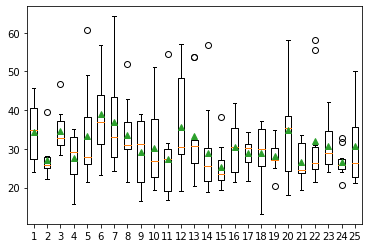

In [190]:
make_box_plots(data, "MAE")

In [206]:
def plot_mean(data, metric):
    data_summary = pd.DataFrame(data).transpose().rename(columns = {0:"MSE", 1:"R2", 2:"F1", 3:"NEP", 4:"NDE", 5:"MAE"})
    bldgs = [data_summary[x:x+10][str(metric)].values for x in range(len(data_summary)) if x%10==0]
    print(list(np.mean(bldgs, axis=1)))
    return plt.plot(np.mean(bldgs, axis=1))

[34.37198078632355, 27.17901403903961, 34.587491273880005, 27.54542472362518, 33.34457516670227, 38.91130828857422, 36.86394395828247, 33.450046229362485, 29.249606823921205, 30.323998427391054, 27.441384148597717, 35.68664836883545, 33.25919131040573, 28.93523256778717, 25.284652090072633, 30.408044075965883, 28.88902690410614, 28.963697707653047, 28.08529386520386, 34.826508331298825, 26.620311427116395, 31.91039366722107, 30.61664228439331, 26.480461621284483, 30.727943348884583]


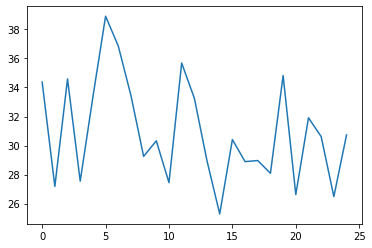

In [207]:
plot_mean(data, 'MAE')

In [174]:
def plot_std(data, metric):
    data_summary = pd.DataFrame(data).transpose().rename(columns = {0:"MSE", 1:"R2", 2:"F1", 3:"NEP", 4:"NDE", 5:"MAE"})
    bldgs = [data_summary[x:x+10][str(metric)].values for x in range(len(data_summary)) if x%10==0]
    return plt.plot(np.std(bldgs, axis=1))

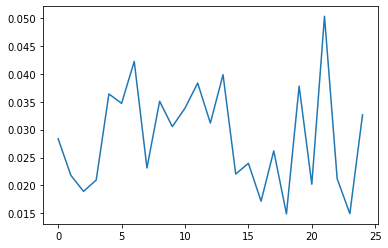

In [182]:
plot_std(data, 'MSE')

In [187]:
#train on 1 random home, test on 1 home results
one_train_one_test = {'Train_home_2602_Test_home_145_trial_0': [0.040176667273044586, 0.5350352393891653, 0.6995605416768369, 0.6202009862456976, 0.16763660105062883, 25.120263894399006], 'Train_home_2602_Test_home_145_trial_1': [0.05921102687716484, -2.0440782008511387, 0.7124453406067465, 0.6474282140808139, 0.24652965752880682, 26.279175281524658], 'Train_home_2602_Test_home_145_trial_2': [0.03823353722691536, 0.5057120170055666, 0.7560540177590247, 0.5195950316365615, 0.14908920077524376, 22.51904609468248], 'Train_home_2602_Test_home_145_trial_3': [0.05927851051092148, 0.30235999898475624, 0.6887774979077629, 0.6375544077244527, 0.25398679080020226, 25.147226519054836], 'Train_home_2602_Test_home_145_trial_4': [0.041999612003564835, 0.4882201798661358, 0.6926759932829819, 0.6551516045754432, 0.1793288404278918, 25.931260691748726], 'Train_home_2602_Test_home_145_trial_5': [0.03647385537624359, 0.47454400621218595, 0.7559350868535851, 0.5200739818305863, 0.14116170384252258, 22.709971851772732], 'Train_home_2602_Test_home_145_trial_6': [0.11966244131326675, -1.064580240229691, 0.495144746087016, 1.2211936160376278, 0.4605021188671462, 53.628720707363556], 'Train_home_2602_Test_home_145_trial_7': [0.1058136448264122, -1.0395888561208113, 0.5233829748688715, 1.1160730460487083, 0.4145315960798125, 48.14635025130378], 'Train_home_2602_Test_home_145_trial_8': [0.03477741405367851, 0.454301144430442, 0.7551700010595161, 0.472974838218259, 0.143859846549889, 19.323349661297268], 'Train_home_2602_Test_home_145_trial_9': [0.04593951627612114, -0.4233190250154665, 0.6992317961832466, 0.6502480240201282, 0.18772461796476841, 26.892483287387424], 'Train_home_1240_Test_home_518_trial_0': [0.16696804761886597, -0.8029177145635302, 0.330246179185051, 1.061495864107348, 0.5406991734830829, 55.39654350280762], 'Train_home_1240_Test_home_518_trial_1': [0.1421043872833252, -1.0309879809684908, 0.3603602061554123, 1.1030694507951269, 0.5076501240101836, 52.1834230211046], 'Train_home_1240_Test_home_518_trial_2': [0.1428082138299942, -0.7208309734200375, 0.342751374536081, 1.1026372274300804, 0.522375694525131, 50.94359147813585], 'Train_home_1240_Test_home_518_trial_3': [0.15462778508663177, -0.6270411330811336, 0.34384646018458653, 1.0691058538056373, 0.5142801474616763, 54.324424997965494], 'Train_home_1240_Test_home_518_trial_4': [0.1594161093235016, -1.0189699473034592, 0.33037198747186325, 1.0733883577778536, 0.5316598258287396, 54.39286524454753], 'Train_home_1240_Test_home_518_trial_5': [0.14113833010196686, -0.8375110719493595, 0.3455177502273711, 1.137111852290704, 0.5245533921351407, 51.706502956814234], 'Train_home_1240_Test_home_518_trial_6': [0.14234046638011932, -0.6232183947079312, 0.3522625589613987, 1.0677044460454845, 0.5106981537086099, 50.29233741760254], 'Train_home_1240_Test_home_518_trial_7': [0.16293306648731232, -1.0306040477256764, 0.36236931577444914, 1.0089313390172745, 0.516691203916662, 53.76832110087077], 'Train_home_1240_Test_home_518_trial_8': [0.1363573968410492, -0.7060437572134186, 0.3433265095072676, 1.151195724294903, 0.5232934690939703, 50.695475006103514], 'Train_home_1240_Test_home_518_trial_9': [0.15628387033939362, -0.8211889401026671, 0.3363625411426606, 1.0681309550050495, 0.5289489288953005, 53.33491698371039], 'Train_home_4735_Test_home_558_trial_0': [0.12675102055072784, -0.11930339027325093, 0.4802788458210964, 0.944528932682456, 0.4833046093056032, 41.863205973307295], 'Train_home_4735_Test_home_558_trial_1': [0.12433425337076187, -0.10112702446732241, 0.5012986948129039, 0.8827606380338984, 0.48203296433857873, 38.48077074686686], 'Train_home_4735_Test_home_558_trial_2': [0.11468223482370377, -0.12194030253824091, 0.4889351703058594, 0.9711741131216777, 0.476870979572468, 39.47108472188314], 'Train_home_4735_Test_home_558_trial_3': [0.129390150308609, -0.1359004096951919, 0.5049839859378912, 0.8891788854149493, 0.4638564648151501, 41.917315038045246], 'Train_home_4735_Test_home_558_trial_4': [0.140033558011055, -0.1706410681326712, 0.4856474780004399, 0.8698543070109417, 0.5003473818040641, 41.14278895060222], 'Train_home_4735_Test_home_558_trial_5': [0.09900928288698196, -0.05346552448121979, 0.5111732869945806, 0.9204994315260336, 0.4469891661558323, 34.45792821248372], 'Train_home_4735_Test_home_558_trial_6': [0.1286795437335968, -0.14580961247247468, 0.4924472289237465, 0.9102656020124285, 0.47861912364904097, 41.35941073099772], 'Train_home_4735_Test_home_558_trial_7': [0.13680428266525269, -0.14896007221441182, 0.47014193254964703, 0.8994016563156133, 0.5077707994950913, 40.9517396291097], 'Train_home_4735_Test_home_558_trial_8': [0.09889096021652222, -0.008830908738437527, 0.5201491769256953, 0.8616636255480336, 0.44119162476673657, 32.6402774810791], 'Train_home_4735_Test_home_558_trial_9': [0.12643541395664215, -0.11086637113714279, 0.48580187386427515, 0.9123752363222237, 0.47418812241451824, 41.112918090820315], 'Train_home_1417_Test_home_690_trial_0': [0.019165588542819023, 0.6104856993942045, 0.659494315811179, 0.5123483240655574, 0.11330509590610131, 14.646192193031311], 'Train_home_1417_Test_home_690_trial_1': [0.038431935012340546, -0.3641241625972258, 0.6376970088898113, 0.7559297975721981, 0.2771077171126618, 17.717881321907043], 'Train_home_1417_Test_home_690_trial_2': [0.035066064447164536, 0.6246295572866176, 0.7046141511977373, 0.5329441143393426, 0.17112835571118493, 18.455823212862015], 'Train_home_1417_Test_home_690_trial_3': [0.04504918307065964, 0.6571699933824947, 0.6457885051518524, 0.6987258420163697, 0.22070083845056906, 24.10329532623291], 'Train_home_1417_Test_home_690_trial_4': [0.03545080125331879, 0.649567985416053, 0.7002473555642348, 0.5813226098557667, 0.16894589076927927, 20.61495304107666], 'Train_home_1417_Test_home_690_trial_5': [0.02715524472296238, 0.7093453236217487, 0.7458484474693083, 0.502803935588508, 0.13946502288304521, 16.54526662826538], 'Train_home_1417_Test_home_690_trial_6': [0.020976660773158073, 0.7231491730458934, 0.6940137110823132, 0.5059721393508319, 0.12004722395466756, 14.941614329814911], 'Train_home_1417_Test_home_690_trial_7': [0.04401381313800812, -0.23111311875568147, 0.7114290870810238, 0.7064905761246116, 0.22941499466380932, 22.906581580638885], 'Train_home_1417_Test_home_690_trial_8': [0.03177583962678909, 0.009508680342778741, 0.6810942695538185, 0.6300617989866455, 0.1858192764845124, 18.20858120918274], 'Train_home_1417_Test_home_690_trial_9': [0.06696628034114838, 0.3869597120553992, 0.6467221488288177, 0.8414672779826585, 0.37823476636807246, 25.177850782871246], 'Train_home_6868_Test_home_914_trial_0': [0.06426986306905746, 0.27059763980017365, 0.7214155365880961, 0.5674727578389072, 0.24117406636847974, 25.556920906854053], 'Train_home_6868_Test_home_914_trial_1': [0.05524551123380661, 0.3896988501932942, 0.6825560517728253, 0.6323498420845219, 0.20034019150570678, 29.469518419296023], 'Train_home_6868_Test_home_914_trial_2': [0.11004830151796341, -0.37914493706580854, 0.5136280734377812, 1.0618399716067999, 0.38990874591967434, 50.648451123918804], 'Train_home_6868_Test_home_914_trial_3': [0.07309284806251526, 0.2652196324437294, 0.672405572077398, 0.5982670451249826, 0.251457248776689, 29.38952396029518], 'Train_home_6868_Test_home_914_trial_4': [0.059073884040117264, 0.2486139255608043, 0.6848645053935399, 0.6479025340384593, 0.2336971515836993, 27.678240503583634], 'Train_home_6868_Test_home_914_trial_5': [0.12356363236904144, -0.9855835689967737, 0.4753318323101653, 1.2644952079283454, 0.4703685443608513, 56.13791662549216], 'Train_home_6868_Test_home_914_trial_6': [0.07400612533092499, 0.24566078165494695, 0.6284446746126974, 0.7689593759946023, 0.27950413180641354, 34.40880254715208], 'Train_home_6868_Test_home_914_trial_7': [0.06604988873004913, 0.2573574601613081, 0.6429867838359319, 0.7031425751793077, 0.23529966576922126, 33.35652778262184], 'Train_home_6868_Test_home_914_trial_8': [0.08203399926424026, -0.032200636487886666, 0.6150767520358214, 0.8303072907515743, 0.31168039715766716, 36.932607484242276], 'Train_home_6868_Test_home_914_trial_9': [0.047203827649354935, 0.42000588523737675, 0.7309441313527008, 0.4909148439129791, 0.17855798757046015, 21.93263522405473], 'Train_home_2602_Test_home_950_trial_0': [0.11927787959575653, 0.046352587674025655, 0.41754165255971576, 1.2827117870857443, 0.5438604133509721, 47.5431809425354], 'Train_home_2602_Test_home_950_trial_1': [0.1528531312942505, -0.12381728627936998, 0.4773757168762001, 1.167701157922694, 0.5933252478622649, 50.83934307098389], 'Train_home_2602_Test_home_950_trial_2': [0.13351531326770782, -0.17123930113951757, 0.4600082401343012, 1.2782711296070417, 0.588600632248767, 49.0027060508728], 'Train_home_2602_Test_home_950_trial_3': [0.14812250435352325, -0.13462020781523398, 0.37216672278963575, 1.144665278326408, 0.5843766460066064, 49.033560276031494], 'Train_home_2602_Test_home_950_trial_4': [0.12520718574523926, 0.08346193317081785, 0.4976359594875329, 1.147793908627099, 0.4970672503167678, 48.86126780509949], 'Train_home_2602_Test_home_950_trial_5': [0.13294504582881927, -0.018841707046933165, 0.4806386463569075, 1.0024644723351939, 0.4845877159964664, 46.4788544178009], 'Train_home_2602_Test_home_950_trial_6': [0.17622457444667816, -0.171863538135422, 0.5337338574096545, 1.1200644271229074, 0.6159976597777657, 54.15232753753662], 'Train_home_2602_Test_home_950_trial_7': [0.1415855884552002, -0.023914679939418468, 0.4518631342544024, 1.2389841065103326, 0.5046261960875048, 58.749167919158936], 'Train_home_2602_Test_home_950_trial_8': [0.1284128725528717, -0.013981808404577703, 0.4411456490646878, 1.1002892819521393, 0.5152482726525561, 46.34315872192383], 'Train_home_2602_Test_home_950_trial_9': [0.11963028460741043, 0.06484867847716143, 0.47592350625407265, 1.0639966815793362, 0.45577128895140623, 47.19773769378662], 'Train_home_2602_Test_home_1222_trial_0': [0.09906239807605743, -0.24100798097998796, 0.5229885162715611, 1.1428107937884233, 0.5039197801549766, 37.967190424601235], 'Train_home_2602_Test_home_1222_trial_1': [0.11193954944610596, -1.113720777569146, 0.48617999930986894, 1.3962239630080935, 0.6288462981579928, 42.00305023899785], 'Train_home_2602_Test_home_1222_trial_2': [0.09310683608055115, -0.8831631021470309, 0.5141724408914005, 1.1981492723802556, 0.48135313091510235, 39.16655554594817], 'Train_home_2602_Test_home_1222_trial_3': [0.10624466091394424, -2.0068414234846603, 0.4995003038867523, 1.2413566242010952, 0.538577470582748, 41.384928385416664], 'Train_home_2602_Test_home_1222_trial_4': [0.08546129614114761, -0.615840368009092, 0.48594434747445775, 1.2578414604201493, 0.43178088557787836, 42.07447345168502], 'Train_home_2602_Test_home_1222_trial_5': [0.09245969355106354, -0.35806246333641384, 0.5490135716034724, 1.0117112756091171, 0.4261247728933431, 37.09872417096739], 'Train_home_2602_Test_home_1222_trial_6': [0.11427279561758041, -1.4600448269437858, 0.4767608466518975, 1.3851360989066548, 0.60022247157453, 44.566621957001864], 'Train_home_2602_Test_home_1222_trial_7': [0.08118017762899399, -0.547787734239102, 0.4830990463223475, 1.2068403110257535, 0.4542504707488536, 36.44946158373797], 'Train_home_2602_Test_home_1222_trial_8': [0.08306696265935898, -0.49346011491257424, 0.50939064649106, 1.0124033840786695, 0.4254974950745316, 33.40193162141023], 'Train_home_2602_Test_home_1222_trial_9': [0.1576751172542572, -1.0278210832184154, 0.32009510585006207, 1.9937383257611476, 0.8130953810081494, 65.33960999382867], 'Train_home_6564_Test_home_1240_trial_0': [0.11917684227228165, -0.4954280256634407, 0.24748814620549936, 1.4031000799475226, 0.6758871283377295, 41.81124136182997], 'Train_home_6564_Test_home_1240_trial_1': [0.14965501427650452, -1.4154715485553728, 0.3485154881453461, 1.56315865789403, 0.8402873478606415, 47.04930337270101], 'Train_home_6564_Test_home_1240_trial_2': [0.1419462114572525, -0.6415813522261136, 0.31813622384655815, 1.7276628257546207, 0.6930360458938227, 59.801720513237846], 'Train_home_6564_Test_home_1240_trial_3': [0.1854940503835678, -3.7517075486709723, 0.318381888480695, 1.4467436170631975, 0.9226975076810844, 49.15287494659424], 'Train_home_6564_Test_home_1240_trial_4': [0.155636265873909, -0.4423912868750493, 0.3487577417547374, 1.496145135719671, 0.6283401279976703, 62.62913513183594], 'Train_home_6564_Test_home_1240_trial_5': [0.17196276783943176, -3.376993930941349, 0.2932380146673061, 1.4910257437096281, 0.8876698648846316, 48.81516806284586], 'Train_home_6564_Test_home_1240_trial_6': [0.1663823276758194, -1.4505881713823947, 0.43896708166125437, 1.5300930302019675, 0.8156158315097823, 52.750437312655976], 'Train_home_6564_Test_home_1240_trial_7': [0.1724431812763214, -3.363182330459586, 0.2795568444952114, 1.291421833799408, 0.8081968388161485, 46.567582077450226], 'Train_home_6564_Test_home_1240_trial_8': [0.135407954454422, -0.7257749740121401, 0.34474361920387625, 1.7949339836528895, 0.7116858716153981, 57.715304692586265], 'Train_home_6564_Test_home_1240_trial_9': [0.12931455671787262, -0.32289173381463754, 0.34622796791720606, 1.3525514522262638, 0.6669569382315061, 44.31901762220595], 'Train_home_6564_Test_home_1417_trial_0': [0.10290171205997467, -1.5029603480093672, 0.6483833660917904, 0.8117420800798352, 0.3489185552846667, 40.45789533853531], 'Train_home_6564_Test_home_1417_trial_1': [0.07465717941522598, -1.4526493462050447, 0.5816737248916052, 0.8498151823819738, 0.3030329902174015, 35.38285452127457], 'Train_home_6564_Test_home_1417_trial_2': [0.08346616476774216, 0.053639163430157365, 0.6396339276405452, 0.7434465881872049, 0.2995335319516526, 35.01075604557991], 'Train_home_6564_Test_home_1417_trial_3': [0.07464534044265747, 0.3120495734326398, 0.5472677885458131, 1.0444356047734318, 0.36624372005228545, 35.97500675916672], 'Train_home_6564_Test_home_1417_trial_4': [0.12709377706050873, -2.227075723177148, 0.5928776641332472, 1.1375359784312935, 0.5991974734233126, 40.77614077925682], 'Train_home_6564_Test_home_1417_trial_5': [0.08021712303161621, -1.452228702740836, 0.6213616564571698, 0.8752946363184456, 0.32708307999153546, 36.27855461835861], 'Train_home_6564_Test_home_1417_trial_6': [0.07654384523630142, 0.09247021594779253, 0.6436909180452643, 0.7858861256038352, 0.3174487795196207, 32.02454096078873], 'Train_home_6564_Test_home_1417_trial_7': [0.06872062385082245, 0.43068486956878543, 0.6615720437803603, 0.7217241423933717, 0.2840174625019709, 29.512091130018234], 'Train_home_6564_Test_home_1417_trial_8': [0.06753621250391006, -1.6073392480548363, 0.6126103403584593, 0.7832514140235372, 0.3102525968768542, 28.814373195171356], 'Train_home_6564_Test_home_1417_trial_9': [0.06695272773504257, 0.4098260785306949, 0.6640038380422062, 0.7484666438170645, 0.2845935760526071, 29.75790375471115], 'Train_home_1222_Test_home_2318_trial_0': [0.09997638314962387, 0.054632621081276186, 0.5659553802031221, 0.7530568744640781, 0.3501922360386081, 36.33334544125725], 'Train_home_1222_Test_home_2318_trial_1': [0.08103517442941666, 0.25132167809242884, 0.6216788356761503, 0.6898205885158434, 0.2932244344271993, 32.217829059152045], 'Train_home_1222_Test_home_2318_trial_2': [0.08661296218633652, -0.10959338497693347, 0.7013250509034116, 0.5861818168483609, 0.2838386128108514, 30.229465007781982], 'Train_home_1222_Test_home_2318_trial_3': [0.13796520233154297, -0.7700398789807373, 0.2997347059101964, 1.206080518622651, 0.5486142918618192, 51.258446973912854], 'Train_home_1222_Test_home_2318_trial_4': [0.08022147417068481, 0.30364426938176425, 0.6332706142485122, 0.6230568731527457, 0.29222671768787, 28.90580721462474], 'Train_home_1222_Test_home_2318_trial_5': [0.07152999192476273, 0.1918049626558701, 0.6343089132750068, 0.6390013633083511, 0.264358768537845, 29.220183540793027], 'Train_home_1222_Test_home_2318_trial_6': [0.08860918134450912, 0.01751692995810382, 0.5802085904885219, 0.7134127917578813, 0.29466143568146674, 36.25626443414127], 'Train_home_1222_Test_home_2318_trial_7': [0.0864693820476532, 0.16811091512252888, 0.6026270892030838, 0.7276409987843071, 0.35224217287818654, 30.18734373765833], 'Train_home_1222_Test_home_2318_trial_8': [0.08432725816965103, 0.24971845687112793, 0.6032420659811235, 0.688037888309314, 0.32389601217448244, 30.273417164297665], 'Train_home_1222_Test_home_2318_trial_9': [0.07887700200080872, 0.10204223006495604, 0.5618520972973684, 0.7491082925147379, 0.2788860951455995, 35.80592155456543], 'Train_home_5192_Test_home_2358_trial_0': [0.08658791333436966, -0.2619182579564897, 0.4783228352853373, 1.2011430061751187, 0.4284650027425633, 41.02261479695638], 'Train_home_5192_Test_home_2358_trial_1': [0.0777062177658081, -1.2469803774923687, 0.5617799855099694, 1.1946611731678394, 0.43569187770900064, 36.00872802734375], 'Train_home_5192_Test_home_2358_trial_2': [0.07014928013086319, -0.49732618262417533, 0.47842721445624775, 1.3914755982945715, 0.43901337956740094, 37.57576052347819], 'Train_home_5192_Test_home_2358_trial_3': [0.058772388845682144, -0.5386391977754993, 0.4980663353022285, 1.3356899474680666, 0.393798250999174, 33.68929640452067], 'Train_home_5192_Test_home_2358_trial_4': [0.07453611493110657, -0.24406913427582033, 0.6317323740250061, 0.9334482353232384, 0.3899937808444991, 30.149909337361652], 'Train_home_5192_Test_home_2358_trial_5': [0.08047938346862793, -0.11019905600317749, 0.490692683519893, 1.156884952215367, 0.41943783572476256, 37.514045079549156], 'Train_home_5192_Test_home_2358_trial_6': [0.07132060080766678, -0.27695674131603054, 0.49799787532370837, 1.1930857250304636, 0.40136626810837595, 35.82881609598795], 'Train_home_5192_Test_home_2358_trial_7': [0.07003666460514069, -0.3144061584668663, 0.5101128382096966, 1.1760351745918736, 0.40091819577261634, 34.71975644429525], 'Train_home_5192_Test_home_2358_trial_8': [0.070203498005867, -0.2833082104280839, 0.5120197706905476, 1.1573080209341664, 0.3940674175316954, 34.843668619791664], 'Train_home_5192_Test_home_2358_trial_9': [0.06498127430677414, -0.24675486017570125, 0.5025277148792231, 1.265869492898613, 0.3867620947695472, 35.943467458089195], 'Train_home_10983_Test_home_2448_trial_0': [0.07022134214639664, 0.5420596972939747, 0.6508582716610677, 0.7822533842373959, 0.26756305588744295, 34.695818066596985], 'Train_home_10983_Test_home_2448_trial_1': [0.03564563766121864, 0.7534086271058809, 0.7385220003554361, 0.5407602892978411, 0.1335271857916637, 24.396538376808167], 'Train_home_10983_Test_home_2448_trial_2': [0.029757816344499588, 0.7603784933473792, 0.7324359015572989, 0.5600645390554294, 0.11373009267821181, 24.765690565109253], 'Train_home_10983_Test_home_2448_trial_3': [0.04853034391999245, 0.5586583744169257, 0.7426281739243419, 0.5868852907367123, 0.1980053818287014, 24.309517443180084], 'Train_home_10983_Test_home_2448_trial_4': [0.04722093045711517, 0.62822445773579, 0.6695897804842039, 0.6935397755605941, 0.19311121646317023, 28.66058623790741], 'Train_home_10983_Test_home_2448_trial_5': [0.032409023493528366, 0.7599143264628102, 0.6587317555666885, 0.6677408783306303, 0.13832344543719408, 26.440204620361328], 'Train_home_10983_Test_home_2448_trial_6': [0.16635377705097198, -0.24406992487323692, 0.3702073858185835, 1.6652088238421245, 0.6934151068185365, 67.51414442062378], 'Train_home_10983_Test_home_2448_trial_7': [0.07006754726171494, 0.4675709671548381, 0.6924800848965507, 0.7287044986595458, 0.2682128515143871, 32.17180836200714], 'Train_home_10983_Test_home_2448_trial_8': [0.04610772058367729, 0.6869441543341148, 0.7361879147918221, 0.5762737924247565, 0.18437829417452067, 24.35451191663742], 'Train_home_10983_Test_home_2448_trial_9': [0.050767723470926285, 0.6769906941954348, 0.7509243961788139, 0.5542500197774743, 0.19375247364810116, 24.543294489383698], 'Train_home_10983_Test_home_3488_trial_0': [0.06027887016534805, 0.17728971329444443, 0.6887566283489213, 0.6215338518819657, 0.22878403680847847, 27.675206650627985], 'Train_home_10983_Test_home_3488_trial_1': [0.05380718410015106, 0.2639087774244669, 0.7078769129720798, 0.5694127781555711, 0.19639283134829966, 26.365044678582084], 'Train_home_10983_Test_home_3488_trial_2': [0.059725698083639145, 0.025761634257935404, 0.6667080622724674, 0.6341981062668721, 0.2315796089289343, 27.642197460598418], 'Train_home_10983_Test_home_3488_trial_3': [0.06008531525731087, 0.02682466123793673, 0.6889073594966829, 0.6027638745658364, 0.2232256295213104, 27.419416173299155], 'Train_home_10983_Test_home_3488_trial_4': [0.05533034726977348, 0.3214800159448681, 0.6997858275229071, 0.624114034865055, 0.20585581326800975, 28.34985925886366], 'Train_home_10983_Test_home_3488_trial_5': [0.06839794665575027, 0.016808246430367976, 0.698704630825907, 0.6624675291094296, 0.2658128984531311, 28.808346441056994], 'Train_home_10983_Test_home_3488_trial_6': [0.05077262595295906, 0.44624831482532457, 0.6595801085134039, 0.6413420887962757, 0.19018364465805354, 28.93562469482422], 'Train_home_10983_Test_home_3488_trial_7': [0.06365349143743515, 0.14602583634882443, 0.6841464734984731, 0.6439807351374544, 0.2428113696859242, 28.53072075313992], 'Train_home_10983_Test_home_3488_trial_8': [0.05749800056219101, 0.1941494527857974, 0.6807680748685819, 0.6453839896537397, 0.21747890598599945, 28.83636186387804], 'Train_home_10983_Test_home_3488_trial_9': [0.05933461710810661, 0.022278753774078355, 0.637861101205981, 0.7381955269489242, 0.23136439545322857, 31.994085905287], 'Train_home_3488_Test_home_3996_trial_0': [0.11575361341238022, -0.22502604102250684, 0.4296522913746713, 0.9693566348904439, 0.47885777136598706, 39.60028562740404], 'Train_home_3488_Test_home_3996_trial_1': [0.09607679396867752, -0.03795137941436585, 0.4846073391567936, 0.9778831631931663, 0.431766793955034, 36.774174748634806], 'Train_home_3488_Test_home_3996_trial_2': [0.09058652073144913, -0.07202836162563477, 0.4438478727144029, 1.0824754699429995, 0.46785072345742124, 35.42101696559361], 'Train_home_3488_Test_home_3996_trial_3': [0.10216927528381348, -0.14616719571596345, 0.41908923894903394, 0.9420336823168087, 0.47044480439601166, 34.57520712638388], 'Train_home_3488_Test_home_3996_trial_4': [0.09267144650220871, 0.011216129341403798, 0.49249082284539614, 0.8610016907072982, 0.42152601507133985, 31.98985413142613], 'Train_home_3488_Test_home_3996_trial_5': [0.10041536390781403, -0.04692868958490146, 0.4516486691661037, 0.9267865504161905, 0.43294127610298316, 36.32767484625992], 'Train_home_3488_Test_home_3996_trial_6': [0.08911094814538956, -0.05693688565606732, 0.5091052456627033, 0.9271101491546239, 0.3999328382190963, 34.91097812263333], 'Train_home_3488_Test_home_3996_trial_7': [0.08994857221841812, -0.00986166057840682, 0.47814698075810225, 0.8893763363847286, 0.4302373058412482, 31.423784742549973], 'Train_home_3488_Test_home_3996_trial_8': [0.08606432378292084, -0.18558840910099425, 0.46548898190190224, 1.0238201887182818, 0.4368933032133179, 34.08459717886789], 'Train_home_3488_Test_home_3996_trial_9': [0.12056294828653336, -0.11692695110157482, 0.40125371686275296, 1.0379960000244726, 0.5054598430134668, 41.84172163204271], 'Train_home_6564_Test_home_4283_trial_0': [0.028009910136461258, 0.7026551922838807, 0.763412110502766, 0.3850485285601968, 0.08678269167442723, 21.00297286635951], 'Train_home_6564_Test_home_4283_trial_1': [0.03176438808441162, 0.45587475945364264, 0.7784476662763697, 0.3960633512591818, 0.10229586866642117, 20.784221937781886], 'Train_home_6564_Test_home_4283_trial_2': [0.029869332909584045, 0.6638267233727633, 0.7468093185458642, 0.4564992863715461, 0.09838480775762733, 23.422014637997275], 'Train_home_6564_Test_home_4283_trial_3': [0.026042049750685692, 0.6825552918235298, 0.7730070032195813, 0.3759005811971987, 0.08176485552559687, 20.233367104279367], 'Train_home_6564_Test_home_4283_trial_4': [0.027608593925833702, 0.5761140245042423, 0.7653534979592472, 0.38375609730288585, 0.08721142228576216, 20.531131581256265], 'Train_home_6564_Test_home_4283_trial_5': [0.02819415181875229, 0.5291803296452723, 0.7678294096714045, 0.3961223599280669, 0.08925048958597807, 21.147764977655914], 'Train_home_6564_Test_home_4283_trial_6': [0.026220371946692467, 0.6855135595590393, 0.7580062461192129, 0.36418923340617576, 0.0810735379979998, 19.90551879531459], 'Train_home_6564_Test_home_4283_trial_7': [0.02500646933913231, 0.7028706913410565, 0.775223692808435, 0.35964950918828514, 0.07844915379284621, 19.374489370145294], 'Train_home_6564_Test_home_4283_trial_8': [0.023368313908576965, 0.5946901198842942, 0.7785706596961235, 0.3443022339906561, 0.07179235268365992, 18.939813425666408], 'Train_home_6564_Test_home_4283_trial_9': [0.15557292103767395, -0.8501245933737515, 0.466248640811501, 1.0804045361154044, 0.47656706572384067, 59.6050446911862], 'Train_home_9002_Test_home_4414_trial_0': [0.06727452576160431, 0.3722280446049982, 0.616175590492429, 0.717870580943604, 0.28643595542569295, 28.494166082265426], 'Train_home_9002_Test_home_4414_trial_1': [0.0948755070567131, 0.2260529026788685, 0.4697632432510104, 0.852323984955402, 0.38880419781540465, 35.149129614538076], 'Train_home_9002_Test_home_4414_trial_2': [0.09543691575527191, 0.051549584850532876, 0.46915101839402124, 0.9797744024989794, 0.3976838050989534, 39.73665365880849], 'Train_home_9002_Test_home_4414_trial_3': [0.07743199914693832, 0.09166799089535776, 0.5709842634881974, 0.7732831423407533, 0.32823064805623187, 30.82950634859046], 'Train_home_9002_Test_home_4414_trial_4': [0.07215101271867752, 0.35755380771655937, 0.5231197246421465, 0.788916051143339, 0.31694497386887144, 30.351212871317962], 'Train_home_9002_Test_home_4414_trial_5': [0.0842733159661293, 0.1968619378275753, 0.5453874855557251, 0.8462484593068745, 0.342859612051917, 35.15267193074129], 'Train_home_9002_Test_home_4414_trial_6': [0.07307938486337662, 0.27386888984668534, 0.562018842059484, 0.7897621062124711, 0.3141660065658672, 31.04693506201919], 'Train_home_9002_Test_home_4414_trial_7': [0.06769915670156479, 0.11235411910519537, 0.5735075411878885, 0.7949668327930315, 0.3258219322273485, 27.915066504965022], 'Train_home_9002_Test_home_4414_trial_8': [0.13264892995357513, -0.18414329250033215, 0.35077422770494027, 1.0991116900411333, 0.5461836068192728, 45.11216704699458], 'Train_home_9002_Test_home_4414_trial_9': [0.10710166394710541, 0.050233580094908074, 0.4184178755366508, 1.0362076778247171, 0.4492378325316748, 41.7497041663345], 'Train_home_7935_Test_home_5587_trial_0': [0.05806110426783562, 0.47198973815917605, 0.6826879617495338, 0.6105704706278842, 0.21700354849688985, 27.608379811048508], 'Train_home_7935_Test_home_5587_trial_1': [0.048992279917001724, 0.47235897627994117, 0.6904619874987754, 0.5997319373974499, 0.19479780161190086, 25.49103730916977], 'Train_home_7935_Test_home_5587_trial_2': [0.0621502548456192, 0.2501665829983938, 0.6945880728066577, 0.6411271101531254, 0.23517236622251222, 28.634359061717987], 'Train_home_7935_Test_home_5587_trial_3': [0.1301395297050476, -0.5873377472211747, 0.44390297430094033, 1.205868327735263, 0.48044160733175495, 55.20205342769623], 'Train_home_7935_Test_home_5587_trial_4': [0.05410081148147583, 0.4562182450493112, 0.7006118391235748, 0.6330580047444723, 0.2064814863650707, 28.031921565532684], 'Train_home_7935_Test_home_5587_trial_5': [0.05965317413210869, 0.5162755606303098, 0.7304172843891479, 0.5707591347272299, 0.20855779356509857, 27.589684009552002], 'Train_home_7935_Test_home_5587_trial_6': [0.059780653566122055, 0.4411361384934333, 0.6805927776938809, 0.6073881982775157, 0.21675328473540129, 28.310529559850693], 'Train_home_7935_Test_home_5587_trial_7': [0.055954862385988235, 0.22736110819941735, 0.6466326482422597, 0.6538408417495574, 0.244247877469581, 25.314292654395103], 'Train_home_7935_Test_home_5587_trial_8': [0.04927569627761841, 0.582856138004595, 0.7391322024438703, 0.486069788813159, 0.16604770877889738, 24.377280443906784], 'Train_home_7935_Test_home_5587_trial_9': [0.058318935334682465, 0.32372355978352435, 0.6519054173933809, 0.669919830703861, 0.23818327243757098, 27.720934838056564], 'Train_home_9290_Test_home_5982_trial_0': [0.1561063528060913, -0.26960078432095513, 0.38855613329057154, 0.7790471964063976, 0.5772121446537969, 35.6070135307312], 'Train_home_9290_Test_home_5982_trial_1': [0.09761467576026917, 0.17660835248537163, 0.524469228043357, 0.6896694794241758, 0.3702034534575123, 30.73281557718913], 'Train_home_9290_Test_home_5982_trial_2': [0.07846306264400482, 0.31221611057654075, 0.5230546265681372, 0.6917820069341234, 0.33776945182013274, 27.15819111506144], 'Train_home_9290_Test_home_5982_trial_3': [0.09757433086633682, 0.14017686674611018, 0.5789274743628013, 0.6396630324606922, 0.3709946465819527, 28.431902551651], 'Train_home_9290_Test_home_5982_trial_4': [0.10278156399726868, 0.18417741855428676, 0.5492179225080243, 0.6773974082422313, 0.362048404107606, 32.49966030120849], 'Train_home_9290_Test_home_5982_trial_5': [0.12785866856575012, 0.015368791943528658, 0.4337747080813755, 0.7003361657843377, 0.47020484266165635, 32.18372603416443], 'Train_home_9290_Test_home_5982_trial_6': [0.1264028400182724, -0.0754608995856275, 0.42276725835578194, 0.8353473707831858, 0.5241095376428531, 34.0477601369222], 'Train_home_9290_Test_home_5982_trial_7': [0.08273441344499588, 0.1561343432226496, 0.5714908079238638, 0.6389933713978605, 0.3212670404388049, 27.8101362546285], 'Train_home_9290_Test_home_5982_trial_8': [0.09675367176532745, 0.167233976687957, 0.5395658032797216, 0.6614752186080357, 0.35594277611605296, 30.386982510884604], 'Train_home_9290_Test_home_5982_trial_9': [0.10652545094490051, -0.021836732639670314, 0.49043155870637906, 0.7633823028410914, 0.42084797370073085, 32.65554405212402], 'Train_home_4283_Test_home_5997_trial_0': [0.022164875641465187, 0.7922192699031295, 0.837987324942272, 0.25343496747266214, 0.07154488456768794, 13.269053152629308], 'Train_home_4283_Test_home_5997_trial_1': [0.02961716242134571, 0.7657498910050601, 0.8084482890670212, 0.3203689544028167, 0.09900677265839725, 16.1962936265128], 'Train_home_4283_Test_home_5997_trial_2': [0.02398291788995266, 0.7877499514528856, 0.7862947459543953, 0.3361124279089362, 0.07869816165974672, 17.310462701888312], 'Train_home_4283_Test_home_5997_trial_3': [0.0236910879611969, 0.8083597002208125, 0.7836732955052926, 0.3463697762266521, 0.08975545503390292, 15.450795287177677], 'Train_home_4283_Test_home_5997_trial_4': [0.03056757152080536, 0.7366453597958595, 0.7642182098588652, 0.38548842431941144, 0.10130361725641582, 19.657758372170584], 'Train_home_4283_Test_home_5997_trial_5': [0.03318268805742264, 0.6819466548506364, 0.7314139962958828, 0.3944427945170654, 0.11622189560874226, 19.032432260967436], 'Train_home_4283_Test_home_5997_trial_6': [0.033547647297382355, 0.6800365692785524, 0.6648409623026921, 0.5292577402025475, 0.13163563071324003, 22.795153776804607], 'Train_home_4283_Test_home_5997_trial_7': [0.04580925777554512, 0.6470119139511717, 0.770463120633304, 0.40336996695340616, 0.14765481643758802, 21.149296760559082], 'Train_home_4283_Test_home_5997_trial_8': [0.041734084486961365, 0.6734686177651741, 0.754424008976561, 0.3876689879137747, 0.13433587030033067, 20.35385431562151], 'Train_home_4283_Test_home_5997_trial_9': [0.03402641788125038, 0.7128901609231345, 0.771712070303887, 0.34774598319318767, 0.1272116788591592, 15.719475292024159], 'Train_home_914_Test_home_6069_trial_0': [0.14039751887321472, -0.43151422218692004, 0.2801285992957234, 1.5794423374872237, 0.6681475868216118, 56.08897249626391], 'Train_home_914_Test_home_6069_trial_1': [0.14417600631713867, -0.3887800113557237, 0.2692709681550513, 1.5333595154233657, 0.6678085149069145, 55.94634871049361], 'Train_home_914_Test_home_6069_trial_2': [0.060355015099048615, 0.06231736283878993, 0.6683461403983437, 0.7651799722055744, 0.29565582050745515, 26.398374701991226], 'Train_home_914_Test_home_6069_trial_3': [0.05570201203227043, 0.03853141289590484, 0.5999902794795771, 0.9060634258345002, 0.306798529407543, 27.801159945401277], 'Train_home_914_Test_home_6069_trial_4': [0.13770700991153717, -0.41976305404234204, 0.2606950185348158, 1.6375464259849064, 0.6934715908497704, 54.95506309740471], 'Train_home_914_Test_home_6069_trial_5': [0.13660623133182526, 0.02364835179303926, 0.34980598671830293, 1.2854226635260542, 0.5437217704246289, 54.5791103478634], 'Train_home_914_Test_home_6069_trial_6': [0.06318530440330505, 0.4566080306635347, 0.6512941894553534, 0.7793360752149195, 0.3077821948826269, 27.038591384887695], 'Train_home_914_Test_home_6069_trial_7': [0.06178698316216469, 0.009900009820975525, 0.632485308735618, 0.8336178337110135, 0.3074829421507249, 28.309332125114672], 'Train_home_914_Test_home_6069_trial_8': [0.14669638872146606, -0.3717767444046983, 0.29111517106138507, 1.4810333855778388, 0.6461899586345464, 56.821251609108664], 'Train_home_914_Test_home_6069_trial_9': [0.05925316363573074, 0.18400353695187968, 0.5807357551780199, 0.9088388492536097, 0.2826538285189958, 32.19810300884825], 'Train_home_7935_Test_home_6178_trial_0': [0.07355224341154099, -0.005695130393346022, 0.675476642268994, 0.7917165173116522, 0.3455320846633505, 28.481572735694147], 'Train_home_7935_Test_home_6178_trial_1': [0.10123283416032791, -0.3091872818313794, 0.45133091313284396, 1.3446001543175492, 0.45705457729762394, 50.3307250238234], 'Train_home_7935_Test_home_6178_trial_2': [0.08631636947393417, -0.02614491434183116, 0.6284440767616439, 0.8643709261611439, 0.3885866761875623, 32.44831214412566], 'Train_home_7935_Test_home_6178_trial_3': [0.06867983192205429, 0.14190710901233408, 0.6817126782347588, 0.6904888492007741, 0.3058028010996312, 26.207837781598492], 'Train_home_7935_Test_home_6178_trial_4': [0.13163480162620544, -0.8460219467429779, 0.376604748294334, 1.5175188077030128, 0.5956226656664637, 56.678758682743194], 'Train_home_7935_Test_home_6178_trial_5': [0.06899765878915787, 0.22019031280946233, 0.6429605213003505, 0.8057109440339928, 0.3047376029895167, 30.830053175649336], 'Train_home_7935_Test_home_6178_trial_6': [0.052074357867240906, 0.345079195814106, 0.6911744020429339, 0.6260946786253097, 0.2200884080941783, 25.035339201650313], 'Train_home_7935_Test_home_6178_trial_7': [0.10004402697086334, -0.281744415504879, 0.6237020489857541, 0.8959394865328104, 0.4623628414321621, 32.7622443168394], 'Train_home_7935_Test_home_6178_trial_8': [0.12689629197120667, -0.3223882981383162, 0.3883046120288521, 1.3330449639037916, 0.5423662098295863, 52.70936965942383], 'Train_home_7935_Test_home_6178_trial_9': [0.07776453346014023, 0.06920769622838428, 0.6626335029907444, 0.781075506935284, 0.34328364934348593, 29.902548297759026], 'Train_home_10089_Test_home_6594_trial_0': [0.1699872761964798, -1.175565531954119, 0.31830947403067, 1.0752249519344643, 0.6152611945266387, 50.204529309884094], 'Train_home_10089_Test_home_6594_trial_1': [0.19127629697322845, -1.72521237216394, 0.3339859314111374, 1.0516020998600768, 0.6181214927094366, 54.99528327355018], 'Train_home_10089_Test_home_6594_trial_2': [0.19114111363887787, -1.4224092573771863, 0.3460505666024509, 1.0480443768277594, 0.6146555490895161, 55.07933443020551], 'Train_home_10089_Test_home_6594_trial_3': [0.11501190811395645, -0.6994893867837226, 0.4424778157358807, 0.7889534535964573, 0.3880024819458858, 39.52267860754942], 'Train_home_10089_Test_home_6594_trial_4': [0.10255571454763412, -0.7010646050402826, 0.4625916843529695, 0.7493684010036828, 0.34498132766460093, 37.648386930808044], 'Train_home_10089_Test_home_6594_trial_5': [0.11062644422054291, -0.9375056371034194, 0.575775030146675, 0.6936077445344647, 0.3656452045349897, 35.46497901586386], 'Train_home_10089_Test_home_6594_trial_6': [0.12362848967313766, -0.42014876637283566, 0.44640983182075494, 0.8970394521705795, 0.39638751400843064, 47.282106986412636], 'Train_home_10089_Test_home_6594_trial_7': [0.148359477519989, -0.5311173203250121, 0.39150936251303836, 1.0245895002772056, 0.5095499690430261, 50.415621366256325], 'Train_home_10089_Test_home_6594_trial_8': [0.18882639706134796, -0.6755575678808453, 0.33705303009485504, 1.0426367938437966, 0.6082684292383491, 54.699977801396294], 'Train_home_10089_Test_home_6594_trial_9': [0.1888926923274994, -1.559972860415517, 0.3015522663226815, 1.052671570355938, 0.6298412157498834, 53.35359336168338], 'Train_home_5587_Test_home_6672_trial_0': [0.04506482928991318, 0.5338309068828723, 0.6580917829850188, 0.4464525710097193, 0.17684773112671764, 19.226501532963344], 'Train_home_5587_Test_home_6672_trial_1': [0.04378471523523331, 0.5445805128577751, 0.6369148095663871, 0.4783378566897804, 0.15404207560009311, 22.977596827915736], 'Train_home_5587_Test_home_6672_trial_2': [0.037277672439813614, 0.6597212027042452, 0.7310576055100712, 0.3846196062777027, 0.1406332027252016, 17.229752972012474], 'Train_home_5587_Test_home_6672_trial_3': [0.021934768185019493, 0.7031837320954716, 0.717289979072026, 0.3731467451291949, 0.08427678512694382, 16.413131100790842], 'Train_home_5587_Test_home_6672_trial_4': [0.026403110474348068, 0.6820221445171308, 0.7096058743319904, 0.41401011702101664, 0.09474843878232503, 19.497579006921676], 'Train_home_5587_Test_home_6672_trial_5': [0.029187366366386414, 0.7019956595414455, 0.7007273979241203, 0.42497769144618114, 0.12390350464491454, 16.91858904702323], 'Train_home_5587_Test_home_6672_trial_6': [0.049780599772930145, 0.533581507067253, 0.6443135730596393, 0.5061190315943203, 0.18057958691442075, 23.5792954989842], 'Train_home_5587_Test_home_6672_trial_7': [0.04464860260486603, 0.5995675092495647, 0.6702200681351708, 0.5595482400722018, 0.19336106821624108, 21.835496130443754], 'Train_home_5587_Test_home_6672_trial_8': [0.03613051027059555, 0.5969326484132665, 0.6699356455904306, 0.4954578574881681, 0.13278496791992375, 22.783401739029657], 'Train_home_5587_Test_home_6672_trial_9': [0.03518660366535187, 0.616210079123636, 0.6447002565125295, 0.5242679855746385, 0.1411554876358763, 22.086131164005824], 'Train_home_2602_Test_home_6703_trial_0': [0.16244640946388245, -0.9070079244970037, 0.33504990139192053, 1.8023062901254618, 0.7504671811224515, 65.93160803921252], 'Train_home_2602_Test_home_6703_trial_1': [0.06730378419160843, 0.08090593704065219, 0.5171710436649477, 1.0079244150844189, 0.34120493795654977, 33.599966439856104], 'Train_home_2602_Test_home_6703_trial_2': [0.06149892508983612, 0.11663674098452463, 0.530492455075616, 0.9753156465950718, 0.31417274309685445, 32.264942674751744], 'Train_home_2602_Test_home_6703_trial_3': [0.0494186207652092, 0.3816104047416584, 0.5306873211154927, 0.882906734246153, 0.25427776500635024, 28.999049933559924], 'Train_home_2602_Test_home_6703_trial_4': [0.06661251932382584, 0.13247635311081904, 0.4856958650785102, 1.0836459029754029, 0.33313324735657734, 36.61946195579437], 'Train_home_2602_Test_home_6703_trial_5': [0.06254266202449799, 0.19054668225061866, 0.5377281614535238, 0.9764454171144888, 0.33614817478400677, 30.7029611058982], 'Train_home_2602_Test_home_6703_trial_6': [0.07441992312669754, 0.06793930311387329, 0.5126763166871386, 1.0368778263148937, 0.35508189198795675, 36.726110872015894], 'Train_home_2602_Test_home_6703_trial_7': [0.060796745121479034, 0.1334032415324993, 0.5342304261551077, 0.9823405699830766, 0.3160498613776901, 31.935483472893036], 'Train_home_2602_Test_home_6703_trial_8': [0.13294759392738342, -0.6971624962946411, 0.3470785124678825, 1.833945907490076, 0.6924795586974029, 59.50407823309841], 'Train_home_2602_Test_home_6703_trial_9': [0.0655357837677002, 0.22977506795988006, 0.5271338983321312, 0.9637645191393569, 0.310268974639501, 34.40311739818159], 'Train_home_8327_Test_home_6706_trial_0': [0.08798699080944061, -0.18177299450114326, 0.5623418013350074, 0.587286235666233, 0.2457869163616669, 35.53008300154956], 'Train_home_8327_Test_home_6706_trial_1': [0.08498114347457886, -0.205486842682318, 0.5871572228052836, 0.5711777184415354, 0.23832834340117037, 34.41952076242931], 'Train_home_8327_Test_home_6706_trial_2': [0.09818774461746216, -0.24371075006094192, 0.5596780831114981, 0.6118840068157498, 0.26314136972196217, 38.58548365066301], 'Train_home_8327_Test_home_6706_trial_3': [0.0777105987071991, 0.04353752959407342, 0.6275780589036271, 0.5345581199025586, 0.21264666115846717, 33.01439219802173], 'Train_home_8327_Test_home_6706_trial_4': [0.07762718945741653, -0.05480536003202109, 0.5564260796987093, 0.596285863828873, 0.22801119332994024, 34.3082747103563], 'Train_home_8327_Test_home_6706_trial_5': [0.07438323646783829, -0.010101076865358067, 0.6054685061604284, 0.540810421040424, 0.20878537840782635, 32.56167435290209], 'Train_home_8327_Test_home_6706_trial_6': [0.07326830923557281, -0.04297048529595057, 0.638093317452617, 0.5392800274921036, 0.20867953915883014, 31.99906850928691], 'Train_home_8327_Test_home_6706_trial_7': [0.07763416320085526, -0.07805425344960001, 0.609806115515373, 0.5357955021580011, 0.21726441971536498, 32.35564275286091], 'Train_home_8327_Test_home_6706_trial_8': [0.08195451647043228, -0.1491123020688649, 0.5832652627780754, 0.5871933761461194, 0.2378421773867657, 34.19415503829273], 'Train_home_8327_Test_home_6706_trial_9': [0.09002068638801575, -0.3177760091178559, 0.5210563824134385, 0.6281109444914609, 0.25353617314272486, 37.689938189378424], 'Train_home_6564_Test_home_6907_trial_0': [0.09081520140171051, -0.08471449856067317, 0.6311851908683008, 0.7829323585645511, 0.39246195308645504, 30.617656707763672], 'Train_home_6564_Test_home_6907_trial_1': [0.10315681993961334, -0.26467097409412566, 0.5060585259983142, 1.1367338385602606, 0.41716036729299366, 47.505116406609034], 'Train_home_6564_Test_home_6907_trial_2': [0.10493253916501999, -0.9326077728941364, 0.6883482331870499, 0.962428225314318, 0.49842414314143724, 34.24255898419548], 'Train_home_6564_Test_home_6907_trial_3': [0.09611622244119644, -0.4046209776683135, 0.6533183374496695, 0.897317160754111, 0.4390926011913418, 33.1950465370627], 'Train_home_6564_Test_home_6907_trial_4': [0.10162191838026047, -0.6618503920570648, 0.6330124590396405, 1.056325279530716, 0.5202109666507589, 34.873237385469324], 'Train_home_6564_Test_home_6907_trial_5': [0.1032496765255928, -0.7015677024794357, 0.6589714108180554, 0.9120865914823072, 0.49792802508699086, 31.962806757758646], 'Train_home_6564_Test_home_6907_trial_6': [0.17032909393310547, -1.6947111664161998, 0.5953548760534827, 1.277581226144375, 0.7248399499988767, 50.736670550178076], 'Train_home_6564_Test_home_6907_trial_7': [0.12963742017745972, -0.6826622096628038, 0.5912520619118898, 0.9887309294019916, 0.5361029809409741, 40.40610072192024], 'Train_home_6564_Test_home_6907_trial_8': [0.09797833859920502, -0.18023498904950097, 0.5354930589105799, 0.7395749846727493, 0.439652192711963, 27.854140954859115], 'Train_home_6564_Test_home_6907_trial_9': [0.09398982673883438, -0.32744901534331394, 0.4900633054544937, 1.2562775664326318, 0.4328444878723629, 46.102165446561926], 'Train_home_8849_Test_home_7069_trial_0': [0.02715522237122059, 0.764742672745967, 0.7620002494960105, 0.3819318871267532, 0.12446735725538428, 14.08220010054739], 'Train_home_8849_Test_home_7069_trial_1': [0.015977874398231506, 0.7896432121515872, 0.7604213950657331, 0.287175879416331, 0.07354822539983949, 10.543419085050884], 'Train_home_8849_Test_home_7069_trial_2': [0.022174395620822906, 0.793521575431435, 0.7980940494508117, 0.3058583109707619, 0.1056288627358398, 10.851159986696745], 'Train_home_8849_Test_home_7069_trial_3': [0.01771567389369011, 0.7772824923604802, 0.7476816296552132, 0.34519835202430316, 0.08757078647475684, 11.801951935416774], 'Train_home_8849_Test_home_7069_trial_4': [0.020348116755485535, 0.7136387909540785, 0.7253299522690692, 0.31039610982271953, 0.0974227568336046, 10.956372411627518], 'Train_home_8849_Test_home_7069_trial_5': [0.06284583359956741, 0.4715354328066808, 0.5457060986635639, 0.7099142666854521, 0.2937319105431508, 25.669531270077353], 'Train_home_8849_Test_home_7069_trial_6': [0.023435348644852638, 0.786145484978176, 0.7873124243016723, 0.34109617713511553, 0.10698195207323484, 12.627704695651406], 'Train_home_8849_Test_home_7069_trial_7': [0.0198507197201252, 0.7452840747464979, 0.7387778853929332, 0.33297691618014913, 0.09474184814974476, 11.790581703186035], 'Train_home_8849_Test_home_7069_trial_8': [0.026894455775618553, 0.7205137323034605, 0.7198945882518849, 0.38559548828691564, 0.11872730402133827, 14.761511074869256], 'Train_home_8849_Test_home_7069_trial_9': [0.03482116386294365, 0.6705011983044855, 0.6621293800227834, 0.5165415527820777, 0.1593847503031346, 19.07165943948846], 'Train_home_1706_Test_home_7159_trial_0': [0.09108869731426239, 0.2961086982752785, 0.4524663898562966, 0.912440702233858, 0.3887099847197201, 36.13517400953505], 'Train_home_1706_Test_home_7159_trial_1': [0.0882933959364891, 0.34115654805763246, 0.6029594155154644, 0.6973743092010237, 0.31714080041200726, 32.81170336405436], 'Train_home_1706_Test_home_7159_trial_2': [0.09782489389181137, 0.25843887495359275, 0.5718017319857687, 0.6875960373431487, 0.3175686654505411, 35.795779652065704], 'Train_home_1706_Test_home_7159_trial_3': [0.1486900895833969, -0.24229432030418963, 0.4392791564946824, 0.8486983677909476, 0.48261271342215156, 44.18993462456597], 'Train_home_1706_Test_home_7159_trial_4': [0.19684213399887085, -1.2322623703581774, 0.3256155432640703, 1.155461943626007, 0.5917985420455554, 64.95109939575195], 'Train_home_1706_Test_home_7159_trial_5': [0.09823668748140335, 0.23303961458481245, 0.5574579802617672, 0.8257213112564591, 0.3986884459040834, 34.384306801689995], 'Train_home_1706_Test_home_7159_trial_6': [0.0883835181593895, 0.1475385525910191, 0.47907362080174815, 0.9052876464401435, 0.38226929178863744, 35.373263888888886], 'Train_home_1706_Test_home_7159_trial_7': [0.10207685083150864, 0.34298028649644796, 0.5698693946127623, 0.6700186444358001, 0.32423658929568167, 35.64829847547743], 'Train_home_1706_Test_home_7159_trial_8': [0.09460662305355072, 0.43143979416776723, 0.6468292585748084, 0.6567841103778046, 0.30395552837381784, 34.547833336724175], 'Train_home_1706_Test_home_7159_trial_9': [0.12482301890850067, 0.10826014348532166, 0.43549100625875525, 0.795653220128391, 0.48475821042214673, 34.62422614627414], 'Train_home_6178_Test_home_8162_trial_0': [0.09550192207098007, 0.0377112825181859, 0.5701126500565369, 0.7035436114280388, 0.352548694096512, 32.20852140946822], 'Train_home_6178_Test_home_8162_trial_1': [0.07898425310850143, -1.1012275871864685, 0.6226075683223828, 0.6818326191408132, 0.3123568958801791, 29.137606360695578], 'Train_home_6178_Test_home_8162_trial_2': [0.06543022394180298, 0.40955557948483584, 0.6755750336787149, 0.555514471065215, 0.23265858025210076, 26.402282281355426], 'Train_home_6178_Test_home_8162_trial_3': [0.07967749983072281, 0.35476462370226963, 0.6694632319143854, 0.5994624939448703, 0.25696222404993974, 31.413417209278453], 'Train_home_6178_Test_home_8162_trial_4': [0.12569423019886017, -0.6865417744739757, 0.4446745251282361, 1.0775223962039644, 0.5063604324920042, 45.20314138585871], 'Train_home_6178_Test_home_8162_trial_5': [0.06542861461639404, -1.678834914490271, 0.6086302530866827, 0.6243980151085432, 0.25003942810689106, 27.612609646537088], 'Train_home_6178_Test_home_8162_trial_6': [0.07874567806720734, -0.9900774208240624, 0.608403951815984, 0.7091596462664587, 0.2860249166194633, 32.995412761514835], 'Train_home_6178_Test_home_8162_trial_7': [0.05705755949020386, 0.4910375074516443, 0.7199461369882532, 0.48654814967753096, 0.1878147458927698, 24.980208266865123], 'Train_home_6178_Test_home_8162_trial_8': [0.0649183839559555, -2.011976772560246, 0.5989952573511044, 0.6622807273036794, 0.2735788636272908, 26.559137387709185], 'Train_home_6178_Test_home_8162_trial_9': [0.06982077658176422, -1.6245951932024427, 0.6339346611255432, 0.5686128624498599, 0.24666629999791415, 27.20058618892323], 'Train_home_558_Test_home_8327_trial_0': [0.0734190046787262, -0.18557633031766388, 0.6742010768987615, 0.616330804648298, 0.26011028206486386, 29.400283658227256], 'Train_home_558_Test_home_8327_trial_1': [0.050764091312885284, 0.5471018069124145, 0.6826633826490021, 0.5669883172886101, 0.2015265723630562, 24.137102138164433], 'Train_home_558_Test_home_8327_trial_2': [0.03778652101755142, 0.7095179210069718, 0.758994706345793, 0.4506444257925929, 0.1537882748384416, 18.71260988989542], 'Train_home_558_Test_home_8327_trial_3': [0.09503957629203796, 0.24676724358747235, 0.5925258923463197, 0.6982039167489463, 0.3397166586040113, 33.010844319365745], 'Train_home_558_Test_home_8327_trial_4': [0.0415339320898056, 0.5823884519729895, 0.657580442037221, 0.5388231741419823, 0.16856625204263034, 22.43703043738077], 'Train_home_558_Test_home_8327_trial_5': [0.05777944624423981, 0.5011621322418828, 0.6671652289355806, 0.5294907016662918, 0.22444715386687736, 23.03585209957389], 'Train_home_558_Test_home_8327_trial_6': [0.06065402179956436, 0.5188057535864092, 0.6610296176609902, 0.5735656114316318, 0.2331237643057556, 25.21987176495929], 'Train_home_558_Test_home_8327_trial_7': [0.04788490757346153, 0.061447224822643844, 0.7550155667993332, 0.4861393850362596, 0.17527042098121368, 22.445927575577137], 'Train_home_558_Test_home_8327_trial_8': [0.045644428580999374, 0.04147574993918129, 0.6475875978750657, 0.6371479493789712, 0.19989433754462105, 24.58749394084132], 'Train_home_558_Test_home_8327_trial_9': [0.08436752110719681, 0.37801867048512383, 0.6044100618973848, 0.7145025302223279, 0.31248839405597967, 32.60106953909231], 'Train_home_145_Test_home_9002_trial_0': [0.1146293357014656, -0.27440093185765213, 0.3040767862530386, 1.5377410029388336, 0.6062463644858428, 49.137887954711914], 'Train_home_145_Test_home_9002_trial_1': [0.10528463125228882, -0.2838121895207724, 0.3153178442255147, 1.5469267407232137, 0.5797258999973781, 47.47868765554121], 'Train_home_145_Test_home_9002_trial_2': [0.0812605768442154, 0.17867648441966918, 0.4057358304513441, 0.9499220338541461, 0.4505686236155204, 28.953003145033314], 'Train_home_145_Test_home_9002_trial_3': [0.0726332813501358, -0.054438988934819105, 0.4020492161759309, 1.1721970543438114, 0.47623225411910813, 30.21371841430664], 'Train_home_145_Test_home_9002_trial_4': [0.08997683972120285, -0.10323975726500141, 0.3348941421224701, 1.184949677510878, 0.5259213478745769, 34.26072566739975], 'Train_home_145_Test_home_9002_trial_5': [0.07194391638040543, 0.0567148756872715, 0.448660746336439, 0.9571825252673398, 0.41788236806433043, 27.849762239763812], 'Train_home_145_Test_home_9002_trial_6': [0.08545844256877899, 0.0023511538415550426, 0.37297624174541105, 1.2057670070407318, 0.46515016434053374, 37.43793745963804], 'Train_home_145_Test_home_9002_trial_7': [0.08019377291202545, 0.12603548182361723, 0.3955413682666241, 1.0461922624995397, 0.47728335305025027, 29.707259547325872], 'Train_home_145_Test_home_9002_trial_8': [0.07394816726446152, 0.1624942704101791, 0.3970135503863338, 1.084201266947889, 0.4755822812120458, 28.49038807038338], 'Train_home_145_Test_home_9002_trial_9': [0.09187285602092743, -0.0019929105444094174, 0.34409399973843674, 1.193553405033958, 0.5181549813800198, 35.76482717452511], 'Train_home_950_Test_home_9290_trial_0': [0.1576719433069229, -0.42530434753619833, 0.35869170653504057, 1.1917755712105398, 0.5547272029421517, 57.247455465382544], 'Train_home_950_Test_home_9290_trial_1': [0.10155104100704193, -0.35423895301482355, 0.6481167405678193, 0.7336064077959067, 0.3757300156080131, 33.50875604563746], 'Train_home_950_Test_home_9290_trial_2': [0.12472879141569138, -0.017216942909693382, 0.45214542039986777, 1.0251248719678645, 0.4471603305281462, 48.32445164384513], 'Train_home_950_Test_home_9290_trial_3': [0.1456962525844574, -0.4677398041048449, 0.3380620289686621, 1.3203484497874494, 0.5866601963632359, 55.41623582511112], 'Train_home_950_Test_home_9290_trial_4': [0.14954429864883423, -0.20642840673558369, 0.3310621372824766, 1.2959124691357657, 0.587819526269772, 55.71706837621228], 'Train_home_950_Test_home_9290_trial_5': [0.1542765200138092, -0.5347290606039339, 0.3303762193870943, 1.3363366455783412, 0.6021989398524202, 57.85787437702047], 'Train_home_950_Test_home_9290_trial_6': [0.13884444534778595, -0.4221392197134675, 0.30353420085833044, 1.4051974561680798, 0.6177275832530446, 53.37718029679923], 'Train_home_950_Test_home_9290_trial_7': [0.15695449709892273, -0.4385148630191426, 0.32863305390737246, 1.2353801671694629, 0.5884440299692391, 55.687273880531045], 'Train_home_950_Test_home_9290_trial_8': [0.11406445503234863, -0.1533325702469134, 0.43384363882084837, 1.0790714605202034, 0.44024326125647, 47.24921180462015], 'Train_home_950_Test_home_9290_trial_9': [0.13740554451942444, -0.16808068715546895, 0.3150354653856135, 1.3075107976782245, 0.5965943343456825, 50.89288908859779], 'Train_home_6126_Test_home_984_trial_0': [0.14826421439647675, -0.17262388863607145, 0.2710553693075103, 1.1511370139604082, 0.6356091200473512, 45.379521818722], 'Train_home_6126_Test_home_984_trial_1': [0.13595008850097656, -0.2740116411880503, 0.35734198240687637, 1.1309058400228018, 0.5427353103073689, 47.87453455083511], 'Train_home_6126_Test_home_984_trial_2': [0.14046885073184967, 0.007511491017183745, 0.2923143752007899, 1.1835855094961967, 0.610562605290101, 46.01889195161707], 'Train_home_6126_Test_home_984_trial_3': [0.1325802505016327, -0.8920434746349253, 0.3443618318209501, 1.360887291896908, 0.5786133342755582, 52.69862545237822], 'Train_home_6126_Test_home_984_trial_4': [0.13604789972305298, -0.11224610033334667, 0.3025477894918969, 1.182626088415687, 0.6142923025212947, 44.264027707717], 'Train_home_6126_Test_home_984_trial_5': [0.12703101336956024, 0.009504869195241565, 0.36970937193274594, 1.1290591135016568, 0.5388765688863276, 44.98045287412756], 'Train_home_6126_Test_home_984_trial_6': [0.11921171098947525, -0.12248526947191186, 0.39309282258125217, 1.0730911581187363, 0.48872159484150557, 44.23649305455825], 'Train_home_6126_Test_home_984_trial_7': [0.16116970777511597, -1.3317579497763123, 0.3088419742638467, 1.3775439920005879, 0.637753368586313, 58.83325184092802], 'Train_home_6126_Test_home_984_trial_8': [0.13773411512374878, -0.15237639739344677, 0.3125431593850294, 1.1018295925826158, 0.5932428619348058, 43.23247859057258], 'Train_home_6126_Test_home_984_trial_9': [0.14184077084064484, 0.06675885409265903, 0.3593849997112926, 1.073917705828996, 0.5214835548973091, 49.3648879107307], 'Train_home_518_Test_home_3403_trial_0': [0.1084427684545517, 0.21233776275264588, 0.5964539868713494, 0.946570904442452, 0.49393885737689147, 35.12103319168091], 'Train_home_518_Test_home_3403_trial_1': [0.04886928200721741, 0.5909472780016262, 0.7188899575641375, 0.5418202895303076, 0.18415456522983, 24.29939115047455], 'Train_home_518_Test_home_3403_trial_2': [0.07067002356052399, 0.5028488252690099, 0.6655246985736559, 0.5967096436970691, 0.28033309331643386, 25.422053396701813], 'Train_home_518_Test_home_3403_trial_3': [0.07369441539049149, 0.4535070020430827, 0.669047496813405, 0.7548540856868967, 0.32160076249591063, 29.23258411884308], 'Train_home_518_Test_home_3403_trial_4': [0.07868828624486923, 0.503473447439232, 0.6326996769491727, 0.6329965539812052, 0.28885709436760887, 29.14171326160431], 'Train_home_518_Test_home_3403_trial_5': [0.06739223748445511, 0.4084477253062398, 0.578345707540268, 0.8915571703676021, 0.31775456916715444, 31.95611548423767], 'Train_home_518_Test_home_3403_trial_6': [0.05148507282137871, 0.6444653380084865, 0.7221612699003677, 0.599359815676439, 0.21689740245595246, 24.043699264526367], 'Train_home_518_Test_home_3403_trial_7': [0.09818534553050995, 0.3510779126607132, 0.6065790472240852, 0.8641507719804442, 0.35104110396932464, 40.84744358062744], 'Train_home_518_Test_home_3403_trial_8': [0.10018754005432129, 0.2199318170727168, 0.4662750747096973, 1.1804800069886532, 0.4684299509192102, 42.669190883636475], 'Train_home_518_Test_home_3403_trial_9': [0.09692121297121048, 0.24717714478809177, 0.6397946098716365, 0.7440516136298064, 0.3213101659325555, 37.93011426925659], 'Train_home_6706_Test_home_4735_trial_0': [0.04820743948221207, 0.06052624512502198, 0.7148865990742709, 0.7361432327039485, 0.25046410704477806, 23.945150511605398], 'Train_home_6706_Test_home_4735_trial_1': [0.07549852132797241, -0.5046713702694878, 0.52133068602794, 1.2449570954655802, 0.395369789301761, 40.17686244419643], 'Train_home_6706_Test_home_4735_trial_2': [0.046750668436288834, 0.19815151788387197, 0.7189308968410503, 0.6922069661378991, 0.23779353755682167, 22.99907772881644], 'Train_home_6706_Test_home_4735_trial_3': [0.0459446981549263, 0.21077565633658604, 0.7213924686013502, 0.7111344486415155, 0.23369964957847697, 23.62738813672747], 'Train_home_6706_Test_home_4735_trial_4': [0.043756283819675446, 0.22010976560075876, 0.7283385082180031, 0.6806188455151914, 0.23885736864211646, 21.07135382152739], 'Train_home_6706_Test_home_4735_trial_5': [0.04772942513227463, 0.03806626752296571, 0.7156054005975013, 0.7237551758445512, 0.25501796801343135, 22.892530872708274], 'Train_home_6706_Test_home_4735_trial_6': [0.062396466732025146, -0.05740649351409551, 0.6200322943216249, 0.9912005296285954, 0.30826583747402164, 33.90648969014486], 'Train_home_6706_Test_home_4735_trial_7': [0.056150536984205246, -0.07359175310708296, 0.6803129868132808, 0.8332577715214161, 0.2863367185698349, 27.614866029648553], 'Train_home_6706_Test_home_4735_trial_8': [0.040004126727581024, 0.07932380593175657, 0.7087229263390883, 0.6991669230833207, 0.21325529885955158, 22.165243761880056], 'Train_home_6706_Test_home_4735_trial_9': [0.05810766667127609, -0.1947991976314639, 0.593561102661418, 0.9970397425088137, 0.29119945449373574, 33.623431977771574], 'Train_home_6907_Test_home_5192_trial_0': [0.10184518992900848, -0.05951170102743667, 0.4931783498542924, 0.9720341674574954, 0.4187407385998339, 39.95430145263672], 'Train_home_6907_Test_home_5192_trial_1': [0.1127358078956604, -0.10166650532802149, 0.49460692886922564, 0.9253282172812353, 0.4302755876236725, 40.972992706298825], 'Train_home_6907_Test_home_5192_trial_2': [0.123016357421875, -0.11522887607497548, 0.4877985812113643, 0.9042421883368621, 0.4514271426089545, 41.64344482421875], 'Train_home_6907_Test_home_5192_trial_3': [0.1134433001279831, -0.16424181309065483, 0.5157169110018106, 0.86940097518486, 0.44168819796071795, 37.73721752166748], 'Train_home_6907_Test_home_5192_trial_4': [0.12473054230213165, -0.21946118618766158, 0.49970105908239243, 0.9237477946428998, 0.44146874637286404, 44.10755462646485], 'Train_home_6907_Test_home_5192_trial_5': [0.10063375532627106, -0.1604477269197496, 0.5154039533225337, 0.9305111255071221, 0.4200751755241708, 37.67254285812378], 'Train_home_6907_Test_home_5192_trial_6': [0.10880228132009506, -0.12729192263890787, 0.5026293017539162, 0.9106781886483571, 0.4257541829588244, 39.33061227798462], 'Train_home_6907_Test_home_5192_trial_7': [0.11208789795637131, -0.1088074606495932, 0.49660565094141174, 0.9001621989378932, 0.43015200958962224, 39.64096632003784], 'Train_home_6907_Test_home_5192_trial_8': [0.10897031426429749, -0.12667923203296513, 0.4953467915244635, 0.9648537127783108, 0.4281684814603034, 41.499386405944826], 'Train_home_6907_Test_home_5192_trial_9': [0.11103089153766632, -0.1284986872315108, 0.49928587206075736, 0.9072968258913177, 0.431675520868408, 39.43869419097901], 'Train_home_5587_Test_home_6126_trial_0': [0.06995668262243271, -0.662993334236359, 0.5294057722823269, 0.6361225156855035, 0.23399555882687706, 32.140236085461034], 'Train_home_5587_Test_home_6126_trial_1': [0.06963611394166946, -0.504081911045034, 0.5193866333992896, 0.6336304256422585, 0.2539403174602783, 29.364704562771706], 'Train_home_5587_Test_home_6126_trial_2': [0.044668421149253845, -0.050219546588806854, 0.7042956875734222, 0.4662167855261306, 0.16433511505722057, 21.416317970521987], 'Train_home_5587_Test_home_6126_trial_3': [0.05904698744416237, -0.04412061345945901, 0.6309074392250936, 0.5373695742312555, 0.20565115007908927, 26.0751217257592], 'Train_home_5587_Test_home_6126_trial_4': [0.04916989430785179, -0.26488876780753934, 0.5977477810646857, 0.5265022185427152, 0.18226107833605693, 24.00447674720518], 'Train_home_5587_Test_home_6126_trial_5': [0.06570622324943542, -0.19373801018281742, 0.6284645535391377, 0.5458097720324033, 0.22579314025292616, 26.842553923206946], 'Train_home_5587_Test_home_6126_trial_6': [0.06103118136525154, -0.2298164570765566, 0.5901192216574314, 0.5724879014713354, 0.21895106358901156, 26.968558557571903], 'Train_home_5587_Test_home_6126_trial_7': [0.09178046137094498, -0.2756947035629795, 0.5905427417057874, 0.6337808602124958, 0.31570600265053145, 31.138180302035423], 'Train_home_5587_Test_home_6126_trial_8': [0.05937225744128227, -0.14761079251256357, 0.6320043986127729, 0.5248986058786199, 0.19775573076419817, 26.632785366427512], 'Train_home_5587_Test_home_6126_trial_9': [0.04725729674100876, -0.24230529475333754, 0.7118292496678232, 0.4580450229691987, 0.16565826444664172, 22.082623943205803], 'Train_home_558_Test_home_6868_trial_0': [0.16719608008861542, -0.5868113672021118, 0.41032028760201417, 0.765200435622865, 0.44097812330133584, 49.03102156695198], 'Train_home_558_Test_home_6868_trial_1': [0.16250145435333252, -0.545761712233157, 0.4383082574560275, 0.7604133381054639, 0.415549244720986, 50.25406343796674], 'Train_home_558_Test_home_6868_trial_2': [0.14097605645656586, -0.3088846336665188, 0.5012292515329744, 0.6784613078073064, 0.34420845565576863, 46.96081576627844], 'Train_home_558_Test_home_6868_trial_3': [0.18068313598632812, -0.6504730549231655, 0.3996044398258919, 0.8068671793132502, 0.4873142867649282, 50.558852812823126], 'Train_home_558_Test_home_6868_trial_4': [0.16175490617752075, -0.5555928886697463, 0.4527871035853535, 0.7859521379731769, 0.44017713271986997, 48.81044387817383], 'Train_home_558_Test_home_6868_trial_5': [0.14537139236927032, -0.24627237259244303, 0.5454005393412734, 0.723060000289735, 0.38209629431119085, 46.490815330954156], 'Train_home_558_Test_home_6868_trial_6': [0.14499609172344208, -0.39115931703836515, 0.49554117176879087, 0.7253227112987676, 0.3797437416886853, 46.8040750727934], 'Train_home_558_Test_home_6868_trial_7': [0.15936458110809326, -0.5228810321269878, 0.4619363118162023, 0.7499356339765653, 0.4162842020342499, 48.51908066693474], 'Train_home_558_Test_home_6868_trial_8': [0.18462814390659332, -0.6851100583566799, 0.3711215265155913, 0.8098955951322443, 0.48080094118362604, 52.559154117808625], 'Train_home_558_Test_home_6868_trial_9': [0.18160974979400635, -0.668388147064257, 0.4182985366460068, 0.7978428579653547, 0.4662073959623413, 52.52476041457232], 'Train_home_5997_Test_home_8849_trial_0': [0.03122751973569393, -0.3221437902228144, 0.7612479958538596, 0.4920074204313253, 0.18470960397026892, 14.057444042629665], 'Train_home_5997_Test_home_8849_trial_1': [0.07387908548116684, -2.7373934931488764, 0.6272601958607609, 0.8481610326308404, 0.4509914263758666, 23.48109033372667], 'Train_home_5997_Test_home_8849_trial_2': [0.013577751815319061, 0.9024517071373231, 0.8251088013094752, 0.33556503734851395, 0.06604969670860117, 11.657903459337023], 'Train_home_5997_Test_home_8849_trial_3': [0.07858799397945404, -3.110466533145379, 0.7137291891524803, 0.8981178436826911, 0.5352925379059189, 22.283581256866455], 'Train_home_5997_Test_home_8849_trial_4': [0.01466638594865799, 0.8826394853042143, 0.819590724658815, 0.326756396088613, 0.07680449948790839, 10.545015864902073], 'Train_home_5997_Test_home_8849_trial_5': [0.013102342374622822, 0.8915796830734983, 0.8105746269126382, 0.35436516044935984, 0.07292201563064242, 10.760388586256239], 'Train_home_5997_Test_home_8849_trial_6': [0.014327176846563816, 0.7950847363411571, 0.6976007310822288, 0.33966320393805194, 0.0879141547457124, 9.35485389497545], 'Train_home_5997_Test_home_8849_trial_7': [0.017718646675348282, 0.7741659293446284, 0.7151858297525949, 0.4113066198608788, 0.10446715445440968, 11.789710998535156], 'Train_home_5997_Test_home_8849_trial_8': [0.014214381575584412, 0.8853322853601586, 0.8068338620778953, 0.3630089639255309, 0.07901588235916986, 11.036149978637695], 'Train_home_5997_Test_home_8849_trial_9': [0.06801040470600128, -2.2760326455527773, 0.8092551853920978, 0.714060285820826, 0.39419351362979904, 20.82032405005561], 'Train_home_8849_Test_home_1706_trial_0': [0.06765400618314743, 0.38442512076248536, 0.49194360184487085, 0.80252311676287, 0.42504796046039345, 21.587376356124878], 'Train_home_8849_Test_home_1706_trial_1': [0.050874754786491394, 0.37805430521976807, 0.5266752248645902, 0.6199591397844011, 0.3498834413122423, 15.234518885612488], 'Train_home_8849_Test_home_1706_trial_2': [0.13470710813999176, -0.03228802365662853, 0.44553973479988596, 0.7703424419447835, 0.49506776339545167, 35.42390012741089], 'Train_home_8849_Test_home_1706_trial_3': [0.06618659198284149, 0.21509746017690298, -2.3786158494970207, 0.8800217696357073, 0.4839412949633683, 20.34030294418335], 'Train_home_8849_Test_home_1706_trial_4': [0.07219929993152618, 0.23022902236505588, -0.4278930684435463, 0.64837183913404, 0.3500528114238507, 22.600095093250275], 'Train_home_8849_Test_home_1706_trial_5': [0.08315329253673553, 0.09062834123934477, -10.625740499743507, 0.681206819132139, 0.3785388453073494, 25.289176106452942], 'Train_home_8849_Test_home_1706_trial_6': [0.0735403299331665, 0.4418611809690804, 0.683785156907594, 0.5413481954706714, 0.2896857175326985, 23.225329399108887], 'Train_home_8849_Test_home_1706_trial_7': [0.09255551546812057, 0.1691686827853998, 0.5000424898613754, 0.6100604011774603, 0.3075474633653563, 31.027709484100342], 'Train_home_8849_Test_home_1706_trial_8': [0.12860816717147827, 0.08990707284122385, 0.5091464492813148, 0.6439560087530662, 0.36651065318129755, 38.18781661987305], 'Train_home_8849_Test_home_1706_trial_9': [0.05590525269508362, 0.26547195442986804, 0.3851598042170199, 0.773137446142178, 0.5366172946680533, 13.612297117710114], 'Train_home_8162_Test_home_2602_trial_0': [0.12527203559875488, -0.6379548360878275, 0.66086776974041, 0.6446243842256046, 0.36438973228453403, 37.452555656433105], 'Train_home_8162_Test_home_2602_trial_1': [0.13537265360355377, -0.22261713741299727, 0.645732178671518, 0.5774641300855612, 0.3437210180646981, 38.43585725625356], 'Train_home_8162_Test_home_2602_trial_2': [0.17137257754802704, -0.2723633741322111, 0.6222415324817638, 0.5983732661438325, 0.4016026074527063, 43.15227667490641], 'Train_home_8162_Test_home_2602_trial_3': [0.12046145647764206, -0.26618145395980336, 0.6153776750330243, 0.5914892923373088, 0.3370714028806126, 35.723977406819664], 'Train_home_8162_Test_home_2602_trial_4': [0.15047971904277802, -0.7956212760619784, 0.6778438101292132, 0.5560402295271503, 0.33255591970698417, 42.52126439412435], 'Train_home_8162_Test_home_2602_trial_5': [0.15464968979358673, -0.31424180498449933, 0.6269087577632705, 0.6553896944766997, 0.4021311971075552, 42.595885356267296], 'Train_home_8162_Test_home_2602_trial_6': [0.16449350118637085, -0.5710392085651662, 0.5984335995802581, 0.6856024339402943, 0.40067514327358955, 47.568050463994346], 'Train_home_8162_Test_home_2602_trial_7': [0.12845592200756073, -0.1529492218335428, 0.6218702413479278, 0.6567796601596338, 0.37343317161578243, 38.18103051185608], 'Train_home_8162_Test_home_2602_trial_8': [0.13785161077976227, -0.9394607786952132, 0.6465655142958316, 0.5996997901970118, 0.3600280630213953, 38.80574778715769], 'Train_home_8162_Test_home_2602_trial_9': [0.1700718104839325, -0.8711423232822454, 0.48437535312699553, 0.7633334929415495, 0.45619494967144253, 48.09311024347941], 'Train_home_6672_Test_home_6564_trial_0': [0.18061162531375885, -1.0904659793000762, 0.3299541550599873, 0.8232292944610097, 0.5052245345485914, 49.73576220344095], 'Train_home_6672_Test_home_6564_trial_1': [0.19414469599723816, -1.1782452378118573, 0.3215300264211887, 0.8544722310609679, 0.5515321857367552, 50.832251717062555], 'Train_home_6672_Test_home_6564_trial_2': [0.22527393698692322, -1.5945898351680232, 0.20602755764969938, 0.9245830148595457, 0.6192013489500325, 56.847539705388684], 'Train_home_6672_Test_home_6564_trial_3': [0.2159985452890396, -1.2583161893571355, 0.2699813725707755, 0.8682349941950136, 0.5736887500071137, 55.24570257523481], 'Train_home_6672_Test_home_6564_trial_4': [0.21184679865837097, -1.1693806435223255, 0.2938310617100885, 0.8495174529721091, 0.5621627054481858, 54.10268835460438], 'Train_home_6672_Test_home_6564_trial_5': [0.18048930168151855, -1.1937706236444914, 0.42995891418105664, 0.7560384606719239, 0.4625689597257035, 49.854639025295484], 'Train_home_6672_Test_home_6564_trial_6': [0.15248645842075348, -0.5001802084346972, 0.25097009133469145, 0.794762460237531, 0.45518829724536647, 44.994998174555164], 'Train_home_6672_Test_home_6564_trial_7': [0.17243480682373047, -0.9720377835602463, 0.37406272440038923, 0.8063251177802016, 0.49478474424445357, 47.49036483203663], 'Train_home_6672_Test_home_6564_trial_8': [0.14343386888504028, -0.7017231647733893, 0.4447891473962856, 0.7045811390772905, 0.3937178153717183, 43.37948239550871], 'Train_home_6672_Test_home_6564_trial_9': [0.16561417281627655, -0.746870729310829, 0.37357008254488633, 0.7944541738242151, 0.4774468695466247, 46.572331582798675], 'Train_home_558_Test_home_7935_trial_0': [0.19044987857341766, -0.39817969578507073, 0.3116279762702574, 0.9703738334649877, 0.5815468583177132, 53.70586734347873], 'Train_home_558_Test_home_7935_trial_1': [0.18760144710540771, -0.33266320507410224, 0.28501415995621227, 0.9544844160152041, 0.6134324077045417, 49.331574228074814], 'Train_home_558_Test_home_7935_trial_2': [0.2134706825017929, -0.49238779686514117, 0.2651871387873128, 0.9694480879547831, 0.6280054130584983, 55.69114006890191], 'Train_home_558_Test_home_7935_trial_3': [0.1700744479894638, -0.6005226442700737, 0.2912536099204162, 0.9586341755542278, 0.5803721328574895, 47.47578186459012], 'Train_home_558_Test_home_7935_trial_4': [0.18737219274044037, -0.4213834057347993, 0.3324143591163672, 0.9553103997028527, 0.5723128025282084, 52.85704220665826], 'Train_home_558_Test_home_7935_trial_5': [0.15535548329353333, -0.19630416740965917, 0.4321782375384741, 0.8049601296497219, 0.44766693291825155, 47.209849993387856], 'Train_home_558_Test_home_7935_trial_6': [0.20294511318206787, -0.5377956364890651, 0.2898768036232316, 0.9446524562481264, 0.6021610377706961, 53.80525620778402], 'Train_home_558_Test_home_7935_trial_7': [0.20361799001693726, -0.5280456246254803, 0.23887599189953604, 0.9569454814333834, 0.6286655353120286, 52.38058429294162], 'Train_home_558_Test_home_7935_trial_8': [0.15376727283000946, -0.24820415654139893, 0.4094528926370212, 0.9741390250110613, 0.5018446419032375, 50.44315603044298], 'Train_home_558_Test_home_7935_trial_9': [0.20251770317554474, -0.46329920882826, 0.25677813915802433, 0.9657082458233968, 0.6081956513238596, 54.3440883424547], 'Train_home_5192_Test_home_10089_trial_0': [0.10028188675642014, -0.367117948900562, 0.30314447389968935, 1.8704902124328318, 0.6627216338618703, 47.833647046770366], 'Train_home_5192_Test_home_10089_trial_1': [0.11402930319309235, -0.17886648194210528, 0.29290835979154933, 1.6291141774703646, 0.631768635067879, 49.69316537039621], 'Train_home_5192_Test_home_10089_trial_2': [0.11741386353969574, -0.1971696805702297, 0.34265306688712593, 1.4400819130670257, 0.5716889100384427, 49.9842905317034], 'Train_home_5192_Test_home_10089_trial_3': [0.10391214489936829, -0.8904512860017214, 0.433701588162155, 1.5280141615076388, 0.6732690569346966, 39.85581942967006], 'Train_home_5192_Test_home_10089_trial_4': [0.09458842873573303, -0.6930084962284734, 0.5321862316182644, 1.2435541831011212, 0.5319575047314535, 37.36908721923828], 'Train_home_5192_Test_home_10089_trial_5': [0.10159078240394592, 0.016292012025037255, 0.33580089388114515, 1.5305737884011905, 0.5506819355219559, 47.719342367989675], 'Train_home_5192_Test_home_10089_trial_6': [0.08218681812286377, -0.2005552534077177, 0.3571982220056034, 1.868225220799239, 0.5872069157758162, 44.19029562813895], 'Train_home_5192_Test_home_10089_trial_7': [0.099154993891716, -0.19778414701700583, 0.31392561878780695, 1.6995120096623848, 0.6146879292987802, 46.33091245378767], 'Train_home_5192_Test_home_10089_trial_8': [0.09655160456895828, -0.31090837782911557, 0.28492328474838885, 1.9482702569022625, 0.6742660133402051, 47.14809472220285], 'Train_home_5192_Test_home_10089_trial_9': [0.10495851933956146, -0.09188232304187083, 0.3252679547451966, 1.549821602591946, 0.5867930189624216, 46.849092211042134], 'Train_home_6907_Test_home_10182_trial_0': [0.29818105697631836, -0.9205206909283145, 0.34956575212939084, 0.8787952959460317, 0.5435487327265355, 81.47342173258464], 'Train_home_6907_Test_home_10182_trial_1': [0.24442686140537262, -0.4487722953442157, 0.3324374567459, 0.9552694748612919, 0.5479813156926058, 72.01048914591472], 'Train_home_6907_Test_home_10182_trial_2': [0.276532381772995, -0.85423722326862, 0.3363675836654964, 0.913699759466286, 0.5491451299363769, 77.7587178548177], 'Train_home_6907_Test_home_10182_trial_3': [0.2909637987613678, -0.6744408847674235, 0.35066276385569106, 0.8868696009302522, 0.5401358029512703, 80.7388432820638], 'Train_home_6907_Test_home_10182_trial_4': [0.21922951936721802, -0.31468424578043924, 0.3430576651284815, 0.9799291414369012, 0.5332389074680691, 68.08611551920573], 'Train_home_6907_Test_home_10182_trial_5': [0.28417903184890747, -0.6324499489685543, 0.3283108929433726, 0.9137126291909592, 0.5615404018755903, 78.14611053466797], 'Train_home_6907_Test_home_10182_trial_6': [0.2934662997722626, -0.8757166351264859, 0.34889978202554567, 0.8825158886934903, 0.5448264510917222, 80.33583323160808], 'Train_home_6907_Test_home_10182_trial_7': [0.23244953155517578, -0.37919577925246156, 0.3612218005467311, 0.9497590696899579, 0.5211293204922184, 71.59510167439778], 'Train_home_6907_Test_home_10182_trial_8': [0.2776681184768677, -0.8508055436314228, 0.3419140609368762, 0.9117217020485978, 0.5459067465506611, 78.37120946248372], 'Train_home_6907_Test_home_10182_trial_9': [0.2303399294614792, -0.39762697622905613, 0.32781770322635945, 0.9745775792558659, 0.5470369989959781, 69.35146458943684], 'Train_home_5192_Test_home_10983_trial_0': [0.09207908064126968, 0.3498927779613134, 0.674798388590823, 0.5851343116359345, 0.20548309577314816, 44.312590789794925], 'Train_home_5192_Test_home_10983_trial_1': [0.1513613611459732, -0.48384536233791253, 0.6239714135569071, 0.6530919106938389, 0.2947599397305542, 56.67709503173828], 'Train_home_5192_Test_home_10983_trial_2': [0.10639644414186478, 0.31701871250371666, 0.7088912692625428, 0.49053994008375956, 0.20780614668120484, 42.44531936645508], 'Train_home_5192_Test_home_10983_trial_3': [0.22653968632221222, -1.1259583536705258, 0.4280217939258149, 0.8519057188927861, 0.4543413014868552, 71.78609161376953], 'Train_home_5192_Test_home_10983_trial_4': [0.23762929439544678, -1.162426313882976, 0.39866254001108953, 0.8960947758468529, 0.4851282385623619, 74.17953186035156], 'Train_home_5192_Test_home_10983_trial_5': [0.18207159638404846, -0.3532625234800665, 0.38629050911681134, 1.0289092991580662, 0.5155278653391775, 61.412085723876956], 'Train_home_5192_Test_home_10983_trial_6': [0.2633078694343567, -0.7495307922073751, 0.400378731012224, 0.8468832481571459, 0.485085083842973, 77.68839721679687], 'Train_home_5192_Test_home_10983_trial_7': [0.2438463717699051, -1.2000700052140651, 0.39374686561633476, 0.8739494827312906, 0.4981165019569178, 72.30334854125977], 'Train_home_5192_Test_home_10983_trial_8': [0.18384647369384766, -0.48547799747215575, 0.4441785332687592, 0.9340582352649585, 0.4595319617976828, 63.15390625], 'Train_home_5192_Test_home_10983_trial_9': [0.07232393324375153, 0.082384482198875, 0.7005465628781312, 0.5642427046404825, 0.20552171223026944, 33.55652618408203]}

{'whiskers': [<matplotlib.lines.Line2D at 0x1463f9e4d30>,
 'caps': [<matplotlib.lines.Line2D at 0x1463f9fb490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1463f9e49a0>,
 'medians': [<matplotlib.lines.Line2D at 0x1463f9fbbb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1463fa04310>,
 'means': [<matplotlib.lines.Line2D at 0x1463f9fbf40>,
  <matplotlib.lines.Line2D at 0x1463fdc15b0>]}

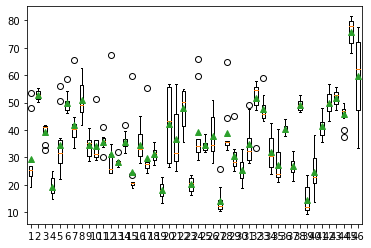

In [208]:
make_box_plots(one_train_one_test, 'MAE')

In [ ]:
#all 20 rounds results for Federated Learning, train on all, test on 2358
[[0.06951961666345596, -1.0547907920686839, 0.7311992588450115, 0.7456100673854843, 0.45352463815322563, 19.315455238024395],
 [0.06750611960887909, -0.9061764415008356, 0.7431598779071023, 0.7048023497628592, 0.4403891934243316, 18.258307973543804],
 [0.04297441616654396, -0.6392584912691109, 0.8125841782201447, 0.4744438811163561, 0.2803518699064789, 12.290740092595419],
 [0.07527746260166168, -1.1321102858024428, 0.7133773582568644, 0.7908635820821566, 0.49108701108305475, 20.487773418426514],
 [0.06078772619366646, -0.9909178343987756, 0.7560586497334231, 0.6352026388321399, 0.3965604598159795, 16.4552876551946],
 [0.06729450821876526, -1.1279164035403797, 0.7078740864442855, 0.7361251794856674, 0.4390087399870242, 19.069743792215984],
 [0.03205053508281708, 0.2828068573659976, 0.7832790662095058, 0.42367462842894427, 0.20908782968145428, 10.975533564885458],
 [0.03972587361931801, 0.00046629515384349896, 0.7347972250315615, 0.48810910100089355, 0.2591594291053503, 12.644745429356893],
 [0.03881887346506119, 0.10475708558699538, 0.7167735279518588, 0.49345413640767144, 0.2532424364276869, 12.783211628595987],
 [0.044760655611753464, -0.1677143401281589, 0.6904550401939484, 0.540701311319558, 0.2920047632228599, 14.007176717122396],
 [0.04850225895643234, 0.05459620717059697, 0.7148736055951348, 0.5115025474377614, 0.3164138529907328, 13.250766038894653],
 [0.04988951236009598, 0.030102795840318237, 0.715130458322368, 0.5244570155533159, 0.32546384098156134, 13.586358944574991],
 [0.0633954107761383, -0.047742737008218315, 0.6740045526960716, 0.6332575540069433, 0.41357218055692735, 16.40489912033081],
 [0.06450808048248291, -0.09526510258711278, 0.6491365343570882, 0.6276351688916061, 0.42083087357915144, 16.25924801826477],
 [0.06549400091171265, -0.19760707133527125, 0.6671337254158477, 0.6168143856732332, 0.4272627511257778, 15.97892944018046],
 [0.05474377050995827, -0.1290505136790722, 0.696677594833347, 0.5843581071749195, 0.3571315516785887, 15.138130982716879],
 [0.06714557856321335, -0.1691848869123519, 0.6660485223422357, 0.6555396596983776, 0.43803713171654163, 16.9821298122406],
 [0.055342722684144974, -0.014301236927656094, 0.6970973325733955, 0.5805985456244764, 0.3610389377675811, 15.040737390518188],
 [0.059734467417001724, -0.03992679593688886, 0.6858098351038175, 0.5994954767458252, 0.38968928660048263, 15.530273199081421],
 [0.08048170059919357, -1.4764057743724204, 0.45971914384046236, 1.727740589820461, 0.5250378801530454, 44.758108139038086]]

In [209]:
#Results for repeated cross validation
rcv = {'Test_home_145_trial_0': [0.011881086975336075, 0.8370704208921298, 0.870755193333667, 0.2583498826039517, 0.04957367722250768, 10.46405499511295], 'Test_home_145_trial_1': [0.020028799772262573, 0.3669658552905097, 0.8154084152317219, 0.3849252808463311, 0.0833914408947125, 15.624155243237814], 'Test_home_145_trial_2': [0.01906626857817173, 0.7018393491270472, 0.8282952774450354, 0.34077803581886723, 0.07434767791436103, 14.769187211990356], 'Test_home_145_trial_3': [0.016457173973321915, 0.7909238334680118, 0.8399323561200587, 0.3218341075806575, 0.06866733607122724, 13.03538351588779], 'Test_home_145_trial_4': [0.021590016782283783, 0.510672516451645, 0.8214010508403292, 0.37448057805716556, 0.08989169001283644, 15.200203723377651], 'Test_home_518_trial_0': [0.07817070186138153, -0.09215360451746886, 0.6647866675567445, 0.6679412384662277, 0.26483292066756015, 33.319387923346625], 'Test_home_518_trial_1': [0.06496787816286087, -2.1389595774315326, 0.6713584007641376, 0.6161796720544245, 0.23211981694655887, 29.146106571621367], 'Test_home_518_trial_2': [0.06326135247945786, -0.16902982419312595, 0.6968547698868203, 0.5558096862480733, 0.20854147161150582, 28.494352700975206], 'Test_home_518_trial_3': [0.0747830793261528, 0.037995881620183525, 0.6901668584057218, 0.62346483778522, 0.2416922738075199, 32.60162188212077], 'Test_home_518_trial_4': [0.0671507865190506, -2.430469766975429, 0.6747151388539722, 0.666595953537818, 0.2594470020048889, 29.157602543301053], 'Test_home_558_trial_0': [0.01832015998661518, 0.8261519192229593, 0.8437966104170399, 0.3359977438663416, 0.08158667155413198, 12.75067466100057], 'Test_home_558_trial_1': [0.04967157170176506, 0.42409297721036354, 0.7975344339634444, 0.5003062979536899, 0.18560071374382148, 22.628249390920004], 'Test_home_558_trial_2': [0.03441513329744339, 0.7083520433108501, 0.8294297421441921, 0.37007388008849895, 0.12474522037282586, 17.254432455698648], 'Test_home_558_trial_3': [0.0389123298227787, 0.38896118082612663, 0.81143347710941, 0.44997888600448155, 0.159930431739631, 18.502693939208985], 'Test_home_558_trial_4': [0.024567825719714165, 0.7675863877976339, 0.8276688113585858, 0.35915566871336224, 0.10164169348422764, 14.671153990427653], 'Test_home_690_trial_0': [0.04079313203692436, 0.4516126506486618, 0.7025547840718369, 0.6979792044256881, 0.2017681590579235, 23.84864056110382], 'Test_home_690_trial_1': [0.03965047001838684, 0.5209697257439815, 0.6834688605430144, 0.760951607699004, 0.19106366959615126, 26.68787455558777], 'Test_home_690_trial_2': [0.02879475988447666, 0.6345128324165329, 0.6754077399846491, 0.6554906220363022, 0.14535481093337893, 21.94508284330368], 'Test_home_690_trial_3': [0.030511636286973953, 0.08248038301225982, 0.6617885057204, 0.7593439048403912, 0.17973619114967057, 21.784880816936493], 'Test_home_690_trial_4': [0.024938873946666718, 0.6799628939823019, 0.7218191268631362, 0.6822079678595815, 0.15054287408964848, 19.099418222904205], 'Test_home_914_trial_0': [0.03739072009921074, 0.326080712706992, 0.779905954262263, 0.4250085442531288, 0.13698483165162936, 19.60539981297084], 'Test_home_914_trial_1': [0.034069694578647614, 0.6184493346744856, 0.7736916274792737, 0.4012330323813463, 0.12947955700486322, 17.842282885596866], 'Test_home_914_trial_2': [0.04798685014247894, 0.41901179377284253, 0.7602872940860893, 0.4848756867352951, 0.17729833985989793, 22.178629935733856], 'Test_home_914_trial_3': [0.031852416694164276, 0.401754025606078, 0.7867698693736432, 0.4136470424014525, 0.1278980785589222, 17.409850741189622], 'Test_home_914_trial_4': [0.05300765857100487, 0.0872897043158815, 0.7705811591938635, 0.5030865807697572, 0.19216722248653167, 23.452479964210873], 'Test_home_950_trial_0': [0.09855654090642929, 0.18762081957389684, 0.4678051243231063, 0.9236850860033733, 0.4196392562735266, 36.662322998046875], 'Test_home_950_trial_1': [0.15567192435264587, -0.09447494713423868, 0.31243718584040064, 1.1000533035114797, 0.6071507544309933, 47.666603088378906], 'Test_home_950_trial_2': [0.13118602335453033, 0.04065060422793158, 0.4275296848085619, 1.0187038046666905, 0.5400174786694413, 41.822925329208374], 'Test_home_950_trial_3': [0.11514363437891006, 0.06382821101814418, 0.373074508460612, 1.231495638531505, 0.578244507673224, 41.442697525024414], 'Test_home_950_trial_4': [0.15685634315013885, -0.0557033323335534, 0.3830897736955168, 1.0140423558324445, 0.5518631837804868, 48.709471702575684], 'Test_home_1222_trial_0': [0.08508815616369247, -0.4315472964556491, 0.5951070705715868, 0.9877332643916735, 0.4305229286356217, 32.991284935562696], 'Test_home_1222_trial_1': [0.07160674780607224, -0.4544069412674404, 0.6299192985826115, 0.896295757878199, 0.357433142970311, 30.34570270114475], 'Test_home_1222_trial_2': [0.07620998471975327, -0.9197765499667196, 0.5773626560171214, 1.0532296531251826, 0.4342466919105995, 31.23813819885254], 'Test_home_1222_trial_3': [0.06122025102376938, -0.5936205440454656, 0.5963896429540677, 0.8780571053263342, 0.3217892778385619, 28.231436323236537], 'Test_home_1222_trial_4': [0.07035129517316818, -0.2654646589261659, 0.599243716553276, 0.8862581075731149, 0.34631424006213685, 30.42626721770675], 'Test_home_1240_trial_0': [0.13286620378494263, -0.2718510697102495, 0.27664329538548793, 1.663053631630683, 0.680521699888166, 54.87385580274794], 'Test_home_1240_trial_1': [0.07927946746349335, 0.0016904033566336432, 0.555333614277166, 0.9470637654210932, 0.384670853268944, 32.98658397462633], 'Test_home_1240_trial_2': [0.08237412571907043, 0.0826586223155683, 0.5324126615703968, 0.9049070750059262, 0.35990236448612406, 35.002317640516495], 'Test_home_1240_trial_3': [0.07434841990470886, 0.04895391676176759, 0.5164587669345416, 1.0438934431701026, 0.38118559787440215, 34.40947914123535], 'Test_home_1240_trial_4': [0.08606500923633575, 0.2724141464240943, 0.5444250733157479, 0.8574973953781756, 0.3662557049652669, 34.05349678463406], 'Test_home_1417_trial_0': [0.05727279931306839, 0.21071988755645144, 0.7149346454272846, 0.5777407508650862, 0.21279351463609122, 26.279052406549454], 'Test_home_1417_trial_1': [0.05486944317817688, 0.24269438696243253, 0.6612550584185497, 0.5985707249691302, 0.21066790160233176, 26.3471919298172], 'Test_home_1417_trial_2': [0.037602584809064865, 0.5487096127245867, 0.7401516350797535, 0.49770167456958136, 0.146897330868398, 21.53077206015587], 'Test_home_1417_trial_3': [0.15519562363624573, -0.8408704136138146, 0.31481696249802277, 1.4231844580768092, 0.6233033602034171, 59.88635528087616], 'Test_home_1417_trial_4': [0.05301392078399658, 0.1186578427772978, 0.695720706032608, 0.5658732001126763, 0.20717876325932988, 24.470931708812714], 'Test_home_2318_trial_0': [0.06867185980081558, -0.4223780642328203, 0.7255504506426091, 0.5905535761120378, 0.22836174571905937, 30.01245122797349], 'Test_home_2318_trial_1': [0.056860215961933136, 0.29912399636581977, 0.6724290183210312, 0.6764041433306538, 0.23162609841206144, 28.061701325809253], 'Test_home_2318_trial_2': [0.0652192085981369, 0.2575631195529085, 0.6854260106417915, 0.679864675761258, 0.25050310966820016, 29.91379878100227], 'Test_home_2318_trial_3': [0.06849419325590134, -0.3063782383891814, 0.6914202603167756, 0.6343516107346631, 0.24217548739451322, 30.320775032043457], 'Test_home_2318_trial_4': [0.08955227583646774, -0.6960453943997722, 0.6656969195188072, 0.7036986846972333, 0.3040675315518276, 35.02515520769007], 'Test_home_2358_trial_0': [0.024193787947297096, 0.502605667659547, 0.7788665475816926, 0.45243161892951866, 0.1329628872493173, 13.912753661473593], 'Test_home_2358_trial_1': [0.021995142102241516, 0.35750804156557003, 0.7844700876643881, 0.41905320809355356, 0.13332310227718858, 11.683616717656454], 'Test_home_2358_trial_2': [0.041914671659469604, -0.7353216237855346, 0.7275072789863941, 0.7057057275194842, 0.31894297598886173, 15.67340612411499], 'Test_home_2358_trial_3': [0.03794555366039276, -0.5165853191321927, 0.7753927108720138, 0.5603509582291186, 0.25409701916155936, 14.141911745071411], 'Test_home_2358_trial_4': [0.020269036293029785, 0.6701523411883263, 0.8419041497135973, 0.31758476563863935, 0.10054755220241988, 10.819519440333048], 'Test_home_2448_trial_0': [0.016882551833987236, 0.8750741073167474, 0.7909316251498966, 0.43048347720034685, 0.06766317226968041, 18.152185440063477], 'Test_home_2448_trial_1': [0.014618413522839546, 0.9049862228979111, 0.8047146779727803, 0.39532504504078597, 0.05599184124186979, 17.442813515663147], 'Test_home_2448_trial_2': [0.017487995326519012, 0.8958071096309905, 0.8114172138081637, 0.38254070091157283, 0.06592803496670498, 17.148819148540497], 'Test_home_2448_trial_3': [0.018331337720155716, 0.8802388405718341, 0.7901291998864465, 0.42651176791018675, 0.07513066230295365, 17.58711701631546], 'Test_home_2448_trial_4': [0.03195104002952576, 0.7787700133590293, 0.754563061763208, 0.5004870825970461, 0.1306646247185833, 20.682668387889862], 'Test_home_3488_trial_0': [0.09765166789293289, 0.026978406958159968, 0.5291491420429161, 0.9557881250660092, 0.3457876452935089, 45.61613926357693], 'Test_home_3488_trial_1': [0.044114261865615845, 0.20346498231597926, 0.7331851473895563, 0.5674411955268619, 0.16504699575374648, 25.63178940878974], 'Test_home_3488_trial_2': [0.03845461457967758, 0.40729697338337034, 0.7328466812081057, 0.5466010510706889, 0.15132572808641978, 23.474311765034994], 'Test_home_3488_trial_3': [0.046898942440748215, 0.5417370568636787, 0.7460612449524875, 0.5547524356574814, 0.1742563554375855, 25.232504505581325], 'Test_home_3488_trial_4': [0.042779143899679184, 0.5025026476107026, 0.7492604554337297, 0.5283856236691332, 0.1507145395371231, 25.346304194132486], 'Test_home_3996_trial_0': [0.0678442195057869, 0.030634676000421083, 0.6002937601480907, 0.7807415299206895, 0.29709196651264297, 30.1311687352706], 'Test_home_3996_trial_1': [0.05991926044225693, 0.2615295265011141, 0.6082965855508489, 0.7333293029266104, 0.2561312787492277, 28.99276069718964], 'Test_home_3996_trial_2': [0.12369559705257416, -0.5710886602308026, 0.3269155030280517, 1.496047705436045, 0.5758539472860233, 54.309280473358776], 'Test_home_3996_trial_3': [0.0738159641623497, 0.09937791137438237, 0.5873001373101381, 0.7942540222811705, 0.3126696951978989, 31.68915217263358], 'Test_home_3996_trial_4': [0.06851944327354431, 0.15922364447966944, 0.597794344679122, 0.8334276365157106, 0.31321721529818686, 30.81220445827562], 'Test_home_4283_trial_0': [0.042831141501665115, 0.5260359870059023, 0.734337328654121, 0.4596203000370774, 0.14268870209656387, 23.31610129381481], 'Test_home_4283_trial_1': [0.03553943336009979, 0.5173010610703085, 0.7697428608349771, 0.40005724291320405, 0.10773429785492987, 22.303107104803388], 'Test_home_4283_trial_2': [0.024118611589074135, 0.5808517190764139, 0.7763463085919436, 0.3530912745679971, 0.08028809829136459, 17.92564700779162], 'Test_home_4283_trial_3': [0.027074992656707764, 0.5085959043474363, 0.7819298593705456, 0.35726003660652317, 0.08631459174765013, 18.938922627976066], 'Test_home_4283_trial_4': [0.028355835005640984, 0.5661768600383752, 0.804870193175269, 0.33852944838841703, 0.08620449373695263, 18.818961726991756], 'Test_home_4414_trial_0': [0.02986675128340721, 0.6543512024423042, 0.7415480740446706, 0.5311322857362158, 0.13507813857043297, 19.846885398942597], 'Test_home_4414_trial_1': [0.0420478954911232, 0.5783305544194004, 0.7301883670635078, 0.5525062904877363, 0.1699132434116204, 23.106859430974843], 'Test_home_4414_trial_2': [0.048610202968120575, 0.4365522064644687, 0.7031078597483954, 0.6300591446338635, 0.21547948881963075, 24.020912014708227], 'Test_home_4414_trial_3': [0.12786900997161865, -0.44383907957643703, 0.40035323605954753, 1.2632458797407147, 0.5235590027681833, 52.14039288734903], 'Test_home_4414_trial_4': [0.03722403198480606, 0.49418467614737926, 0.7156929482324477, 0.5711175472152998, 0.15982877934511444, 22.479188510349818], 'Test_home_5587_trial_0': [0.034956108778715134, 0.6345511609147763, 0.7083689999833177, 0.523865547320961, 0.14701003452907174, 21.05147948861122], 'Test_home_5587_trial_1': [0.041126810014247894, 0.6291812744277746, 0.7365049952353563, 0.4974863502540627, 0.15582438505632606, 22.190009355545044], 'Test_home_5587_trial_2': [0.028216861188411713, 0.616011702967646, 0.729934136409145, 0.5002495145430436, 0.11857395837707847, 20.118367791175842], 'Test_home_5587_trial_3': [0.03205655887722969, 0.6798202175840086, 0.7344675130815643, 0.48394038859848454, 0.1313944203684674, 19.953474432229996], 'Test_home_5587_trial_4': [0.030436957255005836, 0.6680067803241274, 0.7410866613541022, 0.46055085211895735, 0.12045427165966181, 19.667235672473907], 'Test_home_5982_trial_0': [0.05528104677796364, -0.6714699916051259, 0.6740884608694873, 0.5893967013895794, 0.2038940898539028, 27.006360244750976], 'Test_home_5982_trial_1': [0.04567881301045418, 0.405908964411453, 0.6621580647168569, 0.5779665798694069, 0.18405644541865523, 24.241149050394693], 'Test_home_5982_trial_2': [0.047921761870384216, 0.3664987742738273, 0.6795199108750399, 0.5507723738634474, 0.1797945043414873, 24.809341557820638], 'Test_home_5982_trial_3': [0.06545005738735199, -0.6141495127639306, 0.6704090981645474, 0.6711228026600141, 0.2526637242280746, 29.380274035135905], 'Test_home_5982_trial_4': [0.04431316256523132, 0.148513777004335, 0.6437737829131734, 0.6266640299101698, 0.1895515140947964, 24.75864948272705], 'Test_home_5997_trial_0': [0.08912915736436844, 0.3430395781897199, 0.6547534434695713, 0.6738726740844099, 0.3008765453343636, 33.7361885933649], 'Test_home_5997_trial_1': [0.05666901916265488, 0.5197714740091366, 0.7046468039066941, 0.5790073926862427, 0.20225307626133981, 27.41709025700887], 'Test_home_5997_trial_2': [0.06878732889890671, 0.30705775536207824, 0.7470414247010118, 0.5294814788441521, 0.21236509158163533, 28.984297184717086], 'Test_home_5997_trial_3': [0.04605216905474663, 0.5658091342715913, 0.7517098829680599, 0.49894103310466364, 0.16559912799155027, 23.4491993359157], 'Test_home_5997_trial_4': [0.0600801520049572, 0.5717351742292496, 0.7518806358330746, 0.5246283428997742, 0.19629500140109238, 27.136899244217645], 'Test_home_6069_trial_0': [0.04254820942878723, 0.1445016344236757, 0.7105261992262037, 0.601265387900829, 0.1879140523258291, 23.007792183847137], 'Test_home_6069_trial_1': [0.052877262234687805, 0.5519687802171249, 0.6496456890966147, 0.7649005805007165, 0.2679594907729043, 25.508887319853812], 'Test_home_6069_trial_2': [0.04692104831337929, 0.6295321489729375, 0.6774699070189159, 0.6596551935129369, 0.20658342857880982, 25.320711540453363], 'Test_home_6069_trial_3': [0.04276648908853531, 0.681652578424352, 0.6828405888759759, 0.6292080728234791, 0.18405813058271844, 24.707544326782227], 'Test_home_6069_trial_4': [0.0575919933617115, 0.5375635643905775, 0.596895149518362, 0.804300354057322, 0.2622189326613057, 29.854033036665484], 'Test_home_6178_trial_0': [0.03982232138514519, 0.6128413992124211, 0.7443101234919088, 0.5338009644195262, 0.17251706088694116, 20.823829327860185], 'Test_home_6178_trial_1': [0.04178914800286293, 0.5024106744937491, 0.7413579921522065, 0.5762352078978202, 0.18992565193571814, 21.427249047064013], 'Test_home_6178_trial_2': [0.049764763563871384, 0.43659110283017893, 0.7376700966690344, 0.5531572965050899, 0.1942147865809655, 23.95383216488746], 'Test_home_6178_trial_3': [0.053560324013233185, 0.23048194995078744, 0.7143768089069263, 0.6485300855937323, 0.2611824131089577, 22.475849459248206], 'Test_home_6178_trial_4': [0.04123341664671898, 0.3986457393524386, 0.7271170013746391, 0.5535020075813052, 0.1845754426394663, 20.89687535070604], 'Test_home_6594_trial_0': [0.07014570385217667, -0.044041699955719424, 0.6717935171050929, 0.599777833423263, 0.22619772008096248, 31.43329822100126], 'Test_home_6594_trial_1': [0.09831812977790833, -1.6759241250082384, 0.6285858214377825, 0.6981200311527835, 0.3222076136757953, 36.00100217721401], 'Test_home_6594_trial_2': [0.05806013569235802, 0.1750716435245102, 0.6802256773828975, 0.5325959068953394, 0.189688730586438, 27.549963547633244], 'Test_home_6594_trial_3': [0.07293888181447983, -0.9969874616226366, 0.6306920947775203, 0.6313021787506604, 0.24803809242885463, 31.373625241793118], 'Test_home_6594_trial_4': [0.056142956018447876, -0.3698115978698318, 0.6750661365732885, 0.5562273494036326, 0.197884876344774, 26.669920053237522], 'Test_home_6672_trial_0': [0.018908090889453888, 0.7096241427224855, 0.7479560494983648, 0.4413434916507817, 0.07857464713693792, 17.948519434247697], 'Test_home_6672_trial_1': [0.023457223549485207, 0.6124699637983819, 0.7538459120890907, 0.4196691617536689, 0.085539896425002, 19.44919690631685], 'Test_home_6672_trial_2': [0.0291147381067276, 0.6872094029210996, 0.7332438228443621, 0.47893373410310747, 0.11392991004901926, 20.68413110006423], 'Test_home_6672_trial_3': [0.024040479212999344, 0.745880695709997, 0.7593569630955047, 0.40749839514915803, 0.08233515844524265, 20.10807080495925], 'Test_home_6672_trial_4': [0.01958981156349182, 0.6883067012513154, 0.7122206495728384, 0.4529013836181905, 0.07782625784067465, 19.26612783613659], 'Test_home_6703_trial_0': [0.03237514570355415, 0.549468995794339, 0.664175452159874, 0.629687892263251, 0.16246608915742966, 21.206111115145397], 'Test_home_6703_trial_1': [0.030666880309581757, 0.5255906514420333, 0.6605042520635023, 0.654098179363127, 0.1633713255440536, 20.750253527997486], 'Test_home_6703_trial_2': [0.03483777865767479, 0.4914706262002221, 0.6663646496846829, 0.6571225013751095, 0.1749983263327951, 22.10800683354757], 'Test_home_6703_trial_3': [0.03332680091261864, 0.49062920073664745, 0.6534333085806012, 0.7160429999710387, 0.18849111250564618, 21.395802635744392], 'Test_home_6703_trial_4': [0.03790751099586487, 0.510359342236912, 0.6546078885915487, 0.6766024907095985, 0.1914552478374302, 22.64009752618261], 'Test_home_6706_trial_0': [0.05122070759534836, 0.3130445892562737, 0.7544814734090852, 0.4103136624783299, 0.1463916914892622, 24.262290541805438], 'Test_home_6706_trial_1': [0.055710725486278534, 0.3386088853597213, 0.7367652344496038, 0.4268662048077278, 0.1545413394759656, 26.00594107784442], 'Test_home_6706_trial_2': [0.057238709181547165, 0.2219912350984109, 0.7330936881396253, 0.4416829203826442, 0.16418550242846675, 26.022695989751103], 'Test_home_6706_trial_3': [0.05732535943388939, 0.0398790238723509, 0.7361266997641492, 0.43833751125642967, 0.16424434383753075, 25.85542512295851], 'Test_home_6706_trial_4': [0.05955823138356209, 0.308057854115207, 0.7397445280662176, 0.4284373182229824, 0.160568544724039, 26.856862964914807], 'Test_home_6907_trial_0': [0.07858260720968246, -0.27755623415394376, 0.6494641660099698, 0.8999766595072697, 0.4033480603685247, 29.632236256318933], 'Test_home_6907_trial_1': [0.08162617683410645, -0.23076976751103273, 0.6076863479827554, 0.8755983851223101, 0.39244708473225576, 30.777972053079043], 'Test_home_6907_trial_2': [0.08093873411417007, -0.01269879285775675, 0.6297956084384603, 0.6607318348009754, 0.3421380452244247, 26.41599458806655], 'Test_home_6907_trial_3': [0.06367108970880508, 0.08806957898790965, 0.6680089433376901, 0.6375355839832558, 0.2876559232926017, 23.848447294796216], 'Test_home_6907_trial_4': [0.07704456895589828, 0.0036757926748593496, 0.6178072508264134, 0.7332536707190813, 0.3254691867694359, 29.334122265086453], 'Test_home_7069_trial_0': [0.020525362342596054, 0.8482934255671618, 0.7663134307676598, 0.4957299121473158, 0.09133838338007218, 18.82648794274581], 'Test_home_7069_trial_1': [0.019217129796743393, 0.7044902873502684, 0.6943081425163454, 0.5308715961237431, 0.08889171436969408, 19.395608851784154], 'Test_home_7069_trial_2': [0.02416028454899788, 0.5656157940520534, 0.7113614147860724, 0.5502070630561571, 0.11867092995138559, 18.930868751124333], 'Test_home_7069_trial_3': [0.019752690568566322, 0.8547539033249443, 0.7706556927807132, 0.4703317812949798, 0.08874800319923143, 17.691257225839717], 'Test_home_7069_trial_4': [0.01768425665795803, 0.774231287122717, 0.7558214205094007, 0.45588375372199846, 0.07963279652013112, 17.109434930901777], 'Test_home_7159_trial_0': [0.07348058372735977, -0.09410752417468525, 0.6328062690911217, 0.6435185375953931, 0.23532000947200493, 33.95951461791992], 'Test_home_7159_trial_1': [0.08530670404434204, -0.12254170796852105, 0.5648403255266795, 0.7894793669260383, 0.3109414572416397, 36.60429604848226], 'Test_home_7159_trial_2': [0.06554089486598969, -0.014968405590050145, 0.595678430730212, 0.6564895704014512, 0.24024575923949879, 30.267122904459637], 'Test_home_7159_trial_3': [0.0688035786151886, -0.6614378936140493, 0.5762398925779534, 0.6826609037672198, 0.2583956611445909, 30.719739702012802], 'Test_home_7159_trial_4': [0.051487792283296585, 0.1352447985515701, 0.5303194869173818, 0.6897050784509771, 0.23616748775500299, 25.411732991536457], 'Test_home_8162_trial_0': [0.05503261461853981, -1.9028951694875376, 0.7418155718302384, 0.5460650964068834, 0.20280407305526277, 25.042322765697133], 'Test_home_8162_trial_1': [0.04901706799864769, 0.45317667983759874, 0.7080559940097585, 0.5267490792192691, 0.19333187791820924, 22.570145737041127], 'Test_home_8162_trial_2': [0.03628725931048393, 0.46096254729785285, 0.7389184062801708, 0.49960858277150094, 0.15405863734835856, 19.887706518173218], 'Test_home_8162_trial_3': [0.04863528162240982, 0.45294046007460087, 0.716444294021355, 0.5080080375044582, 0.17141876176641754, 24.358492591164328], 'Test_home_8162_trial_4': [0.05342426896095276, -2.5358084933956624, 0.7120789140897988, 0.546110371235178, 0.2093433493907741, 23.55301798473705], 'Test_home_8327_trial_0': [0.047883134335279465, 0.10936888059097283, 0.7463433954819226, 0.5217458791475945, 0.17281106119120299, 24.43187221260958], 'Test_home_8327_trial_1': [0.023976536467671394, 0.7228673930845138, 0.7709284961548589, 0.45774954572730736, 0.09778702155127306, 18.967926712923273], 'Test_home_8327_trial_2': [0.026658281683921814, 0.7630628410957264, 0.7820241042883525, 0.40036344527174156, 0.09384374718458592, 19.22064397501391], 'Test_home_8327_trial_3': [0.03123399242758751, 0.7298759203927593, 0.7461350825871169, 0.46755902388279014, 0.11761677135225343, 20.98366741801417], 'Test_home_8327_trial_4': [0.02989054284989834, 0.6916100696623579, 0.7217368724543481, 0.5314843567045063, 0.12347429858103008, 21.743748731391374], 'Test_home_9002_trial_0': [0.11817841231822968, -0.2854750935434709, 0.2812635278852898, 1.6419784822324723, 0.656824547352562, 49.92786475150816], 'Test_home_9002_trial_1': [0.059225115925073624, -0.08454175387946694, 0.5677033412089784, 0.9762718325107059, 0.3459155376597013, 28.248367647970877], 'Test_home_9002_trial_2': [0.06390974670648575, 0.1717516169874479, 0.600364736637577, 0.8861922305331716, 0.3386455417660723, 28.264179906537457], 'Test_home_9002_trial_3': [0.06497051566839218, -0.028074129148266822, 0.5940741767170771, 0.9408269462501916, 0.34533019858140085, 29.91425701879686], 'Test_home_9002_trial_4': [0.07040563225746155, -0.14215427568633426, 0.5319450056401799, 0.980266753652321, 0.37133416346576315, 31.410399160077496], 'Test_home_9290_trial_0': [0.06413573771715164, -0.9556808590511718, 0.748857204362294, 0.5949511334790958, 0.2429148488437225, 26.546912324839624], 'Test_home_9290_trial_1': [0.042634621262550354, 0.7314816961830926, 0.7501757361642646, 0.4958800247740753, 0.1525499967513676, 23.421438118507123], 'Test_home_9290_trial_2': [0.05708279460668564, 0.47071457387952476, 0.7507117529771884, 0.5816098467837576, 0.20806592990397332, 26.966383868250354], 'Test_home_9290_trial_3': [0.07356590777635574, 0.20607817429767492, 0.7251683838258075, 0.638658407157764, 0.25569797244936443, 31.053078947396113], 'Test_home_9290_trial_4': [0.06758821755647659, 0.3073127104581057, 0.73085500035139, 0.6293668310009852, 0.24800427805096573, 28.986939413794154], 'Test_home_984_trial_0': [0.06869935989379883, 0.3472372468965685, 0.6622035839164292, 0.7364801286794638, 0.27292289542582626, 31.330005898195154], 'Test_home_984_trial_1': [0.07388049364089966, 0.1595494237842584, 0.5948154323786325, 0.8419990564377626, 0.32975164410585944, 31.881675355574664], 'Test_home_984_trial_2': [0.06830038875341415, 0.3254825690670707, 0.556605547794299, 0.7384711258545315, 0.2696339679254182, 31.613225600298712], 'Test_home_984_trial_3': [0.039529018104076385, 0.6392246639347972, 0.6622272582146326, 0.6503650434471017, 0.16455790101039033, 26.402262855978574], 'Test_home_984_trial_4': [0.046326894313097, 0.4585857182721543, 0.6961821215426531, 0.6489671160642583, 0.1981184182482637, 25.645886365105124], 'Test_home_3403_trial_0': [0.05832467973232269, 0.6492590659090494, 0.7129809673318257, 0.5880802937880685, 0.21694391821971362, 26.71949303150177], 'Test_home_3403_trial_1': [0.08066251128911972, 0.44840635319519156, 0.6448032172689699, 0.8146843337422978, 0.3585114578309493, 30.977384567260742], 'Test_home_3403_trial_2': [0.03212928771972656, 0.7729307728192505, 0.7278241021033782, 0.4881562146124016, 0.1277946055032536, 20.741209387779236], 'Test_home_3403_trial_3': [0.05161835253238678, 0.6543460094079978, 0.6530819737862007, 0.6062659260283357, 0.19763821332854611, 26.759814262390137], 'Test_home_3403_trial_4': [0.050141531974077225, 0.7002377627785342, 0.7267832775305566, 0.507552058607695, 0.180585698049718, 23.816697359085083], 'Test_home_4735_trial_0': [0.020575620234012604, 0.5060201681038775, 0.7834271053344967, 0.430845053751433, 0.09949500438896597, 15.057729062579927], 'Test_home_4735_trial_1': [0.028159670531749725, 0.3523139150140378, 0.7933397795969445, 0.471638124554603, 0.1495477986967924, 15.008702141898018], 'Test_home_4735_trial_2': [0.03255760669708252, 0.26392354056039996, 0.7699785585986846, 0.535650155698841, 0.17854949933474704, 16.506757441021147], 'Test_home_4735_trial_3': [0.06942440569400787, -0.9754905495207543, 0.5374601940790772, 1.14004051101419, 0.3737674535752354, 35.78636868794759], 'Test_home_4735_trial_4': [0.024246830493211746, 0.33857116843770724, 0.8107364619123208, 0.4282775645658363, 0.12887015368201188, 13.618041174752372], 'Test_home_5192_trial_0': [0.06615296006202698, 0.15716194489860935, 0.7363363668649511, 0.6463481671077554, 0.2648360997258923, 27.28508825302124], 'Test_home_5192_trial_1': [0.0960613563656807, -0.08927595287692078, 0.6979900991427158, 0.7791340858307572, 0.3654445757329893, 34.6119530916214], 'Test_home_5192_trial_2': [0.0962902083992958, 0.05088605537336073, 0.6582524197802716, 0.6444075912794783, 0.3519759419730476, 29.793156242370607], 'Test_home_5192_trial_3': [0.08936873823404312, 0.06646987598048117, 0.6754424075485577, 0.6668033070084117, 0.35234337902428936, 28.58274636268616], 'Test_home_5192_trial_4': [0.0889304056763649, 0.09455171814682259, 0.6994995807215869, 0.6585572549335541, 0.33906133820668216, 29.191218757629393], 'Test_home_6126_trial_0': [0.03728623688220978, 0.2323669559580619, 0.7621339343329883, 0.4081656581840111, 0.12363050154630836, 20.803963999594412], 'Test_home_6126_trial_1': [0.042069073766469955, -0.08511464524279357, 0.7512274329868389, 0.43068570641838855, 0.1362351346138028, 22.476101352322488], 'Test_home_6126_trial_2': [0.03220922872424126, 0.10627944182633808, 0.7843188225875746, 0.3785697149129568, 0.11352083604580218, 18.15253826110594], 'Test_home_6126_trial_3': [0.0333440862596035, 0.01497654538347007, 0.8065900815982765, 0.3820352576774249, 0.11651451844376431, 18.476892948150635], 'Test_home_6126_trial_4': [0.10236067324876785, -0.9251548903366742, 0.5829204169365845, 0.8465702334453407, 0.3380790291719719, 43.317626645488126], 'Test_home_6868_trial_0': [0.05647081136703491, 0.517049035719286, 0.7402141924162218, 0.43082547716332537, 0.13896446420668954, 29.587507472318762], 'Test_home_6868_trial_1': [0.06612040847539902, 0.24712863643134925, 0.7157776899888691, 0.5048076902486268, 0.17553683264779463, 32.13511848449707], 'Test_home_6868_trial_2': [0.04543030634522438, 0.40346758549551953, 0.757977707276951, 0.45669923448745725, 0.12905645418788456, 27.169577991261203], 'Test_home_6868_trial_3': [0.04147164896130562, 0.4471115466159304, 0.7850551263995219, 0.405049207234388, 0.11186218998650839, 25.37829814237707], 'Test_home_6868_trial_4': [0.13820281624794006, -0.31431328733411956, 0.5844389723161189, 0.7233008411293017, 0.36662429298144567, 46.07881725535673], 'Test_home_8849_trial_0': [0.017938463017344475, 0.8134261607649231, 0.7039473424600027, 0.6005231024929907, 0.1129756243969807, 16.114502271016438], 'Test_home_8849_trial_1': [0.01579454354941845, 0.8267472377299571, 0.7096627663834065, 0.613614540395462, 0.09697929562000776, 16.88925117916531], 'Test_home_8849_trial_2': [0.11821841448545456, -0.7783978994847788, 0.22903914988891858, 1.9783221690938166, 0.7696607811453268, 51.353432973225914], 'Test_home_8849_trial_3': [0.020090654492378235, 0.7472222996308109, 0.6790556162793883, 0.5636096958025134, 0.11572317171296893, 16.53632164001465], 'Test_home_8849_trial_4': [0.016764981672167778, 0.8719300919832209, 0.772185070893525, 0.5053864833774349, 0.08786971862066895, 16.295743200514053], 'Test_home_1706_trial_0': [0.10343032330274582, 0.2822000962402228, 0.6512443408914672, 0.6584030398866643, 0.29891770038549975, 38.50125074386597], 'Test_home_1706_trial_1': [0.06891710311174393, 0.3658598020549832, 0.5368466888302749, 0.9856936708853589, 0.3459312778810554, 33.18683576583862], 'Test_home_1706_trial_2': [0.10919368267059326, -2.8821515177860695, 0.2284418376935195, 2.2260855733929295, 0.798399391003093, 51.452425956726074], 'Test_home_1706_trial_3': [0.03528130054473877, 0.7230453401975693, 0.6750211507242609, 0.5884133220620062, 0.14906151900253095, 23.536845445632935], 'Test_home_1706_trial_4': [0.04788398742675781, 0.23901620095097692, 0.4749712245143533, 0.9466784336246844, 0.3293148441847585, 23.26313066482544], 'Test_home_2602_trial_0': [0.08644984662532806, 0.13523417224405657, 0.7189877590491786, 0.47973351299672473, 0.22904455535481008, 30.60067391395569], 'Test_home_2602_trial_1': [0.10583807528018951, -0.05254215108422724, 0.7263510420013062, 0.5299183024940468, 0.28541378319407407, 33.20952033996582], 'Test_home_2602_trial_2': [0.06545138359069824, 0.04272057013044406, 0.7600309634824732, 0.475179914756132, 0.19876242184128476, 26.44413201014201], 'Test_home_2602_trial_3': [0.090207040309906, -0.14600355883903046, 0.7394050699789626, 0.4837888132553077, 0.22428465125648384, 32.88390795389811], 'Test_home_2602_trial_4': [0.10102251917123795, -0.47028030014915084, 0.6785978281867718, 0.6276317923953081, 0.3044866472478759, 35.19180981318156], 'Test_home_6564_trial_0': [0.13891491293907166, -0.28388048044265485, 0.49842612818411175, 0.8974239696064407, 0.3889597027352397, 54.16623126759249], 'Test_home_6564_trial_1': [0.06503856182098389, 0.273826544049432, 0.7269330371020851, 0.4726003714815078, 0.18865423026305284, 27.53500520481783], 'Test_home_6564_trial_2': [0.07529912143945694, 0.11160848438114332, 0.7525831429207707, 0.45161285845602284, 0.19092002816454354, 30.101728242986344], 'Test_home_6564_trial_3': [0.07283203303813934, 0.09638696887201537, 0.734513011334374, 0.4599751291706285, 0.19545355316242122, 28.96676048110513], 'Test_home_6564_trial_4': [0.06483675539493561, 0.3531995893288354, 0.7431403285867945, 0.4766548136691933, 0.19052106731389407, 27.41378105387968], 'Test_home_7935_trial_0': [0.07564307749271393, -0.49871863631018265, 0.7119862180379457, 0.5823047837822805, 0.20839502493793, 35.72061326768663], 'Test_home_7935_trial_1': [0.07798375934362411, -0.02211594928471962, 0.658335521751526, 0.6754741949393748, 0.2674402493329926, 33.2868643866645], 'Test_home_7935_trial_2': [0.05971788242459297, 0.43048909778193617, 0.7099444561235636, 0.5657082555794936, 0.18336841035341528, 31.135732650756836], 'Test_home_7935_trial_3': [0.056985560804605484, -0.7763236871413957, 0.7138641425618837, 0.6025637090741538, 0.1851855355816997, 31.33627594841851], 'Test_home_7935_trial_4': [0.09841935336589813, -0.6445558114312574, 0.620348298986851, 0.8123037042822092, 0.32778526162407023, 41.218879275851776], 'Test_home_10089_trial_0': [0.048987653106451035, 0.05917810871523118, 0.4273626520208554, 1.1848403405564796, 0.38450691271334203, 25.511089869907924], 'Test_home_10089_trial_1': [0.06700945645570755, 0.10615577882829762, 0.4984883449653623, 0.9737613404823351, 0.3648384108744435, 30.22559084211077], 'Test_home_10089_trial_2': [0.05398409441113472, 2.7435505497600384e-06, 0.5563387970676943, 0.8688024372527084, 0.3116999900199811, 25.429437364850724], 'Test_home_10089_trial_3': [0.050305504351854324, -0.022199794693053856, 0.5431534791057367, 0.8614716615383161, 0.29076127083659437, 25.18875421796526], 'Test_home_10089_trial_4': [0.07440554350614548, 0.024117974767179837, 0.4741775385793434, 1.1215172313050779, 0.44828047671797805, 31.45923069545201], 'Test_home_10182_trial_0': [0.06338483095169067, 0.6326285925823031, 0.7736887714721064, 0.39684068263453054, 0.12582222999606266, 33.78553899129232], 'Test_home_10182_trial_1': [0.062292762100696564, 0.6403977700054068, 0.7863374608814675, 0.3817984092900971, 0.11563825036380929, 34.7581672668457], 'Test_home_10182_trial_2': [0.14787885546684265, 0.1423796725877886, 0.6492340975417451, 0.565396940607909, 0.29062377980340576, 48.62001736958822], 'Test_home_10182_trial_3': [0.06674253195524216, 0.6008111842353806, 0.7658545047227221, 0.4203803004424346, 0.14475968255825009, 32.75548807779948], 'Test_home_10182_trial_4': [0.04007740691304207, 0.7507434718804605, 0.8417350218769385, 0.27840260352647506, 0.07478806317718383, 25.21316146850586], 'Test_home_10983_trial_0': [0.05711747705936432, 0.5924245106579773, 0.8187139407166588, 0.35748700271418227, 0.1253555661889558, 27.527851867675782], 'Test_home_10983_trial_1': [0.07622747123241425, 0.07598333540272277, 0.731432241199337, 0.4740156525761437, 0.18124430548212844, 33.69197998046875], 'Test_home_10983_trial_2': [0.11119189858436584, 0.14660456981548792, 0.6152128469057918, 0.5552951060013688, 0.2809478049945323, 37.141379737854], 'Test_home_10983_trial_3': [0.05610733479261398, 0.5681050263340653, 0.8008767501901338, 0.3941618828669267, 0.1421703906685281, 26.288865280151366], 'Test_home_10983_trial_4': [0.023155244067311287, 0.7977497805327072, 0.8429635405761988, 0.29782071219921114, 0.06261998605298098, 18.611354064941406]}

In [210]:
def make_box_plots_rcv(data, metric):
    data_summary = pd.DataFrame(data).transpose().rename(columns = {0:"MSE", 1:"R2", 2:"F1", 3:"NEP", 4:"NDE", 5:"MAE"})
    bldgs = [data_summary[x:x+5][str(metric)].values for x in range(len(data_summary)) if x%5==0]
    return plt.boxplot(bldgs, showmeans=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x14640446190>,
 'caps': [<matplotlib.lines.Line2D at 0x146404468b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1464042ddc0>,
 'medians': [<matplotlib.lines.Line2D at 0x14640446fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1464044f730>,
 'means': [<matplotlib.lines.Line2D at 0x1464044f3a0>,
  <matplotlib.lines.Line2D at 0x146407daeb0>]}

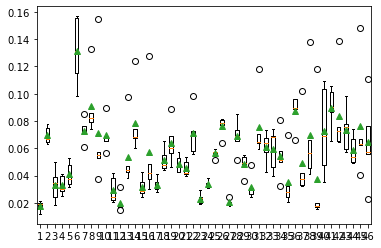

In [212]:
make_box_plots_rcv(rcv, 'MSE')

In [280]:
def make_adjacent_box_plots(single_house, multi_house, metric):
    single_house_data = pd.DataFrame(single_house).transpose().rename(columns = {0:"MSE", 1:"R2", 2:"F1", 3:"NEP", 4:"NDE", 5:"MAE"})
    multi_house_data = pd.DataFrame(multi_house).transpose().rename(columns = {0:"MSE", 1:"R2", 2:"F1", 3:"NEP", 4:"NDE", 5:"MAE"})
    
    single_house_data = [single_house_data[x:x+10][str(metric)].values for x in range(len(single_house_data)) if x%10==0]
    multi_house_data = [multi_house_data[x:x+5][str(metric)].values for x in range(len(multi_house_data)) if x%5==0]
    
    all_data = [list(a) for a in zip(single_house_data, multi_house_data)]
    all_data = [item for sublist in all_data for item in sublist]
    
    positions = [1]
    labels = ['single']
    for i in range(len(all_data)-1):
        if i%2==0:
            positions.append(positions[i]+0.5)
            labels.append('multi')
        else:
            positions.append(positions[i]+1)
            labels.append('single')
    
    plt.figure(figsize=(20, 4))
    plt.xticks(rotation=90)
    return plt.boxplot(
        all_data,
        positions=positions,
        labels=labels,
        showmeans=True
    )

{'whiskers': [<matplotlib.lines.Line2D at 0x1464ae555e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1464ae55d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1464ae55250>,
 'medians': [<matplotlib.lines.Line2D at 0x1464ae50370>,
 'fliers': [<matplotlib.lines.Line2D at 0x1464ae6e430>,
 'means': [<matplotlib.lines.Line2D at 0x1464ae6e0a0>,
  <matplotlib.lines.Line2D at 0x1464c8996a0>]}

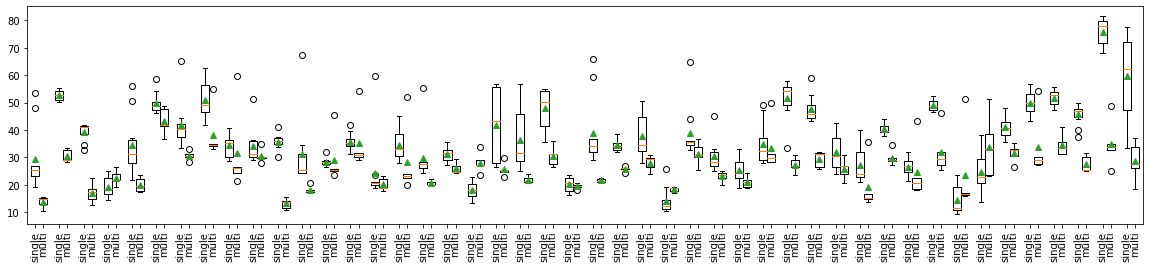

In [380]:
#plots comparing randomly selected single building testing accuracy to multi building testing accuracy
#when tested on the same building
make_adjacent_box_plots(one_train_one_test, rcv, 'MAE')

In [384]:
def make_difference_in_means_plots(single_house, multi_house, metric):
    single_house_data = pd.DataFrame(single_house).transpose().rename(columns = {0:"MSE", 1:"R2", 2:"F1", 3:"NEP", 4:"NDE", 5:"MAE"})
    multi_house_data = pd.DataFrame(multi_house).transpose().rename(columns = {0:"MSE", 1:"R2", 2:"F1", 3:"NEP", 4:"NDE", 5:"MAE"})
    
    single_house_data = [single_house_data[x:x+10][str(metric)].values for x in range(len(single_house_data)) if x%10==0]
    multi_house_data = [multi_house_data[x:x+5][str(metric)].values for x in range(len(multi_house_data)) if x%5==0]
    
    all_data = [list(a) for a in zip(single_house_data, multi_house_data)]
    
    means = []
    for i in all_data:
        for j in i:
            means.append(np.mean(j))
    
    differences = []
    for i in range(len(means) - 1):
        if i %2 == 0:
            differences.append(means[i+1] - means[i])
    
    return differences

In [387]:
(make_difference_in_means_plots(one_train_one_test, rcv, 'MAE'))

[-15.751187886132136,
 -22.160025846693244,
 -22.17830307006836,
 3.3413754373788827,
 -14.453385789810664,
 -6.559326314926146,
 -11.298688862058857,
 -12.796031840642293,
 -2.6961510330438614,
 -3.4020260979147565,
 -22.48336474100749,
 -12.982490748167038,
 0.6045234394073411,
 -0.5080162048339858,
 -4.2340859864887435,
 -6.234873680192592,
 -9.231933920085432,
 -5.112218332290652,
 10.051277368409291,
 -16.333837061217338,
 -14.623149031977501,
 -17.26108726018515,
 -0.7635382856641506,
 -17.448623684802694,
 -8.66518017711924,
 -9.74779555376838,
 4.175122370217975,
 -7.453680716620553,
 -7.288955170458017,
 -4.489236726317291,
 -1.3764060358847416,
 -24.132889145818243,
 -18.313705360188205,
 -6.263414138555525,
 -8.006719795862832,
 -10.306938776969915,
 -2.0211312770843506,
 -17.181444437363567,
 8.859204006195068,
 9.335245501995082,
 -9.58696676890056,
 -16.268874806516315,
 -17.184760951995855,
 -18.13455410003662,
 -40.7602560679118,
 -31.099203071594236]